In [17]:
import tensorflow as tf
import gc
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout, LSTM, ConvLSTM2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation, LSTM, ConvLSTM2D, Lambda, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.layers import Lambda, Reshape, DepthwiseConv2D, ZeroPadding2D, Add, MaxPooling2D,Activation, Flatten, Conv2D, Dense, Input, Dropout, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import keras
import shutil
import cv2
import os
from datetime import datetime

In [7]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Fundus Dataset/train'
valid_path = '/content/drive/MyDrive/Fundus Dataset/train'

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Fundus Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fundus Dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2820 images belonging to 3 classes.
Found 705 images belonging to 3 classes.


In [15]:
model_1 = Sequential()
model_1.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_1.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(units=4096,activation="relu"))
model_1.add(Dense(units=4096,activation="relu"))
model_1.add(Dense(units=3, activation="softmax"))

In [19]:
opt = Adam(learning_rate=0.0001, decay=1e-5)
model_1.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [22]:
checkpoint_1 = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early_1 = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')

history_1 = model_1.fit(training_set,epochs=30, steps_per_epoch=len(training_set),
                        validation_data= test_set,callbacks=[checkpoint_1,early_1])

Epoch 1/30


 1/89 [..............................] - ETA: 22:39 - loss: 1.0973 - accuracy: 0.4062

 2/89 [..............................] - ETA: 21:57 - loss: 1.0984 - accuracy: 0.3438

 3/89 [>.............................] - ETA: 22:03 - loss: 1.0992 - accuracy: 0.3021

 4/89 [>.............................] - ETA: 21:22 - loss: 1.0988 - accuracy: 0.3047

 5/89 [>.............................] - ETA: 21:06 - loss: 1.0990 - accuracy: 0.2875

 6/89 [=>............................] - ETA: 21:15 - loss: 1.0986 - accuracy: 0.3177

 7/89 [=>............................] - ETA: 18:20 - loss: 1.0982 - accuracy: 0.3348

 8/89 [=>............................] - ETA: 18:48 - loss: 1.0981 - accuracy: 0.3281

 9/89 [==>...........................] - ETA: 19:08 - loss: 1.0981 - accuracy: 0.3299

10/89 [==>...........................] - ETA: 19:11 - loss: 1.0984 - accuracy: 0.3344

11/89 [==>...........................] - ETA: 18:56 - loss: 1.0963 - accuracy: 0.3466

12/89 [===>..........................] - ETA: 18:46 - loss: 1.0916 - accuracy: 0.3672

13/89 [===>..........................] - ETA: 18:36 - loss: 1.0909 - accuracy: 0.3678

14/89 [===>..........................] - ETA: 18:21 - loss: 1.0922 - accuracy: 0.3616

15/89 [====>.........................] - ETA: 18:07 - loss: 1.0918 - accuracy: 0.3688

16/89 [====>.........................] - ETA: 18:01 - loss: 1.0919 - accuracy: 0.3750

17/89 [====>.........................] - ETA: 17:46 - loss: 1.0926 - accuracy: 0.3732

18/89 [=====>........................] - ETA: 16:42 - loss: 1.0928 - accuracy: 0.3785

19/89 [=====>........................] - ETA: 16:32 - loss: 1.0934 - accuracy: 0.3717

20/89 [=====>........................] - ETA: 16:25 - loss: 1.0938 - accuracy: 0.3703

21/89 [======>.......................] - ETA: 16:13 - loss: 1.0943 - accuracy: 0.3676

22/89 [======>.......................] - ETA: 16:00 - loss: 1.0943 - accuracy: 0.3679

23/89 [======>.......................] - ETA: 15:49 - loss: 1.0949 - accuracy: 0.3641

24/89 [=======>......................] - ETA: 15:03 - loss: 1.0953 - accuracy: 0.3594

25/89 [=======>......................] - ETA: 14:51 - loss: 1.0953 - accuracy: 0.3613

26/89 [=======>......................] - ETA: 14:41 - loss: 1.0955 - accuracy: 0.3594

27/89 [========>.....................] - ETA: 14:29 - loss: 1.0957 - accuracy: 0.3553

28/89 [========>.....................] - ETA: 14:18 - loss: 1.0959 - accuracy: 0.3527

29/89 [========>.....................] - ETA: 13:40 - loss: 1.0959 - accuracy: 0.3524

30/89 [=========>....................] - ETA: 13:28 - loss: 1.0960 - accuracy: 0.3521

31/89 [=========>....................] - ETA: 13:17 - loss: 1.0961 - accuracy: 0.3528

32/89 [=========>....................] - ETA: 13:08 - loss: 1.0962 - accuracy: 0.3516

33/89 [==========>...................] - ETA: 12:56 - loss: 1.0963 - accuracy: 0.3494

34/89 [==========>...................] - ETA: 12:45 - loss: 1.0964 - accuracy: 0.3438

35/89 [==========>...................] - ETA: 12:15 - loss: 1.0964 - accuracy: 0.3411

36/89 [===========>..................] - ETA: 12:04 - loss: 1.0965 - accuracy: 0.3368

37/89 [===========>..................] - ETA: 11:51 - loss: 1.0965 - accuracy: 0.3378

38/89 [===========>..................] - ETA: 11:41 - loss: 1.0966 - accuracy: 0.3347

39/89 [============>.................] - ETA: 11:29 - loss: 1.0966 - accuracy: 0.3365

40/89 [============>.................] - ETA: 11:17 - loss: 1.0966 - accuracy: 0.3414

41/89 [============>.................] - ETA: 11:04 - loss: 1.0967 - accuracy: 0.3392

42/89 [=============>................] - ETA: 10:39 - loss: 1.0967 - accuracy: 0.3389

43/89 [=============>................] - ETA: 10:25 - loss: 1.0967 - accuracy: 0.3412

44/89 [=============>................] - ETA: 10:13 - loss: 1.0968 - accuracy: 0.3399

45/89 [==============>...............] - ETA: 10:02 - loss: 1.0969 - accuracy: 0.3385

46/89 [==============>...............] - ETA: 9:50 - loss: 1.0968 - accuracy: 0.3414 

47/89 [==============>...............] - ETA: 9:37 - loss: 1.0969 - accuracy: 0.3381

48/89 [===============>..............] - ETA: 9:26 - loss: 1.0970 - accuracy: 0.3355

49/89 [===============>..............] - ETA: 9:14 - loss: 1.0970 - accuracy: 0.3364

50/89 [===============>..............] - ETA: 9:02 - loss: 1.0971 - accuracy: 0.3365

51/89 [================>.............] - ETA: 8:50 - loss: 1.0971 - accuracy: 0.3367

52/89 [================>.............] - ETA: 8:36 - loss: 1.0971 - accuracy: 0.3344

53/89 [================>.............] - ETA: 8:23 - loss: 1.0972 - accuracy: 0.3339

54/89 [=================>............] - ETA: 8:10 - loss: 1.0972 - accuracy: 0.3347

55/89 [=================>............] - ETA: 7:56 - loss: 1.0972 - accuracy: 0.3343

56/89 [=================>............] - ETA: 7:43 - loss: 1.0972 - accuracy: 0.3356

57/89 [==================>...........] - ETA: 7:29 - loss: 1.0973 - accuracy: 0.3335

58/89 [==================>...........] - ETA: 7:16 - loss: 1.0973 - accuracy: 0.3326

59/89 [==================>...........] - ETA: 7:03 - loss: 1.0973 - accuracy: 0.3317

60/89 [===================>..........] - ETA: 6:49 - loss: 1.0973 - accuracy: 0.3330

61/89 [===================>..........] - ETA: 6:35 - loss: 1.0972 - accuracy: 0.3326

62/89 [===================>..........] - ETA: 6:21 - loss: 1.0974 - accuracy: 0.3318

63/89 [====================>.........] - ETA: 6:08 - loss: 1.0974 - accuracy: 0.3300

64/89 [====================>.........] - ETA: 5:54 - loss: 1.0973 - accuracy: 0.3307

65/89 [====================>.........] - ETA: 5:41 - loss: 1.0974 - accuracy: 0.3294

66/89 [=====================>........] - ETA: 5:27 - loss: 1.0973 - accuracy: 0.3282

67/89 [=====================>........] - ETA: 5:13 - loss: 1.0973 - accuracy: 0.3289

68/89 [=====================>........] - ETA: 4:59 - loss: 1.0971 - accuracy: 0.3282

69/89 [======================>.......] - ETA: 4:45 - loss: 1.0970 - accuracy: 0.3289

70/89 [======================>.......] - ETA: 4:31 - loss: 1.0964 - accuracy: 0.3282

71/89 [======================>.......] - ETA: 4:17 - loss: 1.0971 - accuracy: 0.3271

72/89 [=======================>......] - ETA: 4:03 - loss: 1.0964 - accuracy: 0.3273

73/89 [=======================>......] - ETA: 3:49 - loss: 1.0959 - accuracy: 0.3302

74/89 [=======================>......] - ETA: 3:35 - loss: 1.0954 - accuracy: 0.3321

75/89 [========================>.....] - ETA: 3:20 - loss: 1.0948 - accuracy: 0.3368

76/89 [========================>.....] - ETA: 3:06 - loss: 1.0941 - accuracy: 0.3382

77/89 [========================>.....] - ETA: 2:50 - loss: 1.0963 - accuracy: 0.3370

78/89 [=========================>....] - ETA: 2:36 - loss: 1.0958 - accuracy: 0.3387

79/89 [=========================>....] - ETA: 2:22 - loss: 1.0951 - accuracy: 0.3408

80/89 [=========================>....] - ETA: 2:08 - loss: 1.0950 - accuracy: 0.3416

81/89 [==========================>...] - ETA: 1:54 - loss: 1.0950 - accuracy: 0.3432

82/89 [==========================>...] - ETA: 1:40 - loss: 1.0949 - accuracy: 0.3448

83/89 [==========================>...] - ETA: 1:25 - loss: 1.0948 - accuracy: 0.3463

84/89 [===========================>..] - ETA: 1:11 - loss: 1.0946 - accuracy: 0.3470

85/89 [===========================>..] - ETA: 56s - loss: 1.0944 - accuracy: 0.3481 

86/89 [===========================>..] - ETA: 42s - loss: 1.0941 - accuracy: 0.3488

87/89 [============================>.] - ETA: 28s - loss: 1.0937 - accuracy: 0.3509

88/89 [============================>.] - ETA: 14s - loss: 1.0932 - accuracy: 0.3515

89/89 [==============================] - ETA: 0s - loss: 1.0922 - accuracy: 0.3535 

89/89 [==============================] - 1557s 18s/step - loss: 1.0922 - accuracy: 0.3535 - val_loss: 1.1513 - val_accuracy: 0.3773
Epoch 2/30


 1/89 [..............................] - ETA: 5:18 - loss: 0.9497 - accuracy: 0.5312

 2/89 [..............................] - ETA: 4:57 - loss: 0.8907 - accuracy: 0.5469

 3/89 [>.............................] - ETA: 4:39 - loss: 0.8981 - accuracy: 0.5417

 4/89 [>.............................] - ETA: 4:46 - loss: 0.8879 - accuracy: 0.5234

 5/89 [>.............................] - ETA: 4:52 - loss: 0.9346 - accuracy: 0.5125

 6/89 [=>............................] - ETA: 4:52 - loss: 0.9435 - accuracy: 0.4896

 7/89 [=>............................] - ETA: 4:49 - loss: 0.9532 - accuracy: 0.5000

 8/89 [=>............................] - ETA: 4:47 - loss: 0.9580 - accuracy: 0.4961

 9/89 [==>...........................] - ETA: 4:44 - loss: 0.9576 - accuracy: 0.5069

10/89 [==>...........................] - ETA: 4:39 - loss: 0.9607 - accuracy: 0.5063

11/89 [==>...........................] - ETA: 4:34 - loss: 0.9610 - accuracy: 0.5028

12/89 [===>..........................] - ETA: 4:29 - loss: 0.9671 - accuracy: 0.4922

13/89 [===>..........................] - ETA: 4:22 - loss: 0.9687 - accuracy: 0.4952

14/89 [===>..........................] - ETA: 4:19 - loss: 0.9645 - accuracy: 0.5067

15/89 [====>.........................] - ETA: 4:22 - loss: 0.9627 - accuracy: 0.5063

16/89 [====>.........................] - ETA: 4:25 - loss: 0.9699 - accuracy: 0.5000

17/89 [====>.........................] - ETA: 4:20 - loss: 0.9778 - accuracy: 0.4890

18/89 [=====>........................] - ETA: 4:15 - loss: 0.9863 - accuracy: 0.4792

19/89 [=====>........................] - ETA: 4:10 - loss: 0.9910 - accuracy: 0.4737

20/89 [=====>........................] - ETA: 4:05 - loss: 0.9894 - accuracy: 0.4688

21/89 [======>.......................] - ETA: 4:00 - loss: 0.9933 - accuracy: 0.4643

22/89 [======>.......................] - ETA: 3:57 - loss: 1.0012 - accuracy: 0.4545

23/89 [======>.......................] - ETA: 3:53 - loss: 1.0035 - accuracy: 0.4484

24/89 [=======>......................] - ETA: 3:49 - loss: 1.0024 - accuracy: 0.4492

25/89 [=======>......................] - ETA: 3:45 - loss: 1.0000 - accuracy: 0.4512

26/89 [=======>......................] - ETA: 3:40 - loss: 0.9995 - accuracy: 0.4531

27/89 [========>.....................] - ETA: 3:37 - loss: 0.9998 - accuracy: 0.4549

28/89 [========>.....................] - ETA: 3:33 - loss: 0.9998 - accuracy: 0.4609

29/89 [========>.....................] - ETA: 3:29 - loss: 0.9982 - accuracy: 0.4634

30/89 [=========>....................] - ETA: 3:25 - loss: 0.9951 - accuracy: 0.4688

31/89 [=========>....................] - ETA: 3:22 - loss: 0.9967 - accuracy: 0.4667

32/89 [=========>....................] - ETA: 3:19 - loss: 0.9978 - accuracy: 0.4668

33/89 [==========>...................] - ETA: 3:15 - loss: 0.9966 - accuracy: 0.4678

34/89 [==========>...................] - ETA: 3:11 - loss: 0.9969 - accuracy: 0.4678

35/89 [==========>...................] - ETA: 3:07 - loss: 0.9963 - accuracy: 0.4696

36/89 [===========>..................] - ETA: 3:03 - loss: 0.9975 - accuracy: 0.4722

37/89 [===========>..................] - ETA: 3:01 - loss: 0.9962 - accuracy: 0.4704

38/89 [===========>..................] - ETA: 2:57 - loss: 0.9962 - accuracy: 0.4704

39/89 [============>.................] - ETA: 2:53 - loss: 0.9951 - accuracy: 0.4712

40/89 [============>.................] - ETA: 2:46 - loss: 0.9955 - accuracy: 0.4704

41/89 [============>.................] - ETA: 2:43 - loss: 0.9941 - accuracy: 0.4743

42/89 [=============>................] - ETA: 2:40 - loss: 0.9927 - accuracy: 0.4749

43/89 [=============>................] - ETA: 2:36 - loss: 0.9922 - accuracy: 0.4733

44/89 [=============>................] - ETA: 2:33 - loss: 0.9924 - accuracy: 0.4703

45/89 [==============>...............] - ETA: 2:31 - loss: 0.9911 - accuracy: 0.4717

46/89 [==============>...............] - ETA: 2:27 - loss: 0.9910 - accuracy: 0.4723

47/89 [==============>...............] - ETA: 2:24 - loss: 0.9916 - accuracy: 0.4736

48/89 [===============>..............] - ETA: 2:21 - loss: 0.9938 - accuracy: 0.4721

49/89 [===============>..............] - ETA: 2:17 - loss: 0.9904 - accuracy: 0.4773

50/89 [===============>..............] - ETA: 2:14 - loss: 0.9881 - accuracy: 0.4790

51/89 [================>.............] - ETA: 2:11 - loss: 0.9884 - accuracy: 0.4776

52/89 [================>.............] - ETA: 2:08 - loss: 0.9896 - accuracy: 0.4768

53/89 [================>.............] - ETA: 2:04 - loss: 0.9884 - accuracy: 0.4784

54/89 [=================>............] - ETA: 2:01 - loss: 0.9888 - accuracy: 0.4753

55/89 [=================>............] - ETA: 1:57 - loss: 0.9877 - accuracy: 0.4769

56/89 [=================>............] - ETA: 1:54 - loss: 0.9870 - accuracy: 0.4785

57/89 [==================>...........] - ETA: 1:52 - loss: 0.9888 - accuracy: 0.4772

58/89 [==================>...........] - ETA: 1:49 - loss: 0.9877 - accuracy: 0.4765

59/89 [==================>...........] - ETA: 1:45 - loss: 0.9858 - accuracy: 0.4763

60/89 [===================>..........] - ETA: 1:42 - loss: 0.9867 - accuracy: 0.4741

61/89 [===================>..........] - ETA: 1:39 - loss: 0.9867 - accuracy: 0.4714

62/89 [===================>..........] - ETA: 1:35 - loss: 0.9863 - accuracy: 0.4729

63/89 [====================>.........] - ETA: 1:31 - loss: 0.9870 - accuracy: 0.4728

64/89 [====================>.........] - ETA: 1:28 - loss: 0.9867 - accuracy: 0.4703

65/89 [====================>.........] - ETA: 1:25 - loss: 0.9865 - accuracy: 0.4712

66/89 [=====================>........] - ETA: 1:21 - loss: 0.9847 - accuracy: 0.4693

67/89 [=====================>........] - ETA: 1:18 - loss: 0.9834 - accuracy: 0.4707

68/89 [=====================>........] - ETA: 1:14 - loss: 0.9833 - accuracy: 0.4730

69/89 [======================>.......] - ETA: 1:11 - loss: 0.9828 - accuracy: 0.4734

70/89 [======================>.......] - ETA: 1:07 - loss: 0.9816 - accuracy: 0.4756

71/89 [======================>.......] - ETA: 1:04 - loss: 0.9829 - accuracy: 0.4742

72/89 [=======================>......] - ETA: 1:00 - loss: 0.9826 - accuracy: 0.4758

73/89 [=======================>......] - ETA: 57s - loss: 0.9825 - accuracy: 0.4770 

74/89 [=======================>......] - ETA: 53s - loss: 0.9810 - accuracy: 0.4782

75/89 [========================>.....] - ETA: 49s - loss: 0.9796 - accuracy: 0.4789

76/89 [========================>.....] - ETA: 46s - loss: 0.9810 - accuracy: 0.4775

77/89 [========================>.....] - ETA: 42s - loss: 0.9817 - accuracy: 0.4758

78/89 [=========================>....] - ETA: 39s - loss: 0.9829 - accuracy: 0.4741

79/89 [=========================>....] - ETA: 35s - loss: 0.9832 - accuracy: 0.4732

80/89 [=========================>....] - ETA: 32s - loss: 0.9824 - accuracy: 0.4747

81/89 [==========================>...] - ETA: 28s - loss: 0.9835 - accuracy: 0.4731

82/89 [==========================>...] - ETA: 24s - loss: 0.9831 - accuracy: 0.4746

83/89 [==========================>...] - ETA: 21s - loss: 0.9831 - accuracy: 0.4749

84/89 [===========================>..] - ETA: 17s - loss: 0.9833 - accuracy: 0.4744

85/89 [===========================>..] - ETA: 14s - loss: 0.9832 - accuracy: 0.4751

86/89 [===========================>..] - ETA: 10s - loss: 0.9820 - accuracy: 0.4761

87/89 [============================>.] - ETA: 7s - loss: 0.9821 - accuracy: 0.4779 

88/89 [============================>.] - ETA: 3s - loss: 0.9814 - accuracy: 0.4774

89/89 [==============================] - ETA: 0s - loss: 0.9810 - accuracy: 0.4777

89/89 [==============================] - 374s 4s/step - loss: 0.9810 - accuracy: 0.4777 - val_loss: 1.1197 - val_accuracy: 0.3447
Epoch 3/30


 1/89 [..............................] - ETA: 5:57 - loss: 0.8544 - accuracy: 0.6562

 2/89 [..............................] - ETA: 4:42 - loss: 0.8775 - accuracy: 0.6250

 3/89 [>.............................] - ETA: 4:19 - loss: 0.8590 - accuracy: 0.5833

 4/89 [>.............................] - ETA: 4:24 - loss: 0.8986 - accuracy: 0.5703

 5/89 [>.............................] - ETA: 4:21 - loss: 0.8996 - accuracy: 0.5437

 6/89 [=>............................] - ETA: 4:17 - loss: 0.8941 - accuracy: 0.5312

 7/89 [=>............................] - ETA: 4:19 - loss: 0.9003 - accuracy: 0.5312

 8/89 [=>............................] - ETA: 4:18 - loss: 0.9089 - accuracy: 0.5352

 9/89 [==>...........................] - ETA: 4:14 - loss: 0.9368 - accuracy: 0.5243

10/89 [==>...........................] - ETA: 4:12 - loss: 0.9334 - accuracy: 0.5250

11/89 [==>...........................] - ETA: 4:08 - loss: 0.9372 - accuracy: 0.5199

12/89 [===>..........................] - ETA: 4:06 - loss: 0.9453 - accuracy: 0.5078

13/89 [===>..........................] - ETA: 4:05 - loss: 0.9443 - accuracy: 0.5144

14/89 [===>..........................] - ETA: 4:02 - loss: 0.9433 - accuracy: 0.5134

15/89 [====>.........................] - ETA: 4:00 - loss: 0.9459 - accuracy: 0.5146

16/89 [====>.........................] - ETA: 3:56 - loss: 0.9443 - accuracy: 0.5176

17/89 [====>.........................] - ETA: 3:54 - loss: 0.9440 - accuracy: 0.5184

18/89 [=====>........................] - ETA: 3:52 - loss: 0.9527 - accuracy: 0.5069

19/89 [=====>........................] - ETA: 3:49 - loss: 0.9536 - accuracy: 0.5066

20/89 [=====>........................] - ETA: 3:47 - loss: 0.9496 - accuracy: 0.5109

21/89 [======>.......................] - ETA: 3:44 - loss: 0.9491 - accuracy: 0.5074

22/89 [======>.......................] - ETA: 3:39 - loss: 0.9541 - accuracy: 0.5057

23/89 [======>.......................] - ETA: 3:36 - loss: 0.9529 - accuracy: 0.5054

24/89 [=======>......................] - ETA: 3:33 - loss: 0.9507 - accuracy: 0.5000

25/89 [=======>......................] - ETA: 3:31 - loss: 0.9491 - accuracy: 0.5013

26/89 [=======>......................] - ETA: 3:27 - loss: 0.9467 - accuracy: 0.5060

27/89 [========>.....................] - ETA: 3:24 - loss: 0.9453 - accuracy: 0.5093

28/89 [========>.....................] - ETA: 3:21 - loss: 0.9513 - accuracy: 0.5089

29/89 [========>.....................] - ETA: 3:20 - loss: 0.9545 - accuracy: 0.5032

30/89 [=========>....................] - ETA: 3:17 - loss: 0.9578 - accuracy: 0.4979

31/89 [=========>....................] - ETA: 3:13 - loss: 0.9587 - accuracy: 0.4980

32/89 [=========>....................] - ETA: 3:10 - loss: 0.9563 - accuracy: 0.5029

33/89 [==========>...................] - ETA: 3:06 - loss: 0.9547 - accuracy: 0.5057

34/89 [==========>...................] - ETA: 3:03 - loss: 0.9565 - accuracy: 0.5046

35/89 [==========>...................] - ETA: 3:01 - loss: 0.9557 - accuracy: 0.5036

36/89 [===========>..................] - ETA: 3:01 - loss: 0.9520 - accuracy: 0.5078

37/89 [===========>..................] - ETA: 2:53 - loss: 0.9538 - accuracy: 0.5069

38/89 [===========>..................] - ETA: 2:50 - loss: 0.9532 - accuracy: 0.5059

39/89 [============>.................] - ETA: 2:46 - loss: 0.9514 - accuracy: 0.5057

40/89 [============>.................] - ETA: 2:44 - loss: 0.9591 - accuracy: 0.5008

41/89 [============>.................] - ETA: 2:41 - loss: 0.9590 - accuracy: 0.4984

42/89 [=============>................] - ETA: 2:38 - loss: 0.9614 - accuracy: 0.4985

43/89 [=============>................] - ETA: 2:34 - loss: 0.9606 - accuracy: 0.4993

44/89 [=============>................] - ETA: 2:31 - loss: 0.9605 - accuracy: 0.5014

45/89 [==============>...............] - ETA: 2:29 - loss: 0.9628 - accuracy: 0.5000

46/89 [==============>...............] - ETA: 2:25 - loss: 0.9641 - accuracy: 0.4958

47/89 [==============>...............] - ETA: 2:23 - loss: 0.9652 - accuracy: 0.4932

48/89 [===============>..............] - ETA: 2:19 - loss: 0.9668 - accuracy: 0.4914

49/89 [===============>..............] - ETA: 2:16 - loss: 0.9683 - accuracy: 0.4896

50/89 [===============>..............] - ETA: 2:12 - loss: 0.9671 - accuracy: 0.4898

51/89 [================>.............] - ETA: 2:09 - loss: 0.9682 - accuracy: 0.4888

52/89 [================>.............] - ETA: 2:06 - loss: 0.9683 - accuracy: 0.4890

53/89 [================>.............] - ETA: 2:02 - loss: 0.9671 - accuracy: 0.4910

54/89 [=================>............] - ETA: 1:59 - loss: 0.9679 - accuracy: 0.4900

55/89 [=================>............] - ETA: 1:56 - loss: 0.9673 - accuracy: 0.4902

56/89 [=================>............] - ETA: 1:52 - loss: 0.9671 - accuracy: 0.4898

57/89 [==================>...........] - ETA: 1:49 - loss: 0.9669 - accuracy: 0.4900

58/89 [==================>...........] - ETA: 1:46 - loss: 0.9666 - accuracy: 0.4891

59/89 [==================>...........] - ETA: 1:42 - loss: 0.9672 - accuracy: 0.4892

60/89 [===================>..........] - ETA: 1:39 - loss: 0.9666 - accuracy: 0.4873

61/89 [===================>..........] - ETA: 1:36 - loss: 0.9640 - accuracy: 0.4880

62/89 [===================>..........] - ETA: 1:32 - loss: 0.9621 - accuracy: 0.4893

63/89 [====================>.........] - ETA: 1:29 - loss: 0.9628 - accuracy: 0.4909

64/89 [====================>.........] - ETA: 1:25 - loss: 0.9635 - accuracy: 0.4881

65/89 [====================>.........] - ETA: 1:22 - loss: 0.9635 - accuracy: 0.4898

66/89 [=====================>........] - ETA: 1:19 - loss: 0.9657 - accuracy: 0.4875

67/89 [=====================>........] - ETA: 1:15 - loss: 0.9677 - accuracy: 0.4863

68/89 [=====================>........] - ETA: 1:12 - loss: 0.9689 - accuracy: 0.4856

69/89 [======================>.......] - ETA: 1:08 - loss: 0.9693 - accuracy: 0.4867

70/89 [======================>.......] - ETA: 1:05 - loss: 0.9695 - accuracy: 0.4896

71/89 [======================>.......] - ETA: 1:01 - loss: 0.9683 - accuracy: 0.4920

72/89 [=======================>......] - ETA: 58s - loss: 0.9697 - accuracy: 0.4917 

73/89 [=======================>......] - ETA: 54s - loss: 0.9696 - accuracy: 0.4913

74/89 [=======================>......] - ETA: 51s - loss: 0.9693 - accuracy: 0.4923

75/89 [========================>.....] - ETA: 48s - loss: 0.9692 - accuracy: 0.4933

76/89 [========================>.....] - ETA: 44s - loss: 0.9679 - accuracy: 0.4954

77/89 [========================>.....] - ETA: 41s - loss: 0.9676 - accuracy: 0.4967

78/89 [=========================>....] - ETA: 38s - loss: 0.9666 - accuracy: 0.4996

79/89 [=========================>....] - ETA: 34s - loss: 0.9665 - accuracy: 0.5008

80/89 [=========================>....] - ETA: 31s - loss: 0.9640 - accuracy: 0.5028

81/89 [==========================>...] - ETA: 27s - loss: 0.9642 - accuracy: 0.5031

82/89 [==========================>...] - ETA: 24s - loss: 0.9632 - accuracy: 0.5035

83/89 [==========================>...] - ETA: 20s - loss: 0.9608 - accuracy: 0.5053

84/89 [===========================>..] - ETA: 17s - loss: 0.9600 - accuracy: 0.5056

85/89 [===========================>..] - ETA: 13s - loss: 0.9614 - accuracy: 0.5048

86/89 [===========================>..] - ETA: 10s - loss: 0.9606 - accuracy: 0.5048

87/89 [============================>.] - ETA: 6s - loss: 0.9625 - accuracy: 0.5040 

88/89 [============================>.] - ETA: 3s - loss: 0.9633 - accuracy: 0.5032

89/89 [==============================] - ETA: 0s - loss: 0.9632 - accuracy: 0.5028

89/89 [==============================] - 367s 4s/step - loss: 0.9632 - accuracy: 0.5028 - val_loss: 1.1022 - val_accuracy: 0.3220
Epoch 4/30


 1/89 [..............................] - ETA: 4:58 - loss: 0.9326 - accuracy: 0.5000

 2/89 [..............................] - ETA: 5:04 - loss: 0.9227 - accuracy: 0.5312

 3/89 [>.............................] - ETA: 4:47 - loss: 0.9146 - accuracy: 0.5208

 4/89 [>.............................] - ETA: 4:53 - loss: 0.9186 - accuracy: 0.5078

 5/89 [>.............................] - ETA: 4:55 - loss: 0.9211 - accuracy: 0.5125

 6/89 [=>............................] - ETA: 4:47 - loss: 0.9170 - accuracy: 0.5365

 7/89 [=>............................] - ETA: 4:46 - loss: 0.9144 - accuracy: 0.5536

 8/89 [=>............................] - ETA: 4:44 - loss: 0.9471 - accuracy: 0.5312

 9/89 [==>...........................] - ETA: 4:40 - loss: 0.9558 - accuracy: 0.5312

10/89 [==>...........................] - ETA: 4:37 - loss: 0.9565 - accuracy: 0.5281

11/89 [==>...........................] - ETA: 4:33 - loss: 0.9582 - accuracy: 0.5227

12/89 [===>..........................] - ETA: 4:28 - loss: 0.9550 - accuracy: 0.5130

13/89 [===>..........................] - ETA: 4:24 - loss: 0.9569 - accuracy: 0.5048

14/89 [===>..........................] - ETA: 4:22 - loss: 0.9513 - accuracy: 0.5134

15/89 [====>.........................] - ETA: 4:22 - loss: 0.9529 - accuracy: 0.5146

16/89 [====>.........................] - ETA: 4:32 - loss: 0.9523 - accuracy: 0.5059

17/89 [====>.........................] - ETA: 4:29 - loss: 0.9479 - accuracy: 0.5165

18/89 [=====>........................] - ETA: 4:25 - loss: 0.9432 - accuracy: 0.5174

19/89 [=====>........................] - ETA: 4:20 - loss: 0.9362 - accuracy: 0.5214

20/89 [=====>........................] - ETA: 4:16 - loss: 0.9375 - accuracy: 0.5188

21/89 [======>.......................] - ETA: 4:12 - loss: 0.9385 - accuracy: 0.5164

22/89 [======>.......................] - ETA: 4:08 - loss: 0.9350 - accuracy: 0.5170

23/89 [======>.......................] - ETA: 4:05 - loss: 0.9405 - accuracy: 0.5095

24/89 [=======>......................] - ETA: 4:01 - loss: 0.9385 - accuracy: 0.5104

25/89 [=======>......................] - ETA: 3:56 - loss: 0.9308 - accuracy: 0.5138

26/89 [=======>......................] - ETA: 3:52 - loss: 0.9315 - accuracy: 0.5108

27/89 [========>.....................] - ETA: 3:48 - loss: 0.9367 - accuracy: 0.5116

28/89 [========>.....................] - ETA: 3:44 - loss: 0.9374 - accuracy: 0.5123

29/89 [========>.....................] - ETA: 3:40 - loss: 0.9358 - accuracy: 0.5162

30/89 [=========>....................] - ETA: 3:37 - loss: 0.9372 - accuracy: 0.5188

31/89 [=========>....................] - ETA: 3:33 - loss: 0.9395 - accuracy: 0.5171

32/89 [=========>....................] - ETA: 3:29 - loss: 0.9382 - accuracy: 0.5176

33/89 [==========>...................] - ETA: 3:25 - loss: 0.9408 - accuracy: 0.5142

34/89 [==========>...................] - ETA: 3:21 - loss: 0.9392 - accuracy: 0.5184

35/89 [==========>...................] - ETA: 3:17 - loss: 0.9421 - accuracy: 0.5152

36/89 [===========>..................] - ETA: 3:13 - loss: 0.9407 - accuracy: 0.5148

37/89 [===========>..................] - ETA: 3:10 - loss: 0.9422 - accuracy: 0.5135

38/89 [===========>..................] - ETA: 3:05 - loss: 0.9407 - accuracy: 0.5164

39/89 [============>.................] - ETA: 3:01 - loss: 0.9415 - accuracy: 0.5136

40/89 [============>.................] - ETA: 2:57 - loss: 0.9389 - accuracy: 0.5164

41/89 [============>.................] - ETA: 2:54 - loss: 0.9361 - accuracy: 0.5183

42/89 [=============>................] - ETA: 2:50 - loss: 0.9363 - accuracy: 0.5193

43/89 [=============>................] - ETA: 2:46 - loss: 0.9375 - accuracy: 0.5189

44/89 [=============>................] - ETA: 2:42 - loss: 0.9376 - accuracy: 0.5178

45/89 [==============>...............] - ETA: 2:38 - loss: 0.9395 - accuracy: 0.5188

46/89 [==============>...............] - ETA: 2:34 - loss: 0.9352 - accuracy: 0.5238

47/89 [==============>...............] - ETA: 2:30 - loss: 0.9375 - accuracy: 0.5239

48/89 [===============>..............] - ETA: 2:27 - loss: 0.9360 - accuracy: 0.5241

49/89 [===============>..............] - ETA: 2:23 - loss: 0.9338 - accuracy: 0.5255

50/89 [===============>..............] - ETA: 2:19 - loss: 0.9314 - accuracy: 0.5256

51/89 [================>.............] - ETA: 2:16 - loss: 0.9306 - accuracy: 0.5300

52/89 [================>.............] - ETA: 2:12 - loss: 0.9305 - accuracy: 0.5306

53/89 [================>.............] - ETA: 2:09 - loss: 0.9272 - accuracy: 0.5330

54/89 [=================>............] - ETA: 2:07 - loss: 0.9266 - accuracy: 0.5324

55/89 [=================>............] - ETA: 2:03 - loss: 0.9300 - accuracy: 0.5318

56/89 [=================>............] - ETA: 2:00 - loss: 0.9304 - accuracy: 0.5312

57/89 [==================>...........] - ETA: 1:56 - loss: 0.9342 - accuracy: 0.5291

58/89 [==================>...........] - ETA: 1:50 - loss: 0.9344 - accuracy: 0.5290

59/89 [==================>...........] - ETA: 1:47 - loss: 0.9383 - accuracy: 0.5242

60/89 [===================>..........] - ETA: 1:43 - loss: 0.9403 - accuracy: 0.5217

61/89 [===================>..........] - ETA: 1:39 - loss: 0.9461 - accuracy: 0.5161

62/89 [===================>..........] - ETA: 1:49 - loss: 0.9472 - accuracy: 0.5143

63/89 [====================>.........] - ETA: 1:44 - loss: 0.9487 - accuracy: 0.5121

64/89 [====================>.........] - ETA: 1:40 - loss: 0.9509 - accuracy: 0.5079

65/89 [====================>.........] - ETA: 1:36 - loss: 0.9523 - accuracy: 0.5068

66/89 [=====================>........] - ETA: 1:31 - loss: 0.9540 - accuracy: 0.5053

67/89 [=====================>........] - ETA: 1:27 - loss: 0.9557 - accuracy: 0.5019

68/89 [=====================>........] - ETA: 1:23 - loss: 0.9571 - accuracy: 0.5000

69/89 [======================>.......] - ETA: 1:19 - loss: 0.9586 - accuracy: 0.5014

70/89 [======================>.......] - ETA: 1:15 - loss: 0.9598 - accuracy: 0.5027

71/89 [======================>.......] - ETA: 1:11 - loss: 0.9609 - accuracy: 0.5040

72/89 [=======================>......] - ETA: 1:07 - loss: 0.9609 - accuracy: 0.5062

73/89 [=======================>......] - ETA: 1:03 - loss: 0.9612 - accuracy: 0.5078

74/89 [=======================>......] - ETA: 59s - loss: 0.9622 - accuracy: 0.5085 

75/89 [========================>.....] - ETA: 55s - loss: 0.9622 - accuracy: 0.5084

76/89 [========================>.....] - ETA: 51s - loss: 0.9635 - accuracy: 0.5071

77/89 [========================>.....] - ETA: 47s - loss: 0.9651 - accuracy: 0.5066

78/89 [=========================>....] - ETA: 43s - loss: 0.9649 - accuracy: 0.5077

79/89 [=========================>....] - ETA: 39s - loss: 0.9633 - accuracy: 0.5084

80/89 [=========================>....] - ETA: 35s - loss: 0.9684 - accuracy: 0.5071

81/89 [==========================>...] - ETA: 31s - loss: 0.9687 - accuracy: 0.5074

82/89 [==========================>...] - ETA: 27s - loss: 0.9685 - accuracy: 0.5073

83/89 [==========================>...] - ETA: 23s - loss: 0.9685 - accuracy: 0.5072

84/89 [===========================>..] - ETA: 19s - loss: 0.9684 - accuracy: 0.5086

85/89 [===========================>..] - ETA: 15s - loss: 0.9683 - accuracy: 0.5082

86/89 [===========================>..] - ETA: 11s - loss: 0.9687 - accuracy: 0.5077

87/89 [============================>.] - ETA: 7s - loss: 0.9685 - accuracy: 0.5080 

88/89 [============================>.] - ETA: 3s - loss: 0.9685 - accuracy: 0.5093

89/89 [==============================] - ETA: 0s - loss: 0.9684 - accuracy: 0.5103

89/89 [==============================] - 401s 5s/step - loss: 0.9684 - accuracy: 0.5103 - val_loss: 1.0501 - val_accuracy: 0.3844
Epoch 5/30


 1/89 [..............................] - ETA: 5:26 - loss: 0.8843 - accuracy: 0.6562

 2/89 [..............................] - ETA: 4:56 - loss: 0.9074 - accuracy: 0.5469

 3/89 [>.............................] - ETA: 4:42 - loss: 0.8993 - accuracy: 0.5521

 4/89 [>.............................] - ETA: 4:55 - loss: 0.9722 - accuracy: 0.4922

 5/89 [>.............................] - ETA: 4:56 - loss: 0.9377 - accuracy: 0.5312

 6/89 [=>............................] - ETA: 4:53 - loss: 0.9284 - accuracy: 0.5365

 7/89 [=>............................] - ETA: 4:47 - loss: 0.9161 - accuracy: 0.5536

 8/89 [=>............................] - ETA: 4:43 - loss: 0.9476 - accuracy: 0.5312

 9/89 [==>...........................] - ETA: 4:37 - loss: 0.9356 - accuracy: 0.5521

10/89 [==>...........................] - ETA: 4:33 - loss: 0.9241 - accuracy: 0.5500

11/89 [==>...........................] - ETA: 4:26 - loss: 0.9122 - accuracy: 0.5653

12/89 [===>..........................] - ETA: 4:25 - loss: 0.9135 - accuracy: 0.5651

13/89 [===>..........................] - ETA: 4:19 - loss: 0.9135 - accuracy: 0.5673

14/89 [===>..........................] - ETA: 4:16 - loss: 0.9111 - accuracy: 0.5670

15/89 [====>.........................] - ETA: 4:12 - loss: 0.9246 - accuracy: 0.5583

16/89 [====>.........................] - ETA: 4:10 - loss: 0.9272 - accuracy: 0.5547

17/89 [====>.........................] - ETA: 4:05 - loss: 0.9265 - accuracy: 0.5551

18/89 [=====>........................] - ETA: 4:02 - loss: 0.9289 - accuracy: 0.5451

19/89 [=====>........................] - ETA: 3:58 - loss: 0.9311 - accuracy: 0.5411

20/89 [=====>........................] - ETA: 3:55 - loss: 0.9284 - accuracy: 0.5453

21/89 [======>.......................] - ETA: 3:51 - loss: 0.9233 - accuracy: 0.5476

22/89 [======>.......................] - ETA: 3:48 - loss: 0.9246 - accuracy: 0.5497

23/89 [======>.......................] - ETA: 3:45 - loss: 0.9337 - accuracy: 0.5435

24/89 [=======>......................] - ETA: 3:41 - loss: 0.9321 - accuracy: 0.5443

25/89 [=======>......................] - ETA: 3:37 - loss: 0.9323 - accuracy: 0.5437

26/89 [=======>......................] - ETA: 3:35 - loss: 0.9307 - accuracy: 0.5433

27/89 [========>.....................] - ETA: 3:38 - loss: 0.9325 - accuracy: 0.5428

28/89 [========>.....................] - ETA: 3:35 - loss: 0.9326 - accuracy: 0.5424

29/89 [========>.....................] - ETA: 3:31 - loss: 0.9326 - accuracy: 0.5409

30/89 [=========>....................] - ETA: 3:28 - loss: 0.9280 - accuracy: 0.5448

31/89 [=========>....................] - ETA: 3:25 - loss: 0.9277 - accuracy: 0.5444

32/89 [=========>....................] - ETA: 3:21 - loss: 0.9287 - accuracy: 0.5439

33/89 [==========>...................] - ETA: 3:17 - loss: 0.9275 - accuracy: 0.5417

34/89 [==========>...................] - ETA: 3:14 - loss: 0.9303 - accuracy: 0.5386

35/89 [==========>...................] - ETA: 3:11 - loss: 0.9283 - accuracy: 0.5366

36/89 [===========>..................] - ETA: 3:07 - loss: 0.9316 - accuracy: 0.5365

37/89 [===========>..................] - ETA: 3:03 - loss: 0.9349 - accuracy: 0.5338

38/89 [===========>..................] - ETA: 2:59 - loss: 0.9313 - accuracy: 0.5345

39/89 [============>.................] - ETA: 2:55 - loss: 0.9329 - accuracy: 0.5296

40/89 [============>.................] - ETA: 2:51 - loss: 0.9360 - accuracy: 0.5289

41/89 [============>.................] - ETA: 2:48 - loss: 0.9361 - accuracy: 0.5312

42/89 [=============>................] - ETA: 2:44 - loss: 0.9338 - accuracy: 0.5342

43/89 [=============>................] - ETA: 2:40 - loss: 0.9316 - accuracy: 0.5378

44/89 [=============>................] - ETA: 2:37 - loss: 0.9307 - accuracy: 0.5369

45/89 [==============>...............] - ETA: 2:33 - loss: 0.9320 - accuracy: 0.5347

46/89 [==============>...............] - ETA: 2:30 - loss: 0.9296 - accuracy: 0.5380

47/89 [==============>...............] - ETA: 2:27 - loss: 0.9306 - accuracy: 0.5359

48/89 [===============>..............] - ETA: 2:24 - loss: 0.9313 - accuracy: 0.5339

49/89 [===============>..............] - ETA: 2:20 - loss: 0.9313 - accuracy: 0.5364

50/89 [===============>..............] - ETA: 2:17 - loss: 0.9283 - accuracy: 0.5387

51/89 [================>.............] - ETA: 2:13 - loss: 0.9269 - accuracy: 0.5423

52/89 [================>.............] - ETA: 2:10 - loss: 0.9263 - accuracy: 0.5433

53/89 [================>.............] - ETA: 2:06 - loss: 0.9254 - accuracy: 0.5448

54/89 [=================>............] - ETA: 2:02 - loss: 0.9251 - accuracy: 0.5457

55/89 [=================>............] - ETA: 1:59 - loss: 0.9222 - accuracy: 0.5483

56/89 [=================>............] - ETA: 1:55 - loss: 0.9223 - accuracy: 0.5480

57/89 [==================>...........] - ETA: 1:52 - loss: 0.9231 - accuracy: 0.5450

58/89 [==================>...........] - ETA: 1:48 - loss: 0.9228 - accuracy: 0.5463

59/89 [==================>...........] - ETA: 1:45 - loss: 0.9255 - accuracy: 0.5429

60/89 [===================>..........] - ETA: 1:41 - loss: 0.9302 - accuracy: 0.5391

61/89 [===================>..........] - ETA: 1:38 - loss: 0.9315 - accuracy: 0.5379

62/89 [===================>..........] - ETA: 1:34 - loss: 0.9321 - accuracy: 0.5398

63/89 [====================>.........] - ETA: 1:31 - loss: 0.9321 - accuracy: 0.5397

64/89 [====================>.........] - ETA: 1:27 - loss: 0.9324 - accuracy: 0.5376

65/89 [====================>.........] - ETA: 1:23 - loss: 0.9324 - accuracy: 0.5385

66/89 [=====================>........] - ETA: 1:20 - loss: 0.9326 - accuracy: 0.5388

67/89 [=====================>........] - ETA: 1:16 - loss: 0.9322 - accuracy: 0.5396

68/89 [=====================>........] - ETA: 1:13 - loss: 0.9324 - accuracy: 0.5391

69/89 [======================>.......] - ETA: 1:09 - loss: 0.9324 - accuracy: 0.5394

70/89 [======================>.......] - ETA: 1:06 - loss: 0.9321 - accuracy: 0.5397

71/89 [======================>.......] - ETA: 1:03 - loss: 0.9319 - accuracy: 0.5401

72/89 [=======================>......] - ETA: 1:00 - loss: 0.9321 - accuracy: 0.5399

73/89 [=======================>......] - ETA: 56s - loss: 0.9304 - accuracy: 0.5402 

74/89 [=======================>......] - ETA: 52s - loss: 0.9308 - accuracy: 0.5384

75/89 [========================>.....] - ETA: 49s - loss: 0.9295 - accuracy: 0.5392

76/89 [========================>.....] - ETA: 45s - loss: 0.9283 - accuracy: 0.5399

77/89 [========================>.....] - ETA: 42s - loss: 0.9275 - accuracy: 0.5402

78/89 [=========================>....] - ETA: 38s - loss: 0.9276 - accuracy: 0.5401

79/89 [=========================>....] - ETA: 35s - loss: 0.9299 - accuracy: 0.5384

80/89 [=========================>....] - ETA: 31s - loss: 0.9306 - accuracy: 0.5383

81/89 [==========================>...] - ETA: 28s - loss: 0.9299 - accuracy: 0.5374

82/89 [==========================>...] - ETA: 24s - loss: 0.9290 - accuracy: 0.5366

83/89 [==========================>...] - ETA: 21s - loss: 0.9302 - accuracy: 0.5346

84/89 [===========================>..] - ETA: 17s - loss: 0.9299 - accuracy: 0.5339

85/89 [===========================>..] - ETA: 14s - loss: 0.9300 - accuracy: 0.5335

86/89 [===========================>..] - ETA: 10s - loss: 0.9307 - accuracy: 0.5331

87/89 [============================>.] - ETA: 6s - loss: 0.9306 - accuracy: 0.5334 

88/89 [============================>.] - ETA: 3s - loss: 0.9297 - accuracy: 0.5341

89/89 [==============================] - ETA: 0s - loss: 0.9311 - accuracy: 0.5337

89/89 [==============================] - 366s 4s/step - loss: 0.9311 - accuracy: 0.5337 - val_loss: 1.0562 - val_accuracy: 0.3745
Epoch 6/30


 1/89 [..............................] - ETA: 8:10 - loss: 0.8669 - accuracy: 0.5625

 2/89 [..............................] - ETA: 6:55 - loss: 0.9073 - accuracy: 0.4062

 3/89 [>.............................] - ETA: 5:46 - loss: 0.8804 - accuracy: 0.4792

 4/89 [>.............................] - ETA: 5:22 - loss: 0.8851 - accuracy: 0.4844

 5/89 [>.............................] - ETA: 5:05 - loss: 0.9058 - accuracy: 0.4875

 6/89 [=>............................] - ETA: 4:54 - loss: 0.8852 - accuracy: 0.5156

 7/89 [=>............................] - ETA: 4:40 - loss: 0.8748 - accuracy: 0.5179

 8/89 [=>............................] - ETA: 4:36 - loss: 0.8680 - accuracy: 0.5391

 9/89 [==>...........................] - ETA: 4:37 - loss: 0.8583 - accuracy: 0.5451

10/89 [==>...........................] - ETA: 4:34 - loss: 0.8663 - accuracy: 0.5469

11/89 [==>...........................] - ETA: 4:29 - loss: 0.8575 - accuracy: 0.5511

12/89 [===>..........................] - ETA: 4:22 - loss: 0.8426 - accuracy: 0.5625

13/89 [===>..........................] - ETA: 4:23 - loss: 0.8546 - accuracy: 0.5529

14/89 [===>..........................] - ETA: 4:20 - loss: 0.8399 - accuracy: 0.5580

15/89 [====>.........................] - ETA: 4:15 - loss: 0.8509 - accuracy: 0.5604

16/89 [====>.........................] - ETA: 4:12 - loss: 0.8674 - accuracy: 0.5586

17/89 [====>.........................] - ETA: 4:09 - loss: 0.8811 - accuracy: 0.5551

18/89 [=====>........................] - ETA: 4:05 - loss: 0.8801 - accuracy: 0.5538

19/89 [=====>........................] - ETA: 4:01 - loss: 0.8806 - accuracy: 0.5559

20/89 [=====>........................] - ETA: 3:58 - loss: 0.8813 - accuracy: 0.5547

21/89 [======>.......................] - ETA: 3:55 - loss: 0.8844 - accuracy: 0.5580

22/89 [======>.......................] - ETA: 3:52 - loss: 0.8866 - accuracy: 0.5540

23/89 [======>.......................] - ETA: 3:49 - loss: 0.8916 - accuracy: 0.5435

24/89 [=======>......................] - ETA: 3:44 - loss: 0.8917 - accuracy: 0.5456

25/89 [=======>......................] - ETA: 3:41 - loss: 0.8954 - accuracy: 0.5425

26/89 [=======>......................] - ETA: 3:36 - loss: 0.8904 - accuracy: 0.5433

27/89 [========>.....................] - ETA: 3:32 - loss: 0.8961 - accuracy: 0.5382

28/89 [========>.....................] - ETA: 3:30 - loss: 0.8952 - accuracy: 0.5357

29/89 [========>.....................] - ETA: 3:26 - loss: 0.8969 - accuracy: 0.5409

30/89 [=========>....................] - ETA: 3:23 - loss: 0.8934 - accuracy: 0.5437

31/89 [=========>....................] - ETA: 3:20 - loss: 0.8948 - accuracy: 0.5413

32/89 [=========>....................] - ETA: 3:16 - loss: 0.8951 - accuracy: 0.5410

33/89 [==========>...................] - ETA: 3:12 - loss: 0.8969 - accuracy: 0.5426

34/89 [==========>...................] - ETA: 3:09 - loss: 0.8950 - accuracy: 0.5423

35/89 [==========>...................] - ETA: 3:06 - loss: 0.8925 - accuracy: 0.5429

36/89 [===========>..................] - ETA: 3:02 - loss: 0.8943 - accuracy: 0.5391

37/89 [===========>..................] - ETA: 2:58 - loss: 0.8916 - accuracy: 0.5397

38/89 [===========>..................] - ETA: 2:55 - loss: 0.8870 - accuracy: 0.5436

39/89 [============>.................] - ETA: 2:51 - loss: 0.8860 - accuracy: 0.5441

40/89 [============>.................] - ETA: 2:48 - loss: 0.8847 - accuracy: 0.5453

41/89 [============>.................] - ETA: 2:45 - loss: 0.8842 - accuracy: 0.5442

42/89 [=============>................] - ETA: 2:42 - loss: 0.8889 - accuracy: 0.5409

43/89 [=============>................] - ETA: 2:39 - loss: 0.8889 - accuracy: 0.5414

44/89 [=============>................] - ETA: 2:35 - loss: 0.8858 - accuracy: 0.5419

45/89 [==============>...............] - ETA: 2:32 - loss: 0.8840 - accuracy: 0.5431

46/89 [==============>...............] - ETA: 2:28 - loss: 0.8842 - accuracy: 0.5435

47/89 [==============>...............] - ETA: 2:25 - loss: 0.8867 - accuracy: 0.5445

48/89 [===============>..............] - ETA: 2:21 - loss: 0.8873 - accuracy: 0.5462

49/89 [===============>..............] - ETA: 2:18 - loss: 0.8870 - accuracy: 0.5453

50/89 [===============>..............] - ETA: 2:15 - loss: 0.8853 - accuracy: 0.5462

51/89 [================>.............] - ETA: 2:12 - loss: 0.8864 - accuracy: 0.5453

52/89 [================>.............] - ETA: 2:10 - loss: 0.8853 - accuracy: 0.5457

53/89 [================>.............] - ETA: 2:07 - loss: 0.8821 - accuracy: 0.5489

54/89 [=================>............] - ETA: 2:03 - loss: 0.8807 - accuracy: 0.5498

55/89 [=================>............] - ETA: 1:59 - loss: 0.8780 - accuracy: 0.5517

56/89 [=================>............] - ETA: 1:56 - loss: 0.8811 - accuracy: 0.5497

57/89 [==================>...........] - ETA: 1:53 - loss: 0.8850 - accuracy: 0.5471

58/89 [==================>...........] - ETA: 1:49 - loss: 0.8863 - accuracy: 0.5458

59/89 [==================>...........] - ETA: 1:46 - loss: 0.8873 - accuracy: 0.5445

60/89 [===================>..........] - ETA: 1:42 - loss: 0.8855 - accuracy: 0.5458

61/89 [===================>..........] - ETA: 1:38 - loss: 0.8864 - accuracy: 0.5461

62/89 [===================>..........] - ETA: 1:35 - loss: 0.8876 - accuracy: 0.5464

63/89 [====================>.........] - ETA: 1:31 - loss: 0.8880 - accuracy: 0.5461

64/89 [====================>.........] - ETA: 1:27 - loss: 0.8872 - accuracy: 0.5469

65/89 [====================>.........] - ETA: 1:24 - loss: 0.8868 - accuracy: 0.5481

66/89 [=====================>........] - ETA: 1:21 - loss: 0.8864 - accuracy: 0.5492

67/89 [=====================>........] - ETA: 1:17 - loss: 0.8835 - accuracy: 0.5522

68/89 [=====================>........] - ETA: 1:13 - loss: 0.8824 - accuracy: 0.5528

69/89 [======================>.......] - ETA: 1:10 - loss: 0.8820 - accuracy: 0.5516

70/89 [======================>.......] - ETA: 1:06 - loss: 0.8822 - accuracy: 0.5527

71/89 [======================>.......] - ETA: 1:03 - loss: 0.8823 - accuracy: 0.5537

72/89 [=======================>......] - ETA: 59s - loss: 0.8815 - accuracy: 0.5547 

73/89 [=======================>......] - ETA: 56s - loss: 0.8836 - accuracy: 0.5539

74/89 [=======================>......] - ETA: 52s - loss: 0.8828 - accuracy: 0.5553

75/89 [========================>.....] - ETA: 49s - loss: 0.8822 - accuracy: 0.5567

76/89 [========================>.....] - ETA: 45s - loss: 0.8823 - accuracy: 0.5559

77/89 [========================>.....] - ETA: 42s - loss: 0.8803 - accuracy: 0.5593

78/89 [=========================>....] - ETA: 38s - loss: 0.8820 - accuracy: 0.5585

79/89 [=========================>....] - ETA: 35s - loss: 0.8812 - accuracy: 0.5593

80/89 [=========================>....] - ETA: 31s - loss: 0.8831 - accuracy: 0.5598

81/89 [==========================>...] - ETA: 28s - loss: 0.8840 - accuracy: 0.5598

82/89 [==========================>...] - ETA: 24s - loss: 0.8845 - accuracy: 0.5593

83/89 [==========================>...] - ETA: 21s - loss: 0.8852 - accuracy: 0.5586

84/89 [===========================>..] - ETA: 17s - loss: 0.8869 - accuracy: 0.5564

85/89 [===========================>..] - ETA: 14s - loss: 0.8873 - accuracy: 0.5568

86/89 [===========================>..] - ETA: 10s - loss: 0.8880 - accuracy: 0.5551

87/89 [============================>.] - ETA: 7s - loss: 0.8897 - accuracy: 0.5530 

88/89 [============================>.] - ETA: 3s - loss: 0.8909 - accuracy: 0.5516

89/89 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.5511

89/89 [==============================] - 369s 4s/step - loss: 0.8921 - accuracy: 0.5511 - val_loss: 1.0446 - val_accuracy: 0.3702
Epoch 7/30


 1/89 [..............................] - ETA: 5:15 - loss: 0.8838 - accuracy: 0.6875

 2/89 [..............................] - ETA: 4:24 - loss: 0.9274 - accuracy: 0.5625

 3/89 [>.............................] - ETA: 4:39 - loss: 0.9134 - accuracy: 0.5312

 4/89 [>.............................] - ETA: 4:34 - loss: 0.9437 - accuracy: 0.4688

 5/89 [>.............................] - ETA: 4:32 - loss: 0.9376 - accuracy: 0.4688

 6/89 [=>............................] - ETA: 4:29 - loss: 0.9138 - accuracy: 0.4948

 7/89 [=>............................] - ETA: 4:28 - loss: 0.8940 - accuracy: 0.5000

 8/89 [=>............................] - ETA: 4:34 - loss: 0.8933 - accuracy: 0.5000

 9/89 [==>...........................] - ETA: 4:28 - loss: 0.8925 - accuracy: 0.5104

10/89 [==>...........................] - ETA: 4:22 - loss: 0.8931 - accuracy: 0.5188

11/89 [==>...........................] - ETA: 4:19 - loss: 0.8920 - accuracy: 0.5114

12/89 [===>..........................] - ETA: 4:18 - loss: 0.9041 - accuracy: 0.5026

13/89 [===>..........................] - ETA: 4:13 - loss: 0.9046 - accuracy: 0.5024

14/89 [===>..........................] - ETA: 4:10 - loss: 0.8942 - accuracy: 0.5000

15/89 [====>.........................] - ETA: 4:09 - loss: 0.8987 - accuracy: 0.4979

16/89 [====>.........................] - ETA: 4:07 - loss: 0.8843 - accuracy: 0.5117

17/89 [====>.........................] - ETA: 4:03 - loss: 0.8994 - accuracy: 0.5129

18/89 [=====>........................] - ETA: 3:59 - loss: 0.9063 - accuracy: 0.5069

19/89 [=====>........................] - ETA: 3:56 - loss: 0.9031 - accuracy: 0.5099

20/89 [=====>........................] - ETA: 3:54 - loss: 0.9044 - accuracy: 0.5094

21/89 [======>.......................] - ETA: 3:50 - loss: 0.9029 - accuracy: 0.5074

22/89 [======>.......................] - ETA: 3:46 - loss: 0.8990 - accuracy: 0.5114

23/89 [======>.......................] - ETA: 3:43 - loss: 0.8939 - accuracy: 0.5177

24/89 [=======>......................] - ETA: 3:40 - loss: 0.8918 - accuracy: 0.5208

25/89 [=======>......................] - ETA: 3:37 - loss: 0.8915 - accuracy: 0.5213

26/89 [=======>......................] - ETA: 3:33 - loss: 0.8864 - accuracy: 0.5288

27/89 [========>.....................] - ETA: 3:32 - loss: 0.8848 - accuracy: 0.5289

28/89 [========>.....................] - ETA: 3:28 - loss: 0.9002 - accuracy: 0.5301

29/89 [========>.....................] - ETA: 3:25 - loss: 0.9000 - accuracy: 0.5323

30/89 [=========>....................] - ETA: 3:23 - loss: 0.9000 - accuracy: 0.5323

31/89 [=========>....................] - ETA: 3:21 - loss: 0.8984 - accuracy: 0.5343

32/89 [=========>....................] - ETA: 3:21 - loss: 0.8975 - accuracy: 0.5332

33/89 [==========>...................] - ETA: 3:17 - loss: 0.8971 - accuracy: 0.5360

34/89 [==========>...................] - ETA: 3:14 - loss: 0.8953 - accuracy: 0.5414

35/89 [==========>...................] - ETA: 3:11 - loss: 0.8992 - accuracy: 0.5402

36/89 [===========>..................] - ETA: 3:07 - loss: 0.8967 - accuracy: 0.5425

37/89 [===========>..................] - ETA: 3:04 - loss: 0.9023 - accuracy: 0.5422

38/89 [===========>..................] - ETA: 3:00 - loss: 0.9019 - accuracy: 0.5428

39/89 [============>.................] - ETA: 2:56 - loss: 0.9005 - accuracy: 0.5457

40/89 [============>.................] - ETA: 2:53 - loss: 0.8988 - accuracy: 0.5500

41/89 [============>.................] - ETA: 2:49 - loss: 0.8980 - accuracy: 0.5549

42/89 [=============>................] - ETA: 2:45 - loss: 0.8968 - accuracy: 0.5551

43/89 [=============>................] - ETA: 2:41 - loss: 0.8973 - accuracy: 0.5552

44/89 [=============>................] - ETA: 2:37 - loss: 0.9004 - accuracy: 0.5533

45/89 [==============>...............] - ETA: 2:34 - loss: 0.9010 - accuracy: 0.5514

46/89 [==============>...............] - ETA: 2:30 - loss: 0.9038 - accuracy: 0.5496

47/89 [==============>...............] - ETA: 2:26 - loss: 0.9023 - accuracy: 0.5499

48/89 [===============>..............] - ETA: 2:23 - loss: 0.9003 - accuracy: 0.5508

49/89 [===============>..............] - ETA: 2:20 - loss: 0.9000 - accuracy: 0.5504

50/89 [===============>..............] - ETA: 2:16 - loss: 0.8992 - accuracy: 0.5506

51/89 [================>.............] - ETA: 2:12 - loss: 0.8966 - accuracy: 0.5533

52/89 [================>.............] - ETA: 2:09 - loss: 0.8958 - accuracy: 0.5535

53/89 [================>.............] - ETA: 2:05 - loss: 0.8951 - accuracy: 0.5542

54/89 [=================>............] - ETA: 2:02 - loss: 0.8943 - accuracy: 0.5515

55/89 [=================>............] - ETA: 1:58 - loss: 0.8919 - accuracy: 0.5528

56/89 [=================>............] - ETA: 1:55 - loss: 0.8941 - accuracy: 0.5480

57/89 [==================>...........] - ETA: 1:51 - loss: 0.8953 - accuracy: 0.5466

58/89 [==================>...........] - ETA: 1:48 - loss: 0.8935 - accuracy: 0.5480

59/89 [==================>...........] - ETA: 1:45 - loss: 0.8916 - accuracy: 0.5498

60/89 [===================>..........] - ETA: 1:41 - loss: 0.8893 - accuracy: 0.5521

61/89 [===================>..........] - ETA: 1:36 - loss: 0.8893 - accuracy: 0.5515

62/89 [===================>..........] - ETA: 1:33 - loss: 0.8899 - accuracy: 0.5511

63/89 [====================>.........] - ETA: 1:30 - loss: 0.8909 - accuracy: 0.5483

64/89 [====================>.........] - ETA: 1:27 - loss: 0.8896 - accuracy: 0.5505

65/89 [====================>.........] - ETA: 1:23 - loss: 0.8922 - accuracy: 0.5492

66/89 [=====================>........] - ETA: 1:20 - loss: 0.8934 - accuracy: 0.5485

67/89 [=====================>........] - ETA: 1:16 - loss: 0.8918 - accuracy: 0.5496

68/89 [=====================>........] - ETA: 1:13 - loss: 0.8932 - accuracy: 0.5489

69/89 [======================>.......] - ETA: 1:09 - loss: 0.8928 - accuracy: 0.5477

70/89 [======================>.......] - ETA: 1:06 - loss: 0.8925 - accuracy: 0.5488

71/89 [======================>.......] - ETA: 1:02 - loss: 0.8931 - accuracy: 0.5477

72/89 [=======================>......] - ETA: 59s - loss: 0.8906 - accuracy: 0.5505 

73/89 [=======================>......] - ETA: 55s - loss: 0.8919 - accuracy: 0.5494

74/89 [=======================>......] - ETA: 52s - loss: 0.8898 - accuracy: 0.5504

75/89 [========================>.....] - ETA: 48s - loss: 0.8880 - accuracy: 0.5510

76/89 [========================>.....] - ETA: 45s - loss: 0.8913 - accuracy: 0.5507

77/89 [========================>.....] - ETA: 41s - loss: 0.8909 - accuracy: 0.5509

78/89 [=========================>....] - ETA: 38s - loss: 0.8900 - accuracy: 0.5519

79/89 [=========================>....] - ETA: 34s - loss: 0.8924 - accuracy: 0.5516

80/89 [=========================>....] - ETA: 31s - loss: 0.8929 - accuracy: 0.5517

81/89 [==========================>...] - ETA: 27s - loss: 0.8933 - accuracy: 0.5507

82/89 [==========================>...] - ETA: 24s - loss: 0.8930 - accuracy: 0.5508

83/89 [==========================>...] - ETA: 20s - loss: 0.8930 - accuracy: 0.5514

84/89 [===========================>..] - ETA: 17s - loss: 0.8909 - accuracy: 0.5541

85/89 [===========================>..] - ETA: 13s - loss: 0.8904 - accuracy: 0.5539

86/89 [===========================>..] - ETA: 10s - loss: 0.8889 - accuracy: 0.5558

87/89 [============================>.] - ETA: 6s - loss: 0.8888 - accuracy: 0.5559 

88/89 [============================>.] - ETA: 3s - loss: 0.8912 - accuracy: 0.5534

89/89 [==============================] - ETA: 0s - loss: 0.8912 - accuracy: 0.5535

89/89 [==============================] - 365s 4s/step - loss: 0.8912 - accuracy: 0.5535 - val_loss: 1.1682 - val_accuracy: 0.4184
Epoch 8/30


 1/89 [..............................] - ETA: 5:46 - loss: 0.8158 - accuracy: 0.6250

 2/89 [..............................] - ETA: 5:03 - loss: 0.8826 - accuracy: 0.5312

 3/89 [>.............................] - ETA: 4:47 - loss: 0.8923 - accuracy: 0.5208

 4/89 [>.............................] - ETA: 4:33 - loss: 0.8731 - accuracy: 0.5156

 5/89 [>.............................] - ETA: 4:34 - loss: 0.8800 - accuracy: 0.5437

 6/89 [=>............................] - ETA: 4:27 - loss: 0.8455 - accuracy: 0.5729

 7/89 [=>............................] - ETA: 4:28 - loss: 0.8553 - accuracy: 0.5714

 8/89 [=>............................] - ETA: 4:24 - loss: 0.8708 - accuracy: 0.5508

 9/89 [==>...........................] - ETA: 4:22 - loss: 0.8548 - accuracy: 0.5590

10/89 [==>...........................] - ETA: 4:17 - loss: 0.8513 - accuracy: 0.5656

11/89 [==>...........................] - ETA: 4:13 - loss: 0.8496 - accuracy: 0.5739

12/89 [===>..........................] - ETA: 4:07 - loss: 0.8578 - accuracy: 0.5807

13/89 [===>..........................] - ETA: 4:06 - loss: 0.8660 - accuracy: 0.5721

14/89 [===>..........................] - ETA: 4:05 - loss: 0.8642 - accuracy: 0.5692

15/89 [====>.........................] - ETA: 4:02 - loss: 0.8607 - accuracy: 0.5688

16/89 [====>.........................] - ETA: 4:01 - loss: 0.8669 - accuracy: 0.5645

17/89 [====>.........................] - ETA: 4:10 - loss: 0.8703 - accuracy: 0.5643

18/89 [=====>........................] - ETA: 4:06 - loss: 0.8859 - accuracy: 0.5521

19/89 [=====>........................] - ETA: 4:02 - loss: 0.8904 - accuracy: 0.5444

20/89 [=====>........................] - ETA: 3:58 - loss: 0.8861 - accuracy: 0.5516

21/89 [======>.......................] - ETA: 3:55 - loss: 0.8871 - accuracy: 0.5551

22/89 [======>.......................] - ETA: 3:52 - loss: 0.8855 - accuracy: 0.5554

23/89 [======>.......................] - ETA: 3:49 - loss: 0.8875 - accuracy: 0.5516

24/89 [=======>......................] - ETA: 3:46 - loss: 0.8848 - accuracy: 0.5560

25/89 [=======>......................] - ETA: 3:43 - loss: 0.8804 - accuracy: 0.5663

26/89 [=======>......................] - ETA: 3:38 - loss: 0.8785 - accuracy: 0.5649

27/89 [========>.....................] - ETA: 3:35 - loss: 0.8817 - accuracy: 0.5613

28/89 [========>.....................] - ETA: 3:31 - loss: 0.8819 - accuracy: 0.5580

29/89 [========>.....................] - ETA: 3:27 - loss: 0.8769 - accuracy: 0.5614

30/89 [=========>....................] - ETA: 3:23 - loss: 0.8807 - accuracy: 0.5573

31/89 [=========>....................] - ETA: 3:20 - loss: 0.8799 - accuracy: 0.5585

32/89 [=========>....................] - ETA: 3:17 - loss: 0.8758 - accuracy: 0.5615

33/89 [==========>...................] - ETA: 3:14 - loss: 0.8751 - accuracy: 0.5625

34/89 [==========>...................] - ETA: 3:10 - loss: 0.8796 - accuracy: 0.5597

35/89 [==========>...................] - ETA: 3:07 - loss: 0.8736 - accuracy: 0.5643

36/89 [===========>..................] - ETA: 2:59 - loss: 0.8727 - accuracy: 0.5649

37/89 [===========>..................] - ETA: 2:56 - loss: 0.8737 - accuracy: 0.5631

38/89 [===========>..................] - ETA: 2:53 - loss: 0.8767 - accuracy: 0.5614

39/89 [============>.................] - ETA: 2:50 - loss: 0.8752 - accuracy: 0.5598

40/89 [============>.................] - ETA: 2:46 - loss: 0.8723 - accuracy: 0.5607

41/89 [============>.................] - ETA: 2:43 - loss: 0.8748 - accuracy: 0.5576

42/89 [=============>................] - ETA: 2:39 - loss: 0.8724 - accuracy: 0.5540

43/89 [=============>................] - ETA: 2:36 - loss: 0.8710 - accuracy: 0.5556

44/89 [=============>................] - ETA: 2:33 - loss: 0.8676 - accuracy: 0.5587

45/89 [==============>...............] - ETA: 2:30 - loss: 0.8701 - accuracy: 0.5581

46/89 [==============>...............] - ETA: 2:27 - loss: 0.8732 - accuracy: 0.5575

47/89 [==============>...............] - ETA: 2:24 - loss: 0.8757 - accuracy: 0.5549

48/89 [===============>..............] - ETA: 2:22 - loss: 0.8768 - accuracy: 0.5537

49/89 [===============>..............] - ETA: 2:19 - loss: 0.8777 - accuracy: 0.5519

50/89 [===============>..............] - ETA: 2:15 - loss: 0.8772 - accuracy: 0.5496

51/89 [================>.............] - ETA: 2:12 - loss: 0.8762 - accuracy: 0.5524

52/89 [================>.............] - ETA: 2:08 - loss: 0.8773 - accuracy: 0.5507

53/89 [================>.............] - ETA: 2:05 - loss: 0.8769 - accuracy: 0.5516

54/89 [=================>............] - ETA: 2:02 - loss: 0.8777 - accuracy: 0.5518

55/89 [=================>............] - ETA: 1:58 - loss: 0.8783 - accuracy: 0.5508

56/89 [=================>............] - ETA: 1:55 - loss: 0.8781 - accuracy: 0.5522

57/89 [==================>...........] - ETA: 1:51 - loss: 0.8795 - accuracy: 0.5518

58/89 [==================>...........] - ETA: 1:48 - loss: 0.8780 - accuracy: 0.5525

59/89 [==================>...........] - ETA: 1:44 - loss: 0.8776 - accuracy: 0.5522

60/89 [===================>..........] - ETA: 1:41 - loss: 0.8742 - accuracy: 0.5539

61/89 [===================>..........] - ETA: 1:37 - loss: 0.8723 - accuracy: 0.5546

62/89 [===================>..........] - ETA: 1:34 - loss: 0.8722 - accuracy: 0.5552

63/89 [====================>.........] - ETA: 1:30 - loss: 0.8719 - accuracy: 0.5558

64/89 [====================>.........] - ETA: 1:27 - loss: 0.8679 - accuracy: 0.5594

65/89 [====================>.........] - ETA: 1:23 - loss: 0.8683 - accuracy: 0.5580

66/89 [=====================>........] - ETA: 1:20 - loss: 0.8722 - accuracy: 0.5571

67/89 [=====================>........] - ETA: 1:16 - loss: 0.8711 - accuracy: 0.5577

68/89 [=====================>........] - ETA: 1:13 - loss: 0.8696 - accuracy: 0.5568

69/89 [======================>.......] - ETA: 1:10 - loss: 0.8688 - accuracy: 0.5578

70/89 [======================>.......] - ETA: 1:06 - loss: 0.8685 - accuracy: 0.5565

71/89 [======================>.......] - ETA: 1:03 - loss: 0.8664 - accuracy: 0.5575

72/89 [=======================>......] - ETA: 59s - loss: 0.8646 - accuracy: 0.5567 

73/89 [=======================>......] - ETA: 55s - loss: 0.8632 - accuracy: 0.5568

74/89 [=======================>......] - ETA: 52s - loss: 0.8623 - accuracy: 0.5568

75/89 [========================>.....] - ETA: 48s - loss: 0.8621 - accuracy: 0.5565

76/89 [========================>.....] - ETA: 45s - loss: 0.8613 - accuracy: 0.5566

77/89 [========================>.....] - ETA: 41s - loss: 0.8600 - accuracy: 0.5558

78/89 [=========================>....] - ETA: 38s - loss: 0.8590 - accuracy: 0.5563

79/89 [=========================>....] - ETA: 35s - loss: 0.8572 - accuracy: 0.5580

80/89 [=========================>....] - ETA: 31s - loss: 0.8565 - accuracy: 0.5577

81/89 [==========================>...] - ETA: 28s - loss: 0.8548 - accuracy: 0.5577

82/89 [==========================>...] - ETA: 24s - loss: 0.8539 - accuracy: 0.5586

83/89 [==========================>...] - ETA: 21s - loss: 0.8539 - accuracy: 0.5590

84/89 [===========================>..] - ETA: 17s - loss: 0.8535 - accuracy: 0.5586

85/89 [===========================>..] - ETA: 14s - loss: 0.8512 - accuracy: 0.5613

86/89 [===========================>..] - ETA: 10s - loss: 0.8520 - accuracy: 0.5609

87/89 [============================>.] - ETA: 7s - loss: 0.8511 - accuracy: 0.5617 

88/89 [============================>.] - ETA: 3s - loss: 0.8527 - accuracy: 0.5621

89/89 [==============================] - ETA: 0s - loss: 0.8525 - accuracy: 0.5617

89/89 [==============================] - 372s 4s/step - loss: 0.8525 - accuracy: 0.5617 - val_loss: 1.2107 - val_accuracy: 0.3589
Epoch 9/30


 1/89 [..............................] - ETA: 1:00 - loss: 1.0901 - accuracy: 0.5000

 2/89 [..............................] - ETA: 5:21 - loss: 0.9212 - accuracy: 0.4167

 3/89 [>.............................] - ETA: 5:25 - loss: 0.9411 - accuracy: 0.5147

 4/89 [>.............................] - ETA: 5:17 - loss: 0.9028 - accuracy: 0.5600

 5/89 [>.............................] - ETA: 5:15 - loss: 0.8991 - accuracy: 0.5682

 6/89 [=>............................] - ETA: 5:03 - loss: 0.8922 - accuracy: 0.5732

 7/89 [=>............................] - ETA: 4:59 - loss: 0.8829 - accuracy: 0.5816

 8/89 [=>............................] - ETA: 4:50 - loss: 0.8748 - accuracy: 0.5877

 9/89 [==>...........................] - ETA: 4:41 - loss: 0.8621 - accuracy: 0.5923

10/89 [==>...........................] - ETA: 4:35 - loss: 0.8506 - accuracy: 0.5959

11/89 [==>...........................] - ETA: 4:34 - loss: 0.8626 - accuracy: 0.5895

12/89 [===>..........................] - ETA: 4:29 - loss: 0.8670 - accuracy: 0.5871

13/89 [===>..........................] - ETA: 4:25 - loss: 0.8659 - accuracy: 0.5876

14/89 [===>..........................] - ETA: 4:20 - loss: 0.8702 - accuracy: 0.5810

15/89 [====>.........................] - ETA: 4:17 - loss: 0.8734 - accuracy: 0.5686

16/89 [====>.........................] - ETA: 4:14 - loss: 0.8799 - accuracy: 0.5723

17/89 [====>.........................] - ETA: 4:13 - loss: 0.8752 - accuracy: 0.5736

18/89 [=====>........................] - ETA: 4:18 - loss: 0.8736 - accuracy: 0.5693

19/89 [=====>........................] - ETA: 4:14 - loss: 0.8614 - accuracy: 0.5810

20/89 [=====>........................] - ETA: 4:10 - loss: 0.8664 - accuracy: 0.5752

21/89 [======>.......................] - ETA: 4:07 - loss: 0.8745 - accuracy: 0.5730

22/89 [======>.......................] - ETA: 4:02 - loss: 0.8668 - accuracy: 0.5784

23/89 [======>.......................] - ETA: 4:00 - loss: 0.8674 - accuracy: 0.5805

24/89 [=======>......................] - ETA: 3:54 - loss: 0.8701 - accuracy: 0.5770

25/89 [=======>......................] - ETA: 3:49 - loss: 0.8612 - accuracy: 0.5803

26/89 [=======>......................] - ETA: 3:46 - loss: 0.8632 - accuracy: 0.5709

27/89 [========>.....................] - ETA: 3:42 - loss: 0.8657 - accuracy: 0.5682

28/89 [========>.....................] - ETA: 3:38 - loss: 0.8656 - accuracy: 0.5668

29/89 [========>.....................] - ETA: 3:34 - loss: 0.8650 - accuracy: 0.5656

30/89 [=========>....................] - ETA: 3:31 - loss: 0.8581 - accuracy: 0.5697

31/89 [=========>....................] - ETA: 3:28 - loss: 0.8552 - accuracy: 0.5747

32/89 [=========>....................] - ETA: 3:24 - loss: 0.8529 - accuracy: 0.5713

33/89 [==========>...................] - ETA: 3:20 - loss: 0.8532 - accuracy: 0.5681

34/89 [==========>...................] - ETA: 3:16 - loss: 0.8546 - accuracy: 0.5698

35/89 [==========>...................] - ETA: 3:12 - loss: 0.8528 - accuracy: 0.5733

36/89 [===========>..................] - ETA: 3:08 - loss: 0.8521 - accuracy: 0.5738

37/89 [===========>..................] - ETA: 3:05 - loss: 0.8536 - accuracy: 0.5718

38/89 [===========>..................] - ETA: 3:01 - loss: 0.8525 - accuracy: 0.5732

39/89 [============>.................] - ETA: 2:58 - loss: 0.8523 - accuracy: 0.5721

40/89 [============>.................] - ETA: 2:54 - loss: 0.8501 - accuracy: 0.5751

41/89 [============>.................] - ETA: 2:50 - loss: 0.8498 - accuracy: 0.5755

42/89 [=============>................] - ETA: 2:47 - loss: 0.8515 - accuracy: 0.5752

43/89 [=============>................] - ETA: 2:43 - loss: 0.8506 - accuracy: 0.5757

44/89 [=============>................] - ETA: 2:40 - loss: 0.8484 - accuracy: 0.5754

45/89 [==============>...............] - ETA: 2:36 - loss: 0.8504 - accuracy: 0.5744

46/89 [==============>...............] - ETA: 2:32 - loss: 0.8496 - accuracy: 0.5762

47/89 [==============>...............] - ETA: 2:28 - loss: 0.8484 - accuracy: 0.5766

48/89 [===============>..............] - ETA: 2:25 - loss: 0.8489 - accuracy: 0.5756

49/89 [===============>..............] - ETA: 2:21 - loss: 0.8454 - accuracy: 0.5773

50/89 [===============>..............] - ETA: 2:18 - loss: 0.8439 - accuracy: 0.5789

51/89 [================>.............] - ETA: 2:14 - loss: 0.8431 - accuracy: 0.5798

52/89 [================>.............] - ETA: 2:11 - loss: 0.8438 - accuracy: 0.5776

53/89 [================>.............] - ETA: 2:07 - loss: 0.8429 - accuracy: 0.5773

54/89 [=================>............] - ETA: 2:03 - loss: 0.8409 - accuracy: 0.5782

55/89 [=================>............] - ETA: 1:59 - loss: 0.8418 - accuracy: 0.5751

56/89 [=================>............] - ETA: 1:56 - loss: 0.8428 - accuracy: 0.5748

57/89 [==================>...........] - ETA: 1:52 - loss: 0.8404 - accuracy: 0.5774

58/89 [==================>...........] - ETA: 1:49 - loss: 0.8405 - accuracy: 0.5771

59/89 [==================>...........] - ETA: 1:45 - loss: 0.8414 - accuracy: 0.5758

60/89 [===================>..........] - ETA: 1:42 - loss: 0.8403 - accuracy: 0.5761

61/89 [===================>..........] - ETA: 1:38 - loss: 0.8388 - accuracy: 0.5790

62/89 [===================>..........] - ETA: 1:34 - loss: 0.8377 - accuracy: 0.5798

63/89 [====================>.........] - ETA: 1:31 - loss: 0.8404 - accuracy: 0.5785

64/89 [====================>.........] - ETA: 1:27 - loss: 0.8405 - accuracy: 0.5777

65/89 [====================>.........] - ETA: 1:24 - loss: 0.8382 - accuracy: 0.5794

66/89 [=====================>........] - ETA: 1:20 - loss: 0.8383 - accuracy: 0.5792

67/89 [=====================>........] - ETA: 1:17 - loss: 0.8401 - accuracy: 0.5775

68/89 [=====================>........] - ETA: 1:13 - loss: 0.8388 - accuracy: 0.5773

69/89 [======================>.......] - ETA: 1:10 - loss: 0.8393 - accuracy: 0.5761

70/89 [======================>.......] - ETA: 1:06 - loss: 0.8416 - accuracy: 0.5764

71/89 [======================>.......] - ETA: 1:03 - loss: 0.8406 - accuracy: 0.5784

72/89 [=======================>......] - ETA: 59s - loss: 0.8413 - accuracy: 0.5795 

73/89 [=======================>......] - ETA: 56s - loss: 0.8432 - accuracy: 0.5797

74/89 [=======================>......] - ETA: 52s - loss: 0.8417 - accuracy: 0.5812

75/89 [========================>.....] - ETA: 48s - loss: 0.8417 - accuracy: 0.5809

76/89 [========================>.....] - ETA: 45s - loss: 0.8429 - accuracy: 0.5795

77/89 [========================>.....] - ETA: 42s - loss: 0.8431 - accuracy: 0.5784

78/89 [=========================>....] - ETA: 38s - loss: 0.8446 - accuracy: 0.5770

79/89 [=========================>....] - ETA: 34s - loss: 0.8433 - accuracy: 0.5780

80/89 [=========================>....] - ETA: 31s - loss: 0.8421 - accuracy: 0.5802

81/89 [==========================>...] - ETA: 27s - loss: 0.8401 - accuracy: 0.5819

82/89 [==========================>...] - ETA: 24s - loss: 0.8401 - accuracy: 0.5820

83/89 [==========================>...] - ETA: 20s - loss: 0.8395 - accuracy: 0.5811

84/89 [===========================>..] - ETA: 17s - loss: 0.8393 - accuracy: 0.5793

85/89 [===========================>..] - ETA: 14s - loss: 0.8396 - accuracy: 0.5791

86/89 [===========================>..] - ETA: 10s - loss: 0.8396 - accuracy: 0.5789

87/89 [============================>.] - ETA: 7s - loss: 0.8409 - accuracy: 0.5787 

88/89 [============================>.] - ETA: 3s - loss: 0.8423 - accuracy: 0.5782

89/89 [==============================] - ETA: 0s - loss: 0.8420 - accuracy: 0.5784

89/89 [==============================] - 370s 4s/step - loss: 0.8420 - accuracy: 0.5784 - val_loss: 1.0916 - val_accuracy: 0.3759
Epoch 10/30


 1/89 [..............................] - ETA: 5:08 - loss: 0.7632 - accuracy: 0.6250

 2/89 [..............................] - ETA: 4:28 - loss: 0.6626 - accuracy: 0.7188

 3/89 [>.............................] - ETA: 4:32 - loss: 0.7415 - accuracy: 0.6458

 4/89 [>.............................] - ETA: 4:37 - loss: 0.7704 - accuracy: 0.6172

 5/89 [>.............................] - ETA: 4:38 - loss: 0.7866 - accuracy: 0.6125

 6/89 [=>............................] - ETA: 4:32 - loss: 0.7835 - accuracy: 0.6198

 7/89 [=>............................] - ETA: 4:28 - loss: 0.7896 - accuracy: 0.6161

 8/89 [=>............................] - ETA: 4:27 - loss: 0.7977 - accuracy: 0.6172

 9/89 [==>...........................] - ETA: 4:27 - loss: 0.8029 - accuracy: 0.6215

10/89 [==>...........................] - ETA: 4:26 - loss: 0.8121 - accuracy: 0.6094

11/89 [==>...........................] - ETA: 4:19 - loss: 0.7990 - accuracy: 0.6108

12/89 [===>..........................] - ETA: 4:15 - loss: 0.7952 - accuracy: 0.6042

13/89 [===>..........................] - ETA: 4:13 - loss: 0.8031 - accuracy: 0.6010

14/89 [===>..........................] - ETA: 4:09 - loss: 0.7947 - accuracy: 0.6205

15/89 [====>.........................] - ETA: 4:06 - loss: 0.7998 - accuracy: 0.6125

16/89 [====>.........................] - ETA: 4:03 - loss: 0.8062 - accuracy: 0.6016

17/89 [====>.........................] - ETA: 4:00 - loss: 0.8076 - accuracy: 0.6048

18/89 [=====>........................] - ETA: 3:58 - loss: 0.8034 - accuracy: 0.6076

19/89 [=====>........................] - ETA: 3:55 - loss: 0.8003 - accuracy: 0.6036

20/89 [=====>........................] - ETA: 3:51 - loss: 0.8040 - accuracy: 0.6078

21/89 [======>.......................] - ETA: 3:49 - loss: 0.8098 - accuracy: 0.6042

22/89 [======>.......................] - ETA: 3:46 - loss: 0.8088 - accuracy: 0.6037

23/89 [======>.......................] - ETA: 3:42 - loss: 0.8097 - accuracy: 0.6019

24/89 [=======>......................] - ETA: 3:40 - loss: 0.8059 - accuracy: 0.6068

25/89 [=======>......................] - ETA: 3:37 - loss: 0.8070 - accuracy: 0.6075

26/89 [=======>......................] - ETA: 3:32 - loss: 0.8029 - accuracy: 0.6106

27/89 [========>.....................] - ETA: 3:30 - loss: 0.8036 - accuracy: 0.6065

28/89 [========>.....................] - ETA: 3:27 - loss: 0.8042 - accuracy: 0.6038

29/89 [========>.....................] - ETA: 3:24 - loss: 0.8031 - accuracy: 0.6034

30/89 [=========>....................] - ETA: 3:21 - loss: 0.8016 - accuracy: 0.6052

31/89 [=========>....................] - ETA: 3:18 - loss: 0.8057 - accuracy: 0.6048

32/89 [=========>....................] - ETA: 3:14 - loss: 0.8064 - accuracy: 0.6035

33/89 [==========>...................] - ETA: 3:11 - loss: 0.8127 - accuracy: 0.5994

34/89 [==========>...................] - ETA: 3:08 - loss: 0.8165 - accuracy: 0.5974

35/89 [==========>...................] - ETA: 3:04 - loss: 0.8134 - accuracy: 0.5973

36/89 [===========>..................] - ETA: 3:01 - loss: 0.8114 - accuracy: 0.5955

37/89 [===========>..................] - ETA: 2:58 - loss: 0.8116 - accuracy: 0.5929

38/89 [===========>..................] - ETA: 2:54 - loss: 0.8136 - accuracy: 0.5896

39/89 [============>.................] - ETA: 2:51 - loss: 0.8129 - accuracy: 0.5897

40/89 [============>.................] - ETA: 2:47 - loss: 0.8217 - accuracy: 0.5875

41/89 [============>.................] - ETA: 2:44 - loss: 0.8231 - accuracy: 0.5869

42/89 [=============>................] - ETA: 2:40 - loss: 0.8252 - accuracy: 0.5863

43/89 [=============>................] - ETA: 2:36 - loss: 0.8234 - accuracy: 0.5865

44/89 [=============>................] - ETA: 2:34 - loss: 0.8236 - accuracy: 0.5881

45/89 [==============>...............] - ETA: 2:30 - loss: 0.8234 - accuracy: 0.5875

46/89 [==============>...............] - ETA: 2:27 - loss: 0.8234 - accuracy: 0.5876

47/89 [==============>...............] - ETA: 2:24 - loss: 0.8215 - accuracy: 0.5891

48/89 [===============>..............] - ETA: 2:20 - loss: 0.8201 - accuracy: 0.5931

49/89 [===============>..............] - ETA: 2:17 - loss: 0.8227 - accuracy: 0.5925

50/89 [===============>..............] - ETA: 2:13 - loss: 0.8233 - accuracy: 0.5925

51/89 [================>.............] - ETA: 2:10 - loss: 0.8185 - accuracy: 0.5950

52/89 [================>.............] - ETA: 2:07 - loss: 0.8185 - accuracy: 0.5956

53/89 [================>.............] - ETA: 2:03 - loss: 0.8192 - accuracy: 0.5938

54/89 [=================>............] - ETA: 2:00 - loss: 0.8217 - accuracy: 0.5926

55/89 [=================>............] - ETA: 1:57 - loss: 0.8213 - accuracy: 0.5938

56/89 [=================>............] - ETA: 1:53 - loss: 0.8201 - accuracy: 0.5938

57/89 [==================>...........] - ETA: 1:50 - loss: 0.8205 - accuracy: 0.5938

58/89 [==================>...........] - ETA: 1:47 - loss: 0.8174 - accuracy: 0.5964

59/89 [==================>...........] - ETA: 1:43 - loss: 0.8159 - accuracy: 0.5964

60/89 [===================>..........] - ETA: 1:39 - loss: 0.8160 - accuracy: 0.5969

61/89 [===================>..........] - ETA: 1:36 - loss: 0.8181 - accuracy: 0.5927

62/89 [===================>..........] - ETA: 1:33 - loss: 0.8174 - accuracy: 0.5922

63/89 [====================>.........] - ETA: 1:29 - loss: 0.8173 - accuracy: 0.5898

64/89 [====================>.........] - ETA: 1:26 - loss: 0.8161 - accuracy: 0.5908

65/89 [====================>.........] - ETA: 1:22 - loss: 0.8140 - accuracy: 0.5933

66/89 [=====================>........] - ETA: 1:19 - loss: 0.8131 - accuracy: 0.5952

67/89 [=====================>........] - ETA: 1:15 - loss: 0.8123 - accuracy: 0.5942

68/89 [=====================>........] - ETA: 1:13 - loss: 0.8163 - accuracy: 0.5915

69/89 [======================>.......] - ETA: 1:09 - loss: 0.8145 - accuracy: 0.5924

70/89 [======================>.......] - ETA: 1:06 - loss: 0.8156 - accuracy: 0.5906

71/89 [======================>.......] - ETA: 1:02 - loss: 0.8138 - accuracy: 0.5907

72/89 [=======================>......] - ETA: 59s - loss: 0.8144 - accuracy: 0.5894 

73/89 [=======================>......] - ETA: 55s - loss: 0.8145 - accuracy: 0.5873

74/89 [=======================>......] - ETA: 52s - loss: 0.8141 - accuracy: 0.5866

75/89 [========================>.....] - ETA: 48s - loss: 0.8157 - accuracy: 0.5858

76/89 [========================>.....] - ETA: 45s - loss: 0.8158 - accuracy: 0.5863

77/89 [========================>.....] - ETA: 41s - loss: 0.8164 - accuracy: 0.5848

78/89 [=========================>....] - ETA: 38s - loss: 0.8167 - accuracy: 0.5853

79/89 [=========================>....] - ETA: 34s - loss: 0.8155 - accuracy: 0.5858

80/89 [=========================>....] - ETA: 31s - loss: 0.8140 - accuracy: 0.5875

81/89 [==========================>...] - ETA: 27s - loss: 0.8151 - accuracy: 0.5860

82/89 [==========================>...] - ETA: 24s - loss: 0.8153 - accuracy: 0.5842

83/89 [==========================>...] - ETA: 20s - loss: 0.8149 - accuracy: 0.5847

84/89 [===========================>..] - ETA: 17s - loss: 0.8146 - accuracy: 0.5837

85/89 [===========================>..] - ETA: 13s - loss: 0.8147 - accuracy: 0.5838

86/89 [===========================>..] - ETA: 10s - loss: 0.8148 - accuracy: 0.5847

87/89 [============================>.] - ETA: 6s - loss: 0.8143 - accuracy: 0.5848 

88/89 [============================>.] - ETA: 3s - loss: 0.8144 - accuracy: 0.5838

89/89 [==============================] - ETA: 0s - loss: 0.8146 - accuracy: 0.5833

89/89 [==============================] - 364s 4s/step - loss: 0.8146 - accuracy: 0.5833 - val_loss: 1.0614 - val_accuracy: 0.3858
Epoch 11/30


 1/89 [..............................] - ETA: 5:43 - loss: 0.9121 - accuracy: 0.3750

 2/89 [..............................] - ETA: 4:55 - loss: 0.7531 - accuracy: 0.5781

 3/89 [>.............................] - ETA: 4:55 - loss: 0.7791 - accuracy: 0.6146

 4/89 [>.............................] - ETA: 4:51 - loss: 0.7961 - accuracy: 0.5938

 5/89 [>.............................] - ETA: 4:48 - loss: 0.8010 - accuracy: 0.5813

 6/89 [=>............................] - ETA: 4:37 - loss: 0.8102 - accuracy: 0.5833

 7/89 [=>............................] - ETA: 4:32 - loss: 0.8087 - accuracy: 0.5848

 8/89 [=>............................] - ETA: 4:24 - loss: 0.8481 - accuracy: 0.5625

 9/89 [==>...........................] - ETA: 4:22 - loss: 0.8632 - accuracy: 0.5417

10/89 [==>...........................] - ETA: 4:18 - loss: 0.8613 - accuracy: 0.5469

11/89 [==>...........................] - ETA: 4:12 - loss: 0.8501 - accuracy: 0.5625

12/89 [===>..........................] - ETA: 4:09 - loss: 0.8507 - accuracy: 0.5703

13/89 [===>..........................] - ETA: 4:05 - loss: 0.8499 - accuracy: 0.5721

14/89 [===>..........................] - ETA: 4:05 - loss: 0.8498 - accuracy: 0.5781

15/89 [====>.........................] - ETA: 4:02 - loss: 0.8489 - accuracy: 0.5792

16/89 [====>.........................] - ETA: 3:59 - loss: 0.8490 - accuracy: 0.5762

17/89 [====>.........................] - ETA: 3:56 - loss: 0.8538 - accuracy: 0.5717

18/89 [=====>........................] - ETA: 3:54 - loss: 0.8410 - accuracy: 0.5851

19/89 [=====>........................] - ETA: 3:51 - loss: 0.8358 - accuracy: 0.5872

20/89 [=====>........................] - ETA: 3:49 - loss: 0.8407 - accuracy: 0.5766

21/89 [======>.......................] - ETA: 3:47 - loss: 0.8429 - accuracy: 0.5759

22/89 [======>.......................] - ETA: 3:43 - loss: 0.8349 - accuracy: 0.5824

23/89 [======>.......................] - ETA: 3:41 - loss: 0.8329 - accuracy: 0.5870

24/89 [=======>......................] - ETA: 3:37 - loss: 0.8281 - accuracy: 0.5872

25/89 [=======>......................] - ETA: 3:34 - loss: 0.8262 - accuracy: 0.5875

26/89 [=======>......................] - ETA: 3:31 - loss: 0.8244 - accuracy: 0.5853

27/89 [========>.....................] - ETA: 3:28 - loss: 0.8208 - accuracy: 0.5903

28/89 [========>.....................] - ETA: 3:25 - loss: 0.8173 - accuracy: 0.5960

29/89 [========>.....................] - ETA: 3:21 - loss: 0.8170 - accuracy: 0.5938

30/89 [=========>....................] - ETA: 3:18 - loss: 0.8092 - accuracy: 0.5990

31/89 [=========>....................] - ETA: 3:15 - loss: 0.8096 - accuracy: 0.5998

32/89 [=========>....................] - ETA: 3:11 - loss: 0.8076 - accuracy: 0.5977

33/89 [==========>...................] - ETA: 3:08 - loss: 0.8092 - accuracy: 0.5966

34/89 [==========>...................] - ETA: 3:05 - loss: 0.8121 - accuracy: 0.5965

35/89 [==========>...................] - ETA: 3:01 - loss: 0.8207 - accuracy: 0.5902

36/89 [===========>..................] - ETA: 2:53 - loss: 0.8207 - accuracy: 0.5899

37/89 [===========>..................] - ETA: 2:51 - loss: 0.8203 - accuracy: 0.5934

38/89 [===========>..................] - ETA: 2:48 - loss: 0.8182 - accuracy: 0.5934

39/89 [============>.................] - ETA: 2:44 - loss: 0.8164 - accuracy: 0.5943

40/89 [============>.................] - ETA: 2:41 - loss: 0.8171 - accuracy: 0.5935

41/89 [============>.................] - ETA: 2:38 - loss: 0.8178 - accuracy: 0.5919

42/89 [=============>................] - ETA: 2:35 - loss: 0.8150 - accuracy: 0.5919

43/89 [=============>................] - ETA: 2:31 - loss: 0.8164 - accuracy: 0.5920

44/89 [=============>................] - ETA: 2:28 - loss: 0.8137 - accuracy: 0.5928

45/89 [==============>...............] - ETA: 2:25 - loss: 0.8205 - accuracy: 0.5907

46/89 [==============>...............] - ETA: 2:22 - loss: 0.8205 - accuracy: 0.5914

47/89 [==============>...............] - ETA: 2:19 - loss: 0.8168 - accuracy: 0.5928

48/89 [===============>..............] - ETA: 2:15 - loss: 0.8168 - accuracy: 0.5928

49/89 [===============>..............] - ETA: 2:13 - loss: 0.8146 - accuracy: 0.5942

50/89 [===============>..............] - ETA: 2:10 - loss: 0.8147 - accuracy: 0.5929

51/89 [================>.............] - ETA: 2:08 - loss: 0.8143 - accuracy: 0.5948

52/89 [================>.............] - ETA: 2:05 - loss: 0.8104 - accuracy: 0.5984

53/89 [================>.............] - ETA: 2:01 - loss: 0.8097 - accuracy: 0.5983

54/89 [=================>............] - ETA: 1:58 - loss: 0.8074 - accuracy: 0.5988

55/89 [=================>............] - ETA: 1:55 - loss: 0.8063 - accuracy: 0.5982

56/89 [=================>............] - ETA: 1:51 - loss: 0.8077 - accuracy: 0.5964

57/89 [==================>...........] - ETA: 1:48 - loss: 0.8070 - accuracy: 0.5986

58/89 [==================>...........] - ETA: 1:45 - loss: 0.8099 - accuracy: 0.5979

59/89 [==================>...........] - ETA: 1:41 - loss: 0.8070 - accuracy: 0.5989

60/89 [===================>..........] - ETA: 1:38 - loss: 0.8094 - accuracy: 0.5962

61/89 [===================>..........] - ETA: 1:34 - loss: 0.8111 - accuracy: 0.5982

62/89 [===================>..........] - ETA: 1:31 - loss: 0.8086 - accuracy: 0.6002

63/89 [====================>.........] - ETA: 1:28 - loss: 0.8096 - accuracy: 0.6006

64/89 [====================>.........] - ETA: 1:24 - loss: 0.8092 - accuracy: 0.6015

65/89 [====================>.........] - ETA: 1:21 - loss: 0.8101 - accuracy: 0.5999

66/89 [=====================>........] - ETA: 1:18 - loss: 0.8106 - accuracy: 0.5998

67/89 [=====================>........] - ETA: 1:15 - loss: 0.8100 - accuracy: 0.5997

68/89 [=====================>........] - ETA: 1:11 - loss: 0.8078 - accuracy: 0.6020

69/89 [======================>.......] - ETA: 1:08 - loss: 0.8071 - accuracy: 0.6023

70/89 [======================>.......] - ETA: 1:04 - loss: 0.8057 - accuracy: 0.6026

71/89 [======================>.......] - ETA: 1:01 - loss: 0.8053 - accuracy: 0.6016

72/89 [=======================>......] - ETA: 58s - loss: 0.8045 - accuracy: 0.6015 

73/89 [=======================>......] - ETA: 55s - loss: 0.8036 - accuracy: 0.6005

74/89 [=======================>......] - ETA: 51s - loss: 0.8033 - accuracy: 0.6009

75/89 [========================>.....] - ETA: 48s - loss: 0.8010 - accuracy: 0.6012

76/89 [========================>.....] - ETA: 45s - loss: 0.7986 - accuracy: 0.6011

77/89 [========================>.....] - ETA: 41s - loss: 0.7967 - accuracy: 0.6022

78/89 [=========================>....] - ETA: 38s - loss: 0.7970 - accuracy: 0.6029

79/89 [=========================>....] - ETA: 34s - loss: 0.7987 - accuracy: 0.6024

80/89 [=========================>....] - ETA: 31s - loss: 0.7978 - accuracy: 0.6023

81/89 [==========================>...] - ETA: 27s - loss: 0.7974 - accuracy: 0.6026

82/89 [==========================>...] - ETA: 24s - loss: 0.7964 - accuracy: 0.6036

83/89 [==========================>...] - ETA: 20s - loss: 0.7933 - accuracy: 0.6062

84/89 [===========================>..] - ETA: 17s - loss: 0.7959 - accuracy: 0.6041

85/89 [===========================>..] - ETA: 13s - loss: 0.7969 - accuracy: 0.6033

86/89 [===========================>..] - ETA: 10s - loss: 0.7961 - accuracy: 0.6039

87/89 [============================>.] - ETA: 6s - loss: 0.7949 - accuracy: 0.6056 

88/89 [============================>.] - ETA: 3s - loss: 0.7962 - accuracy: 0.6051

89/89 [==============================] - ETA: 0s - loss: 0.7951 - accuracy: 0.6050

89/89 [==============================] - 364s 4s/step - loss: 0.7951 - accuracy: 0.6050 - val_loss: 0.9320 - val_accuracy: 0.4270
Epoch 12/30


 1/89 [..............................] - ETA: 6:17 - loss: 0.8143 - accuracy: 0.5938

 2/89 [..............................] - ETA: 4:54 - loss: 0.8187 - accuracy: 0.5625

 3/89 [>.............................] - ETA: 4:49 - loss: 0.7540 - accuracy: 0.6042

 4/89 [>.............................] - ETA: 4:50 - loss: 0.7287 - accuracy: 0.6016

 5/89 [>.............................] - ETA: 4:48 - loss: 0.7006 - accuracy: 0.6313

 6/89 [=>............................] - ETA: 4:38 - loss: 0.6915 - accuracy: 0.6458

 7/89 [=>............................] - ETA: 4:30 - loss: 0.6830 - accuracy: 0.6429

 8/89 [=>............................] - ETA: 4:30 - loss: 0.6926 - accuracy: 0.6367

 9/89 [==>...........................] - ETA: 4:26 - loss: 0.6929 - accuracy: 0.6424

10/89 [==>...........................] - ETA: 4:22 - loss: 0.7005 - accuracy: 0.6500

11/89 [==>...........................] - ETA: 4:22 - loss: 0.6982 - accuracy: 0.6562

12/89 [===>..........................] - ETA: 4:18 - loss: 0.7051 - accuracy: 0.6536

13/89 [===>..........................] - ETA: 4:15 - loss: 0.7163 - accuracy: 0.6490

14/89 [===>..........................] - ETA: 4:13 - loss: 0.7280 - accuracy: 0.6406

15/89 [====>.........................] - ETA: 4:07 - loss: 0.7348 - accuracy: 0.6438

16/89 [====>.........................] - ETA: 4:04 - loss: 0.7377 - accuracy: 0.6406

17/89 [====>.........................] - ETA: 4:01 - loss: 0.7402 - accuracy: 0.6379

18/89 [=====>........................] - ETA: 3:58 - loss: 0.7426 - accuracy: 0.6319

19/89 [=====>........................] - ETA: 3:56 - loss: 0.7402 - accuracy: 0.6349

20/89 [=====>........................] - ETA: 3:53 - loss: 0.7459 - accuracy: 0.6250

21/89 [======>.......................] - ETA: 3:52 - loss: 0.7478 - accuracy: 0.6235

22/89 [======>.......................] - ETA: 3:49 - loss: 0.7475 - accuracy: 0.6193

23/89 [======>.......................] - ETA: 3:46 - loss: 0.7521 - accuracy: 0.6155

24/89 [=======>......................] - ETA: 3:43 - loss: 0.7511 - accuracy: 0.6198

25/89 [=======>......................] - ETA: 3:31 - loss: 0.7501 - accuracy: 0.6205

26/89 [=======>......................] - ETA: 3:30 - loss: 0.7530 - accuracy: 0.6194

27/89 [========>.....................] - ETA: 3:27 - loss: 0.7522 - accuracy: 0.6232

28/89 [========>.....................] - ETA: 3:23 - loss: 0.7477 - accuracy: 0.6244

29/89 [========>.....................] - ETA: 3:21 - loss: 0.7435 - accuracy: 0.6278

30/89 [=========>....................] - ETA: 3:17 - loss: 0.7432 - accuracy: 0.6320

31/89 [=========>....................] - ETA: 3:17 - loss: 0.7472 - accuracy: 0.6224

32/89 [=========>....................] - ETA: 3:15 - loss: 0.7497 - accuracy: 0.6205

33/89 [==========>...................] - ETA: 3:12 - loss: 0.7587 - accuracy: 0.6177

34/89 [==========>...................] - ETA: 3:09 - loss: 0.7528 - accuracy: 0.6217

35/89 [==========>...................] - ETA: 3:05 - loss: 0.7526 - accuracy: 0.6227

36/89 [===========>..................] - ETA: 3:02 - loss: 0.7527 - accuracy: 0.6237

37/89 [===========>..................] - ETA: 2:58 - loss: 0.7589 - accuracy: 0.6237

38/89 [===========>..................] - ETA: 2:55 - loss: 0.7557 - accuracy: 0.6254

39/89 [============>.................] - ETA: 2:52 - loss: 0.7564 - accuracy: 0.6262

40/89 [============>.................] - ETA: 2:48 - loss: 0.7569 - accuracy: 0.6254

41/89 [============>.................] - ETA: 2:45 - loss: 0.7558 - accuracy: 0.6262

42/89 [=============>................] - ETA: 2:41 - loss: 0.7530 - accuracy: 0.6277

43/89 [=============>................] - ETA: 2:38 - loss: 0.7536 - accuracy: 0.6261

44/89 [=============>................] - ETA: 2:34 - loss: 0.7550 - accuracy: 0.6261

45/89 [==============>...............] - ETA: 2:31 - loss: 0.7562 - accuracy: 0.6239

46/89 [==============>...............] - ETA: 2:27 - loss: 0.7551 - accuracy: 0.6253

47/89 [==============>...............] - ETA: 2:24 - loss: 0.7529 - accuracy: 0.6274

48/89 [===============>..............] - ETA: 2:21 - loss: 0.7510 - accuracy: 0.6293

49/89 [===============>..............] - ETA: 2:17 - loss: 0.7499 - accuracy: 0.6273

50/89 [===============>..............] - ETA: 2:14 - loss: 0.7469 - accuracy: 0.6285

51/89 [================>.............] - ETA: 2:11 - loss: 0.7468 - accuracy: 0.6291

52/89 [================>.............] - ETA: 2:08 - loss: 0.7474 - accuracy: 0.6302

53/89 [================>.............] - ETA: 2:06 - loss: 0.7439 - accuracy: 0.6325

54/89 [=================>............] - ETA: 2:02 - loss: 0.7415 - accuracy: 0.6329

55/89 [=================>............] - ETA: 1:59 - loss: 0.7389 - accuracy: 0.6339

56/89 [=================>............] - ETA: 1:55 - loss: 0.7438 - accuracy: 0.6327

57/89 [==================>...........] - ETA: 1:52 - loss: 0.7441 - accuracy: 0.6314

58/89 [==================>...........] - ETA: 1:48 - loss: 0.7435 - accuracy: 0.6313

59/89 [==================>...........] - ETA: 1:45 - loss: 0.7458 - accuracy: 0.6306

60/89 [===================>..........] - ETA: 1:41 - loss: 0.7461 - accuracy: 0.6295

61/89 [===================>..........] - ETA: 1:38 - loss: 0.7444 - accuracy: 0.6299

62/89 [===================>..........] - ETA: 1:34 - loss: 0.7472 - accuracy: 0.6278

63/89 [====================>.........] - ETA: 1:30 - loss: 0.7467 - accuracy: 0.6273

64/89 [====================>.........] - ETA: 1:27 - loss: 0.7444 - accuracy: 0.6292

65/89 [====================>.........] - ETA: 1:23 - loss: 0.7424 - accuracy: 0.6301

66/89 [=====================>........] - ETA: 1:20 - loss: 0.7423 - accuracy: 0.6291

67/89 [=====================>........] - ETA: 1:16 - loss: 0.7413 - accuracy: 0.6304

68/89 [=====================>........] - ETA: 1:13 - loss: 0.7414 - accuracy: 0.6304

69/89 [======================>.......] - ETA: 1:09 - loss: 0.7417 - accuracy: 0.6312

70/89 [======================>.......] - ETA: 1:06 - loss: 0.7420 - accuracy: 0.6320

71/89 [======================>.......] - ETA: 1:02 - loss: 0.7413 - accuracy: 0.6332

72/89 [=======================>......] - ETA: 59s - loss: 0.7411 - accuracy: 0.6331 

73/89 [=======================>......] - ETA: 55s - loss: 0.7418 - accuracy: 0.6330

74/89 [=======================>......] - ETA: 52s - loss: 0.7415 - accuracy: 0.6312

75/89 [========================>.....] - ETA: 48s - loss: 0.7416 - accuracy: 0.6311

76/89 [========================>.....] - ETA: 45s - loss: 0.7428 - accuracy: 0.6302

77/89 [========================>.....] - ETA: 41s - loss: 0.7430 - accuracy: 0.6301

78/89 [=========================>....] - ETA: 38s - loss: 0.7428 - accuracy: 0.6309

79/89 [=========================>....] - ETA: 34s - loss: 0.7423 - accuracy: 0.6308

80/89 [=========================>....] - ETA: 31s - loss: 0.7414 - accuracy: 0.6315

81/89 [==========================>...] - ETA: 28s - loss: 0.7403 - accuracy: 0.6314

82/89 [==========================>...] - ETA: 24s - loss: 0.7396 - accuracy: 0.6306

83/89 [==========================>...] - ETA: 21s - loss: 0.7406 - accuracy: 0.6286

84/89 [===========================>..] - ETA: 17s - loss: 0.7389 - accuracy: 0.6293

85/89 [===========================>..] - ETA: 14s - loss: 0.7370 - accuracy: 0.6308

86/89 [===========================>..] - ETA: 10s - loss: 0.7385 - accuracy: 0.6292

87/89 [============================>.] - ETA: 7s - loss: 0.7367 - accuracy: 0.6299 

88/89 [============================>.] - ETA: 3s - loss: 0.7369 - accuracy: 0.6298

89/89 [==============================] - ETA: 0s - loss: 0.7354 - accuracy: 0.6305

89/89 [==============================] - 368s 4s/step - loss: 0.7354 - accuracy: 0.6305 - val_loss: 0.9482 - val_accuracy: 0.5064
Epoch 13/30


 1/89 [..............................] - ETA: 4:43 - loss: 0.6245 - accuracy: 0.6875

 2/89 [..............................] - ETA: 4:11 - loss: 0.6174 - accuracy: 0.6562

 3/89 [>.............................] - ETA: 4:28 - loss: 0.6623 - accuracy: 0.6667

 4/89 [>.............................] - ETA: 4:22 - loss: 0.6633 - accuracy: 0.6406

 5/89 [>.............................] - ETA: 4:20 - loss: 0.6506 - accuracy: 0.6500

 6/89 [=>............................] - ETA: 4:18 - loss: 0.6466 - accuracy: 0.6458

 7/89 [=>............................] - ETA: 4:23 - loss: 0.6745 - accuracy: 0.6384

 8/89 [=>............................] - ETA: 4:24 - loss: 0.6654 - accuracy: 0.6484

 9/89 [==>...........................] - ETA: 4:19 - loss: 0.6897 - accuracy: 0.6528

10/89 [==>...........................] - ETA: 4:35 - loss: 0.6838 - accuracy: 0.6562

11/89 [==>...........................] - ETA: 4:35 - loss: 0.6864 - accuracy: 0.6648

12/89 [===>..........................] - ETA: 4:33 - loss: 0.6933 - accuracy: 0.6589

13/89 [===>..........................] - ETA: 4:28 - loss: 0.6929 - accuracy: 0.6611

14/89 [===>..........................] - ETA: 4:25 - loss: 0.7009 - accuracy: 0.6540

15/89 [====>.........................] - ETA: 4:18 - loss: 0.7002 - accuracy: 0.6542

16/89 [====>.........................] - ETA: 4:14 - loss: 0.7041 - accuracy: 0.6504

17/89 [====>.........................] - ETA: 4:10 - loss: 0.7130 - accuracy: 0.6471

18/89 [=====>........................] - ETA: 4:06 - loss: 0.7160 - accuracy: 0.6441

19/89 [=====>........................] - ETA: 4:02 - loss: 0.7175 - accuracy: 0.6398

20/89 [=====>........................] - ETA: 3:58 - loss: 0.7182 - accuracy: 0.6406

21/89 [======>.......................] - ETA: 3:55 - loss: 0.7142 - accuracy: 0.6443

22/89 [======>.......................] - ETA: 3:52 - loss: 0.7148 - accuracy: 0.6463

23/89 [======>.......................] - ETA: 3:48 - loss: 0.7136 - accuracy: 0.6508

24/89 [=======>......................] - ETA: 3:45 - loss: 0.7166 - accuracy: 0.6510

25/89 [=======>......................] - ETA: 3:42 - loss: 0.7142 - accuracy: 0.6562

26/89 [=======>......................] - ETA: 3:40 - loss: 0.7151 - accuracy: 0.6562

27/89 [========>.....................] - ETA: 3:36 - loss: 0.7148 - accuracy: 0.6562

28/89 [========>.....................] - ETA: 3:33 - loss: 0.7145 - accuracy: 0.6574

29/89 [========>.....................] - ETA: 3:29 - loss: 0.7164 - accuracy: 0.6541

30/89 [=========>....................] - ETA: 3:26 - loss: 0.7198 - accuracy: 0.6510

31/89 [=========>....................] - ETA: 3:21 - loss: 0.7151 - accuracy: 0.6542

32/89 [=========>....................] - ETA: 3:18 - loss: 0.7139 - accuracy: 0.6543

33/89 [==========>...................] - ETA: 3:18 - loss: 0.7244 - accuracy: 0.6525

34/89 [==========>...................] - ETA: 3:15 - loss: 0.7212 - accuracy: 0.6572

35/89 [==========>...................] - ETA: 3:11 - loss: 0.7222 - accuracy: 0.6571

36/89 [===========>..................] - ETA: 3:08 - loss: 0.7181 - accuracy: 0.6597

37/89 [===========>..................] - ETA: 3:05 - loss: 0.7186 - accuracy: 0.6605

38/89 [===========>..................] - ETA: 3:01 - loss: 0.7184 - accuracy: 0.6571

39/89 [============>.................] - ETA: 2:58 - loss: 0.7206 - accuracy: 0.6579

40/89 [============>.................] - ETA: 2:54 - loss: 0.7196 - accuracy: 0.6578

41/89 [============>.................] - ETA: 2:50 - loss: 0.7211 - accuracy: 0.6570

42/89 [=============>................] - ETA: 2:46 - loss: 0.7235 - accuracy: 0.6562

43/89 [=============>................] - ETA: 2:42 - loss: 0.7273 - accuracy: 0.6526

44/89 [=============>................] - ETA: 2:39 - loss: 0.7273 - accuracy: 0.6541

45/89 [==============>...............] - ETA: 2:36 - loss: 0.7292 - accuracy: 0.6514

46/89 [==============>...............] - ETA: 2:32 - loss: 0.7299 - accuracy: 0.6508

47/89 [==============>...............] - ETA: 2:28 - loss: 0.7293 - accuracy: 0.6503

48/89 [===============>..............] - ETA: 2:24 - loss: 0.7276 - accuracy: 0.6510

49/89 [===============>..............] - ETA: 2:20 - loss: 0.7310 - accuracy: 0.6492

50/89 [===============>..............] - ETA: 2:16 - loss: 0.7294 - accuracy: 0.6519

51/89 [================>.............] - ETA: 2:13 - loss: 0.7288 - accuracy: 0.6520

52/89 [================>.............] - ETA: 2:09 - loss: 0.7319 - accuracy: 0.6514

53/89 [================>.............] - ETA: 2:06 - loss: 0.7329 - accuracy: 0.6498

54/89 [=================>............] - ETA: 2:02 - loss: 0.7340 - accuracy: 0.6481

55/89 [=================>............] - ETA: 1:59 - loss: 0.7339 - accuracy: 0.6472

56/89 [=================>............] - ETA: 1:55 - loss: 0.7338 - accuracy: 0.6456

57/89 [==================>...........] - ETA: 1:52 - loss: 0.7344 - accuracy: 0.6453

58/89 [==================>...........] - ETA: 1:48 - loss: 0.7377 - accuracy: 0.6460

59/89 [==================>...........] - ETA: 1:45 - loss: 0.7391 - accuracy: 0.6451

60/89 [===================>..........] - ETA: 1:42 - loss: 0.7385 - accuracy: 0.6453

61/89 [===================>..........] - ETA: 1:38 - loss: 0.7382 - accuracy: 0.6434

62/89 [===================>..........] - ETA: 1:34 - loss: 0.7349 - accuracy: 0.6452

63/89 [====================>.........] - ETA: 1:31 - loss: 0.7353 - accuracy: 0.6443

64/89 [====================>.........] - ETA: 1:27 - loss: 0.7363 - accuracy: 0.6431

65/89 [====================>.........] - ETA: 1:24 - loss: 0.7353 - accuracy: 0.6423

66/89 [=====================>........] - ETA: 1:20 - loss: 0.7368 - accuracy: 0.6402

67/89 [=====================>........] - ETA: 1:17 - loss: 0.7347 - accuracy: 0.6404

68/89 [=====================>........] - ETA: 1:13 - loss: 0.7340 - accuracy: 0.6420

69/89 [======================>.......] - ETA: 1:10 - loss: 0.7360 - accuracy: 0.6422

70/89 [======================>.......] - ETA: 1:06 - loss: 0.7369 - accuracy: 0.6406

71/89 [======================>.......] - ETA: 1:03 - loss: 0.7357 - accuracy: 0.6417

72/89 [=======================>......] - ETA: 59s - loss: 0.7364 - accuracy: 0.6406 

73/89 [=======================>......] - ETA: 56s - loss: 0.7359 - accuracy: 0.6400

74/89 [=======================>......] - ETA: 52s - loss: 0.7346 - accuracy: 0.6406

75/89 [========================>.....] - ETA: 49s - loss: 0.7346 - accuracy: 0.6413

76/89 [========================>.....] - ETA: 45s - loss: 0.7345 - accuracy: 0.6410

77/89 [========================>.....] - ETA: 42s - loss: 0.7329 - accuracy: 0.6420

78/89 [=========================>....] - ETA: 38s - loss: 0.7320 - accuracy: 0.6434

79/89 [=========================>....] - ETA: 35s - loss: 0.7320 - accuracy: 0.6444

80/89 [=========================>....] - ETA: 31s - loss: 0.7349 - accuracy: 0.6438

81/89 [==========================>...] - ETA: 28s - loss: 0.7351 - accuracy: 0.6427

82/89 [==========================>...] - ETA: 24s - loss: 0.7338 - accuracy: 0.6429

83/89 [==========================>...] - ETA: 20s - loss: 0.7337 - accuracy: 0.6431

84/89 [===========================>..] - ETA: 17s - loss: 0.7327 - accuracy: 0.6447

85/89 [===========================>..] - ETA: 13s - loss: 0.7361 - accuracy: 0.6441

86/89 [===========================>..] - ETA: 10s - loss: 0.7379 - accuracy: 0.6439

87/89 [============================>.] - ETA: 6s - loss: 0.7364 - accuracy: 0.6448 

88/89 [============================>.] - ETA: 3s - loss: 0.7397 - accuracy: 0.6424

89/89 [==============================] - ETA: 0s - loss: 0.7390 - accuracy: 0.6433

89/89 [==============================] - 367s 4s/step - loss: 0.7390 - accuracy: 0.6433 - val_loss: 0.9561 - val_accuracy: 0.4681
Epoch 14/30


 1/89 [..............................] - ETA: 5:24 - loss: 0.6875 - accuracy: 0.6250

 2/89 [..............................] - ETA: 4:44 - loss: 0.7592 - accuracy: 0.6250

 3/89 [>.............................] - ETA: 4:50 - loss: 0.7609 - accuracy: 0.6146

 4/89 [>.............................] - ETA: 3:21 - loss: 0.7531 - accuracy: 0.6300

 5/89 [>.............................] - ETA: 3:54 - loss: 0.7642 - accuracy: 0.6288

 6/89 [=>............................] - ETA: 3:43 - loss: 0.7348 - accuracy: 0.6646

 7/89 [=>............................] - ETA: 3:50 - loss: 0.7358 - accuracy: 0.6633

 8/89 [=>............................] - ETA: 3:51 - loss: 0.7191 - accuracy: 0.6623

 9/89 [==>...........................] - ETA: 3:54 - loss: 0.7484 - accuracy: 0.6462

10/89 [==>...........................] - ETA: 3:55 - loss: 0.7350 - accuracy: 0.6438

11/89 [==>...........................] - ETA: 4:00 - loss: 0.7442 - accuracy: 0.6389

12/89 [===>..........................] - ETA: 3:58 - loss: 0.7629 - accuracy: 0.6376

13/89 [===>..........................] - ETA: 3:57 - loss: 0.7672 - accuracy: 0.6392

14/89 [===>..........................] - ETA: 3:57 - loss: 0.7677 - accuracy: 0.6333

15/89 [====>.........................] - ETA: 4:07 - loss: 0.7662 - accuracy: 0.6305

16/89 [====>.........................] - ETA: 4:04 - loss: 0.7715 - accuracy: 0.6240

17/89 [====>.........................] - ETA: 4:01 - loss: 0.7810 - accuracy: 0.6143

18/89 [=====>........................] - ETA: 3:56 - loss: 0.7804 - accuracy: 0.6131

19/89 [=====>........................] - ETA: 3:52 - loss: 0.7781 - accuracy: 0.6138

20/89 [=====>........................] - ETA: 3:49 - loss: 0.7715 - accuracy: 0.6193

21/89 [======>.......................] - ETA: 3:45 - loss: 0.7713 - accuracy: 0.6165

22/89 [======>.......................] - ETA: 3:43 - loss: 0.7704 - accuracy: 0.6198

23/89 [======>.......................] - ETA: 3:41 - loss: 0.7704 - accuracy: 0.6186

24/89 [=======>......................] - ETA: 3:37 - loss: 0.7720 - accuracy: 0.6203

25/89 [=======>......................] - ETA: 3:34 - loss: 0.7666 - accuracy: 0.6231

26/89 [=======>......................] - ETA: 3:30 - loss: 0.7632 - accuracy: 0.6294

27/89 [========>.....................] - ETA: 3:27 - loss: 0.7594 - accuracy: 0.6280

28/89 [========>.....................] - ETA: 3:23 - loss: 0.7636 - accuracy: 0.6244

29/89 [========>.....................] - ETA: 3:20 - loss: 0.7641 - accuracy: 0.6222

30/89 [=========>....................] - ETA: 3:17 - loss: 0.7654 - accuracy: 0.6212

31/89 [=========>....................] - ETA: 3:14 - loss: 0.7610 - accuracy: 0.6224

32/89 [=========>....................] - ETA: 3:10 - loss: 0.7572 - accuracy: 0.6225

33/89 [==========>...................] - ETA: 3:08 - loss: 0.7634 - accuracy: 0.6187

34/89 [==========>...................] - ETA: 3:04 - loss: 0.7620 - accuracy: 0.6170

35/89 [==========>...................] - ETA: 3:02 - loss: 0.7615 - accuracy: 0.6190

36/89 [===========>..................] - ETA: 2:58 - loss: 0.7555 - accuracy: 0.6228

37/89 [===========>..................] - ETA: 2:54 - loss: 0.7506 - accuracy: 0.6246

38/89 [===========>..................] - ETA: 2:51 - loss: 0.7457 - accuracy: 0.6279

39/89 [============>.................] - ETA: 2:47 - loss: 0.7451 - accuracy: 0.6262

40/89 [============>.................] - ETA: 2:44 - loss: 0.7472 - accuracy: 0.6230

41/89 [============>.................] - ETA: 2:40 - loss: 0.7496 - accuracy: 0.6199

42/89 [=============>................] - ETA: 2:37 - loss: 0.7479 - accuracy: 0.6208

43/89 [=============>................] - ETA: 2:33 - loss: 0.7472 - accuracy: 0.6209

44/89 [=============>................] - ETA: 2:30 - loss: 0.7465 - accuracy: 0.6203

45/89 [==============>...............] - ETA: 2:27 - loss: 0.7471 - accuracy: 0.6190

46/89 [==============>...............] - ETA: 2:23 - loss: 0.7490 - accuracy: 0.6184

47/89 [==============>...............] - ETA: 2:20 - loss: 0.7453 - accuracy: 0.6192

48/89 [===============>..............] - ETA: 2:17 - loss: 0.7477 - accuracy: 0.6167

49/89 [===============>..............] - ETA: 2:14 - loss: 0.7450 - accuracy: 0.6182

50/89 [===============>..............] - ETA: 2:11 - loss: 0.7430 - accuracy: 0.6190

51/89 [================>.............] - ETA: 2:08 - loss: 0.7442 - accuracy: 0.6191

52/89 [================>.............] - ETA: 2:05 - loss: 0.7406 - accuracy: 0.6235

53/89 [================>.............] - ETA: 2:01 - loss: 0.7416 - accuracy: 0.6229

54/89 [=================>............] - ETA: 1:58 - loss: 0.7384 - accuracy: 0.6241

55/89 [=================>............] - ETA: 1:54 - loss: 0.7364 - accuracy: 0.6270

56/89 [=================>............] - ETA: 1:51 - loss: 0.7417 - accuracy: 0.6247

57/89 [==================>...........] - ETA: 1:48 - loss: 0.7438 - accuracy: 0.6253

58/89 [==================>...........] - ETA: 1:44 - loss: 0.7427 - accuracy: 0.6269

59/89 [==================>...........] - ETA: 1:41 - loss: 0.7467 - accuracy: 0.6258

60/89 [===================>..........] - ETA: 1:38 - loss: 0.7492 - accuracy: 0.6226

61/89 [===================>..........] - ETA: 1:34 - loss: 0.7463 - accuracy: 0.6263

62/89 [===================>..........] - ETA: 1:31 - loss: 0.7454 - accuracy: 0.6268

63/89 [====================>.........] - ETA: 1:28 - loss: 0.7481 - accuracy: 0.6253

64/89 [====================>.........] - ETA: 1:24 - loss: 0.7498 - accuracy: 0.6223

65/89 [====================>.........] - ETA: 1:21 - loss: 0.7490 - accuracy: 0.6233

66/89 [=====================>........] - ETA: 1:17 - loss: 0.7479 - accuracy: 0.6238

67/89 [=====================>........] - ETA: 1:14 - loss: 0.7464 - accuracy: 0.6271

68/89 [=====================>........] - ETA: 1:11 - loss: 0.7465 - accuracy: 0.6271

69/89 [======================>.......] - ETA: 1:07 - loss: 0.7460 - accuracy: 0.6289

70/89 [======================>.......] - ETA: 1:04 - loss: 0.7471 - accuracy: 0.6297

71/89 [======================>.......] - ETA: 1:01 - loss: 0.7470 - accuracy: 0.6306

72/89 [=======================>......] - ETA: 57s - loss: 0.7462 - accuracy: 0.6309 

73/89 [=======================>......] - ETA: 54s - loss: 0.7441 - accuracy: 0.6321

74/89 [=======================>......] - ETA: 51s - loss: 0.7446 - accuracy: 0.6321

75/89 [========================>.....] - ETA: 47s - loss: 0.7438 - accuracy: 0.6328

76/89 [========================>.....] - ETA: 44s - loss: 0.7454 - accuracy: 0.6323

77/89 [========================>.....] - ETA: 41s - loss: 0.7440 - accuracy: 0.6330

78/89 [=========================>....] - ETA: 37s - loss: 0.7429 - accuracy: 0.6333

79/89 [=========================>....] - ETA: 34s - loss: 0.7431 - accuracy: 0.6332

80/89 [=========================>....] - ETA: 30s - loss: 0.7419 - accuracy: 0.6327

81/89 [==========================>...] - ETA: 27s - loss: 0.7408 - accuracy: 0.6330

82/89 [==========================>...] - ETA: 23s - loss: 0.7415 - accuracy: 0.6321

83/89 [==========================>...] - ETA: 20s - loss: 0.7392 - accuracy: 0.6336

84/89 [===========================>..] - ETA: 17s - loss: 0.7403 - accuracy: 0.6320

85/89 [===========================>..] - ETA: 13s - loss: 0.7418 - accuracy: 0.6322

86/89 [===========================>..] - ETA: 10s - loss: 0.7429 - accuracy: 0.6322

87/89 [============================>.] - ETA: 6s - loss: 0.7441 - accuracy: 0.6303 

88/89 [============================>.] - ETA: 3s - loss: 0.7441 - accuracy: 0.6306

89/89 [==============================] - ETA: 0s - loss: 0.7435 - accuracy: 0.6305

89/89 [==============================] - 364s 4s/step - loss: 0.7435 - accuracy: 0.6305 - val_loss: 0.9392 - val_accuracy: 0.5177
Epoch 15/30


 1/89 [..............................] - ETA: 5:17 - loss: 0.8433 - accuracy: 0.6250

 2/89 [..............................] - ETA: 4:46 - loss: 0.8739 - accuracy: 0.5781

 3/89 [>.............................] - ETA: 4:02 - loss: 0.8394 - accuracy: 0.6042

 4/89 [>.............................] - ETA: 4:29 - loss: 0.8066 - accuracy: 0.6172

 5/89 [>.............................] - ETA: 4:25 - loss: 0.8580 - accuracy: 0.5875

 6/89 [=>............................] - ETA: 4:29 - loss: 0.8361 - accuracy: 0.6094

 7/89 [=>............................] - ETA: 4:30 - loss: 0.8222 - accuracy: 0.6116

 8/89 [=>............................] - ETA: 4:26 - loss: 0.8321 - accuracy: 0.6016

 9/89 [==>...........................] - ETA: 4:29 - loss: 0.8258 - accuracy: 0.5938

10/89 [==>...........................] - ETA: 3:58 - loss: 0.8233 - accuracy: 0.5993

11/89 [==>...........................] - ETA: 3:55 - loss: 0.7975 - accuracy: 0.6173

12/89 [===>..........................] - ETA: 3:55 - loss: 0.7870 - accuracy: 0.6264

13/89 [===>..........................] - ETA: 3:55 - loss: 0.7806 - accuracy: 0.6289

14/89 [===>..........................] - ETA: 3:51 - loss: 0.7721 - accuracy: 0.6333

15/89 [====>.........................] - ETA: 3:50 - loss: 0.7667 - accuracy: 0.6350

16/89 [====>.........................] - ETA: 3:50 - loss: 0.7670 - accuracy: 0.6343

17/89 [====>.........................] - ETA: 3:48 - loss: 0.7577 - accuracy: 0.6415

18/89 [=====>........................] - ETA: 3:46 - loss: 0.7576 - accuracy: 0.6423

19/89 [=====>........................] - ETA: 3:43 - loss: 0.7634 - accuracy: 0.6379

20/89 [=====>........................] - ETA: 3:40 - loss: 0.7632 - accuracy: 0.6324

21/89 [======>.......................] - ETA: 3:36 - loss: 0.7662 - accuracy: 0.6320

22/89 [======>.......................] - ETA: 3:33 - loss: 0.7629 - accuracy: 0.6302

23/89 [======>.......................] - ETA: 3:30 - loss: 0.7565 - accuracy: 0.6271

24/89 [=======>......................] - ETA: 3:27 - loss: 0.7547 - accuracy: 0.6257

25/89 [=======>......................] - ETA: 3:24 - loss: 0.7457 - accuracy: 0.6308

26/89 [=======>......................] - ETA: 3:21 - loss: 0.7442 - accuracy: 0.6244

27/89 [========>.....................] - ETA: 3:18 - loss: 0.7459 - accuracy: 0.6232

28/89 [========>.....................] - ETA: 3:15 - loss: 0.7399 - accuracy: 0.6256

29/89 [========>.....................] - ETA: 3:12 - loss: 0.7417 - accuracy: 0.6267

30/89 [=========>....................] - ETA: 3:10 - loss: 0.7372 - accuracy: 0.6298

31/89 [=========>....................] - ETA: 3:07 - loss: 0.7389 - accuracy: 0.6276

32/89 [=========>....................] - ETA: 3:06 - loss: 0.7353 - accuracy: 0.6325

33/89 [==========>...................] - ETA: 3:03 - loss: 0.7405 - accuracy: 0.6274

34/89 [==========>...................] - ETA: 3:00 - loss: 0.7386 - accuracy: 0.6283

35/89 [==========>...................] - ETA: 2:57 - loss: 0.7334 - accuracy: 0.6282

36/89 [===========>..................] - ETA: 2:54 - loss: 0.7322 - accuracy: 0.6308

37/89 [===========>..................] - ETA: 2:51 - loss: 0.7287 - accuracy: 0.6324

38/89 [===========>..................] - ETA: 2:48 - loss: 0.7274 - accuracy: 0.6313

39/89 [============>.................] - ETA: 2:45 - loss: 0.7291 - accuracy: 0.6336

40/89 [============>.................] - ETA: 2:42 - loss: 0.7299 - accuracy: 0.6326

41/89 [============>.................] - ETA: 2:38 - loss: 0.7313 - accuracy: 0.6277

42/89 [=============>................] - ETA: 2:35 - loss: 0.7295 - accuracy: 0.6277

43/89 [=============>................] - ETA: 2:32 - loss: 0.7272 - accuracy: 0.6298

44/89 [=============>................] - ETA: 2:29 - loss: 0.7260 - accuracy: 0.6312

45/89 [==============>...............] - ETA: 2:25 - loss: 0.7250 - accuracy: 0.6324

46/89 [==============>...............] - ETA: 2:22 - loss: 0.7233 - accuracy: 0.6337

47/89 [==============>...............] - ETA: 2:19 - loss: 0.7285 - accuracy: 0.6321

48/89 [===============>..............] - ETA: 2:16 - loss: 0.7322 - accuracy: 0.6280

49/89 [===============>..............] - ETA: 2:13 - loss: 0.7320 - accuracy: 0.6312

50/89 [===============>..............] - ETA: 2:10 - loss: 0.7323 - accuracy: 0.6304

51/89 [================>.............] - ETA: 2:07 - loss: 0.7320 - accuracy: 0.6291

52/89 [================>.............] - ETA: 2:04 - loss: 0.7346 - accuracy: 0.6296

53/89 [================>.............] - ETA: 2:00 - loss: 0.7315 - accuracy: 0.6337

54/89 [=================>............] - ETA: 1:57 - loss: 0.7299 - accuracy: 0.6347

55/89 [=================>............] - ETA: 1:54 - loss: 0.7278 - accuracy: 0.6351

56/89 [=================>............] - ETA: 1:50 - loss: 0.7262 - accuracy: 0.6366

57/89 [==================>...........] - ETA: 1:47 - loss: 0.7237 - accuracy: 0.6386

58/89 [==================>...........] - ETA: 1:43 - loss: 0.7230 - accuracy: 0.6379

59/89 [==================>...........] - ETA: 1:40 - loss: 0.7216 - accuracy: 0.6392

60/89 [===================>..........] - ETA: 1:37 - loss: 0.7185 - accuracy: 0.6422

61/89 [===================>..........] - ETA: 1:34 - loss: 0.7202 - accuracy: 0.6429

62/89 [===================>..........] - ETA: 1:30 - loss: 0.7208 - accuracy: 0.6437

63/89 [====================>.........] - ETA: 1:27 - loss: 0.7192 - accuracy: 0.6449

64/89 [====================>.........] - ETA: 1:24 - loss: 0.7222 - accuracy: 0.6436

65/89 [====================>.........] - ETA: 1:21 - loss: 0.7207 - accuracy: 0.6442

66/89 [=====================>........] - ETA: 1:17 - loss: 0.7176 - accuracy: 0.6449

67/89 [=====================>........] - ETA: 1:14 - loss: 0.7163 - accuracy: 0.6456

68/89 [=====================>........] - ETA: 1:11 - loss: 0.7165 - accuracy: 0.6453

69/89 [======================>.......] - ETA: 1:07 - loss: 0.7207 - accuracy: 0.6440

70/89 [======================>.......] - ETA: 1:04 - loss: 0.7211 - accuracy: 0.6433

71/89 [======================>.......] - ETA: 1:01 - loss: 0.7216 - accuracy: 0.6448

72/89 [=======================>......] - ETA: 58s - loss: 0.7232 - accuracy: 0.6450 

73/89 [=======================>......] - ETA: 55s - loss: 0.7216 - accuracy: 0.6464

74/89 [=======================>......] - ETA: 51s - loss: 0.7205 - accuracy: 0.6462

75/89 [========================>.....] - ETA: 48s - loss: 0.7197 - accuracy: 0.6471

76/89 [========================>.....] - ETA: 44s - loss: 0.7165 - accuracy: 0.6498

77/89 [========================>.....] - ETA: 41s - loss: 0.7161 - accuracy: 0.6498

78/89 [=========================>....] - ETA: 37s - loss: 0.7187 - accuracy: 0.6475

79/89 [=========================>....] - ETA: 34s - loss: 0.7196 - accuracy: 0.6472

80/89 [=========================>....] - ETA: 31s - loss: 0.7187 - accuracy: 0.6481

81/89 [==========================>...] - ETA: 27s - loss: 0.7194 - accuracy: 0.6478

82/89 [==========================>...] - ETA: 24s - loss: 0.7207 - accuracy: 0.6471

83/89 [==========================>...] - ETA: 20s - loss: 0.7207 - accuracy: 0.6473

84/89 [===========================>..] - ETA: 17s - loss: 0.7202 - accuracy: 0.6474

85/89 [===========================>..] - ETA: 13s - loss: 0.7223 - accuracy: 0.6452

86/89 [===========================>..] - ETA: 10s - loss: 0.7224 - accuracy: 0.6454

87/89 [============================>.] - ETA: 6s - loss: 0.7222 - accuracy: 0.6448 

88/89 [============================>.] - ETA: 3s - loss: 0.7226 - accuracy: 0.6445

89/89 [==============================] - ETA: 0s - loss: 0.7225 - accuracy: 0.6440

89/89 [==============================] - 366s 4s/step - loss: 0.7225 - accuracy: 0.6440 - val_loss: 0.9610 - val_accuracy: 0.4340
Epoch 16/30


 1/89 [..............................] - ETA: 5:54 - loss: 0.8378 - accuracy: 0.5625

 2/89 [..............................] - ETA: 4:13 - loss: 0.7661 - accuracy: 0.5781

 3/89 [>.............................] - ETA: 4:25 - loss: 0.7215 - accuracy: 0.6042

 4/89 [>.............................] - ETA: 4:31 - loss: 0.6902 - accuracy: 0.6328

 5/89 [>.............................] - ETA: 4:23 - loss: 0.6703 - accuracy: 0.6500

 6/89 [=>............................] - ETA: 4:32 - loss: 0.6735 - accuracy: 0.6510

 7/89 [=>............................] - ETA: 4:26 - loss: 0.6572 - accuracy: 0.6562

 8/89 [=>............................] - ETA: 4:29 - loss: 0.6472 - accuracy: 0.6562

 9/89 [==>...........................] - ETA: 4:27 - loss: 0.6480 - accuracy: 0.6597

10/89 [==>...........................] - ETA: 4:26 - loss: 0.6442 - accuracy: 0.6562

11/89 [==>...........................] - ETA: 4:18 - loss: 0.6492 - accuracy: 0.6648

12/89 [===>..........................] - ETA: 4:16 - loss: 0.6675 - accuracy: 0.6562

13/89 [===>..........................] - ETA: 4:13 - loss: 0.6748 - accuracy: 0.6490

14/89 [===>..........................] - ETA: 4:12 - loss: 0.6698 - accuracy: 0.6562

15/89 [====>.........................] - ETA: 4:11 - loss: 0.6674 - accuracy: 0.6604

16/89 [====>.........................] - ETA: 4:09 - loss: 0.6762 - accuracy: 0.6660

17/89 [====>.........................] - ETA: 4:06 - loss: 0.6633 - accuracy: 0.6691

18/89 [=====>........................] - ETA: 4:02 - loss: 0.6683 - accuracy: 0.6719

19/89 [=====>........................] - ETA: 3:46 - loss: 0.6719 - accuracy: 0.6724

20/89 [=====>........................] - ETA: 3:44 - loss: 0.6645 - accuracy: 0.6732

21/89 [======>.......................] - ETA: 3:41 - loss: 0.6680 - accuracy: 0.6693

22/89 [======>.......................] - ETA: 3:38 - loss: 0.6723 - accuracy: 0.6598

23/89 [======>.......................] - ETA: 3:34 - loss: 0.6722 - accuracy: 0.6638

24/89 [=======>......................] - ETA: 3:30 - loss: 0.6753 - accuracy: 0.6622

25/89 [=======>......................] - ETA: 3:28 - loss: 0.6755 - accuracy: 0.6606

26/89 [=======>......................] - ETA: 3:25 - loss: 0.6710 - accuracy: 0.6667

27/89 [========>.....................] - ETA: 3:24 - loss: 0.6822 - accuracy: 0.6603

28/89 [========>.....................] - ETA: 3:21 - loss: 0.6912 - accuracy: 0.6544

29/89 [========>.....................] - ETA: 3:19 - loss: 0.6876 - accuracy: 0.6567

30/89 [=========>....................] - ETA: 3:15 - loss: 0.6811 - accuracy: 0.6577

31/89 [=========>....................] - ETA: 3:12 - loss: 0.6862 - accuracy: 0.6546

32/89 [=========>....................] - ETA: 3:10 - loss: 0.6901 - accuracy: 0.6566

33/89 [==========>...................] - ETA: 3:08 - loss: 0.6925 - accuracy: 0.6566

34/89 [==========>...................] - ETA: 3:05 - loss: 0.6968 - accuracy: 0.6575

35/89 [==========>...................] - ETA: 3:02 - loss: 0.7084 - accuracy: 0.6529

36/89 [===========>..................] - ETA: 2:59 - loss: 0.7058 - accuracy: 0.6548

37/89 [===========>..................] - ETA: 2:55 - loss: 0.7103 - accuracy: 0.6514

38/89 [===========>..................] - ETA: 2:52 - loss: 0.7091 - accuracy: 0.6549

39/89 [============>.................] - ETA: 2:49 - loss: 0.7071 - accuracy: 0.6566

40/89 [============>.................] - ETA: 2:45 - loss: 0.7066 - accuracy: 0.6589

41/89 [============>.................] - ETA: 2:42 - loss: 0.7064 - accuracy: 0.6597

42/89 [=============>................] - ETA: 2:39 - loss: 0.7058 - accuracy: 0.6581

43/89 [=============>................] - ETA: 2:35 - loss: 0.7057 - accuracy: 0.6580

44/89 [=============>................] - ETA: 2:32 - loss: 0.7048 - accuracy: 0.6565

45/89 [==============>...............] - ETA: 2:29 - loss: 0.7065 - accuracy: 0.6572

46/89 [==============>...............] - ETA: 2:25 - loss: 0.7075 - accuracy: 0.6558

47/89 [==============>...............] - ETA: 2:22 - loss: 0.7057 - accuracy: 0.6538

48/89 [===============>..............] - ETA: 2:19 - loss: 0.7046 - accuracy: 0.6552

49/89 [===============>..............] - ETA: 2:15 - loss: 0.7040 - accuracy: 0.6558

50/89 [===============>..............] - ETA: 2:12 - loss: 0.7048 - accuracy: 0.6559

51/89 [================>.............] - ETA: 2:08 - loss: 0.7023 - accuracy: 0.6577

52/89 [================>.............] - ETA: 2:05 - loss: 0.7022 - accuracy: 0.6571

53/89 [================>.............] - ETA: 2:02 - loss: 0.7047 - accuracy: 0.6541

54/89 [=================>............] - ETA: 2:00 - loss: 0.7061 - accuracy: 0.6529

55/89 [=================>............] - ETA: 1:57 - loss: 0.7076 - accuracy: 0.6542

56/89 [=================>............] - ETA: 1:54 - loss: 0.7085 - accuracy: 0.6553

57/89 [==================>...........] - ETA: 1:50 - loss: 0.7068 - accuracy: 0.6542

58/89 [==================>...........] - ETA: 1:47 - loss: 0.7073 - accuracy: 0.6537

59/89 [==================>...........] - ETA: 1:44 - loss: 0.7063 - accuracy: 0.6559

60/89 [===================>..........] - ETA: 1:40 - loss: 0.7052 - accuracy: 0.6554

61/89 [===================>..........] - ETA: 1:37 - loss: 0.7040 - accuracy: 0.6544

62/89 [===================>..........] - ETA: 1:33 - loss: 0.7065 - accuracy: 0.6534

63/89 [====================>.........] - ETA: 1:30 - loss: 0.7048 - accuracy: 0.6534

64/89 [====================>.........] - ETA: 1:26 - loss: 0.7037 - accuracy: 0.6535

65/89 [====================>.........] - ETA: 1:22 - loss: 0.7028 - accuracy: 0.6535

66/89 [=====================>........] - ETA: 1:19 - loss: 0.7027 - accuracy: 0.6540

67/89 [=====================>........] - ETA: 1:15 - loss: 0.7033 - accuracy: 0.6536

68/89 [=====================>........] - ETA: 1:12 - loss: 0.7039 - accuracy: 0.6527

69/89 [======================>.......] - ETA: 1:09 - loss: 0.7036 - accuracy: 0.6528

70/89 [======================>.......] - ETA: 1:05 - loss: 0.7020 - accuracy: 0.6533

71/89 [======================>.......] - ETA: 1:02 - loss: 0.6986 - accuracy: 0.6560

72/89 [=======================>......] - ETA: 58s - loss: 0.6965 - accuracy: 0.6577 

73/89 [=======================>......] - ETA: 56s - loss: 0.6941 - accuracy: 0.6590

74/89 [=======================>......] - ETA: 52s - loss: 0.6912 - accuracy: 0.6607

75/89 [========================>.....] - ETA: 49s - loss: 0.6912 - accuracy: 0.6598

76/89 [========================>.....] - ETA: 45s - loss: 0.6913 - accuracy: 0.6581

77/89 [========================>.....] - ETA: 42s - loss: 0.6927 - accuracy: 0.6568

78/89 [=========================>....] - ETA: 38s - loss: 0.6922 - accuracy: 0.6568

79/89 [=========================>....] - ETA: 35s - loss: 0.6915 - accuracy: 0.6568

80/89 [=========================>....] - ETA: 31s - loss: 0.6925 - accuracy: 0.6564

81/89 [==========================>...] - ETA: 28s - loss: 0.6930 - accuracy: 0.6572

82/89 [==========================>...] - ETA: 24s - loss: 0.6943 - accuracy: 0.6583

83/89 [==========================>...] - ETA: 21s - loss: 0.6944 - accuracy: 0.6591

84/89 [===========================>..] - ETA: 17s - loss: 0.6936 - accuracy: 0.6586

85/89 [===========================>..] - ETA: 14s - loss: 0.6948 - accuracy: 0.6586

86/89 [===========================>..] - ETA: 10s - loss: 0.6933 - accuracy: 0.6604

87/89 [============================>.] - ETA: 7s - loss: 0.6925 - accuracy: 0.6604 

88/89 [============================>.] - ETA: 3s - loss: 0.6925 - accuracy: 0.6610

89/89 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.6617

89/89 [==============================] - 369s 4s/step - loss: 0.6914 - accuracy: 0.6617 - val_loss: 1.0719 - val_accuracy: 0.4128
Epoch 17/30


 1/89 [..............................] - ETA: 5:31 - loss: 0.7850 - accuracy: 0.5938

 2/89 [..............................] - ETA: 5:16 - loss: 0.6748 - accuracy: 0.7031

 3/89 [>.............................] - ETA: 5:10 - loss: 0.6612 - accuracy: 0.6979

 4/89 [>.............................] - ETA: 4:50 - loss: 0.6566 - accuracy: 0.6953

 5/89 [>.............................] - ETA: 4:48 - loss: 0.6509 - accuracy: 0.7063

 6/89 [=>............................] - ETA: 4:42 - loss: 0.6553 - accuracy: 0.6927

 7/89 [=>............................] - ETA: 4:31 - loss: 0.6564 - accuracy: 0.6875

 8/89 [=>............................] - ETA: 4:34 - loss: 0.6661 - accuracy: 0.6875

 9/89 [==>...........................] - ETA: 4:34 - loss: 0.6642 - accuracy: 0.6979

10/89 [==>...........................] - ETA: 4:30 - loss: 0.6578 - accuracy: 0.7000

11/89 [==>...........................] - ETA: 4:26 - loss: 0.6663 - accuracy: 0.6903

12/89 [===>..........................] - ETA: 4:22 - loss: 0.6606 - accuracy: 0.6979

13/89 [===>..........................] - ETA: 4:20 - loss: 0.6668 - accuracy: 0.6899

14/89 [===>..........................] - ETA: 4:17 - loss: 0.6604 - accuracy: 0.6920

15/89 [====>.........................] - ETA: 4:12 - loss: 0.6535 - accuracy: 0.6958

16/89 [====>.........................] - ETA: 4:10 - loss: 0.6612 - accuracy: 0.6914

17/89 [====>.........................] - ETA: 4:07 - loss: 0.6571 - accuracy: 0.6949

18/89 [=====>........................] - ETA: 4:05 - loss: 0.6511 - accuracy: 0.6979

19/89 [=====>........................] - ETA: 4:00 - loss: 0.6510 - accuracy: 0.6957

20/89 [=====>........................] - ETA: 3:56 - loss: 0.6598 - accuracy: 0.6938

21/89 [======>.......................] - ETA: 3:54 - loss: 0.6634 - accuracy: 0.6905

22/89 [======>.......................] - ETA: 3:50 - loss: 0.6599 - accuracy: 0.6918

23/89 [======>.......................] - ETA: 3:46 - loss: 0.6658 - accuracy: 0.6861

24/89 [=======>......................] - ETA: 3:42 - loss: 0.6622 - accuracy: 0.6901

25/89 [=======>......................] - ETA: 3:39 - loss: 0.6554 - accuracy: 0.6913

26/89 [=======>......................] - ETA: 3:35 - loss: 0.6587 - accuracy: 0.6923

27/89 [========>.....................] - ETA: 3:32 - loss: 0.6684 - accuracy: 0.6887

28/89 [========>.....................] - ETA: 3:30 - loss: 0.6729 - accuracy: 0.6853

29/89 [========>.....................] - ETA: 3:26 - loss: 0.6720 - accuracy: 0.6853

30/89 [=========>....................] - ETA: 3:23 - loss: 0.6712 - accuracy: 0.6854

31/89 [=========>....................] - ETA: 3:19 - loss: 0.6679 - accuracy: 0.6875

32/89 [=========>....................] - ETA: 3:16 - loss: 0.6659 - accuracy: 0.6875

33/89 [==========>...................] - ETA: 3:13 - loss: 0.6701 - accuracy: 0.6847

34/89 [==========>...................] - ETA: 3:09 - loss: 0.6645 - accuracy: 0.6903

35/89 [==========>...................] - ETA: 3:06 - loss: 0.6644 - accuracy: 0.6911

36/89 [===========>..................] - ETA: 3:03 - loss: 0.6638 - accuracy: 0.6892

37/89 [===========>..................] - ETA: 2:59 - loss: 0.6641 - accuracy: 0.6892

38/89 [===========>..................] - ETA: 2:57 - loss: 0.6659 - accuracy: 0.6908

39/89 [============>.................] - ETA: 2:55 - loss: 0.6653 - accuracy: 0.6891

40/89 [============>.................] - ETA: 2:51 - loss: 0.6624 - accuracy: 0.6914

41/89 [============>.................] - ETA: 2:48 - loss: 0.6630 - accuracy: 0.6890

42/89 [=============>................] - ETA: 2:44 - loss: 0.6600 - accuracy: 0.6897

43/89 [=============>................] - ETA: 2:37 - loss: 0.6599 - accuracy: 0.6892

44/89 [=============>................] - ETA: 2:34 - loss: 0.6608 - accuracy: 0.6899

45/89 [==============>...............] - ETA: 2:31 - loss: 0.6597 - accuracy: 0.6919

46/89 [==============>...............] - ETA: 2:28 - loss: 0.6612 - accuracy: 0.6918

47/89 [==============>...............] - ETA: 2:24 - loss: 0.6583 - accuracy: 0.6944

48/89 [===============>..............] - ETA: 2:21 - loss: 0.6551 - accuracy: 0.6950

49/89 [===============>..............] - ETA: 2:17 - loss: 0.6537 - accuracy: 0.6942

50/89 [===============>..............] - ETA: 2:14 - loss: 0.6571 - accuracy: 0.6908

51/89 [================>.............] - ETA: 2:10 - loss: 0.6574 - accuracy: 0.6914

52/89 [================>.............] - ETA: 2:07 - loss: 0.6552 - accuracy: 0.6925

53/89 [================>.............] - ETA: 2:04 - loss: 0.6519 - accuracy: 0.6942

54/89 [=================>............] - ETA: 2:00 - loss: 0.6478 - accuracy: 0.6953

55/89 [=================>............] - ETA: 1:57 - loss: 0.6531 - accuracy: 0.6911

56/89 [=================>............] - ETA: 1:54 - loss: 0.6555 - accuracy: 0.6916

57/89 [==================>...........] - ETA: 1:51 - loss: 0.6573 - accuracy: 0.6882

58/89 [==================>...........] - ETA: 1:48 - loss: 0.6580 - accuracy: 0.6849

59/89 [==================>...........] - ETA: 1:44 - loss: 0.6612 - accuracy: 0.6833

60/89 [===================>..........] - ETA: 1:41 - loss: 0.6593 - accuracy: 0.6834

61/89 [===================>..........] - ETA: 1:37 - loss: 0.6590 - accuracy: 0.6814

62/89 [===================>..........] - ETA: 1:34 - loss: 0.6605 - accuracy: 0.6810

63/89 [====================>.........] - ETA: 1:30 - loss: 0.6608 - accuracy: 0.6816

64/89 [====================>.........] - ETA: 1:27 - loss: 0.6615 - accuracy: 0.6807

65/89 [====================>.........] - ETA: 1:23 - loss: 0.6615 - accuracy: 0.6793

66/89 [=====================>........] - ETA: 1:20 - loss: 0.6633 - accuracy: 0.6804

67/89 [=====================>........] - ETA: 1:16 - loss: 0.6636 - accuracy: 0.6805

68/89 [=====================>........] - ETA: 1:13 - loss: 0.6640 - accuracy: 0.6792

69/89 [======================>.......] - ETA: 1:09 - loss: 0.6634 - accuracy: 0.6784

70/89 [======================>.......] - ETA: 1:06 - loss: 0.6613 - accuracy: 0.6795

71/89 [======================>.......] - ETA: 1:02 - loss: 0.6629 - accuracy: 0.6787

72/89 [=======================>......] - ETA: 59s - loss: 0.6652 - accuracy: 0.6784 

73/89 [=======================>......] - ETA: 55s - loss: 0.6659 - accuracy: 0.6781

74/89 [=======================>......] - ETA: 52s - loss: 0.6650 - accuracy: 0.6782

75/89 [========================>.....] - ETA: 48s - loss: 0.6651 - accuracy: 0.6779

76/89 [========================>.....] - ETA: 45s - loss: 0.6643 - accuracy: 0.6772

77/89 [========================>.....] - ETA: 41s - loss: 0.6627 - accuracy: 0.6778

78/89 [=========================>....] - ETA: 38s - loss: 0.6610 - accuracy: 0.6779

79/89 [=========================>....] - ETA: 34s - loss: 0.6608 - accuracy: 0.6780

80/89 [=========================>....] - ETA: 31s - loss: 0.6598 - accuracy: 0.6785

81/89 [==========================>...] - ETA: 27s - loss: 0.6611 - accuracy: 0.6775

82/89 [==========================>...] - ETA: 24s - loss: 0.6613 - accuracy: 0.6768

83/89 [==========================>...] - ETA: 20s - loss: 0.6603 - accuracy: 0.6777

84/89 [===========================>..] - ETA: 17s - loss: 0.6612 - accuracy: 0.6778

85/89 [===========================>..] - ETA: 13s - loss: 0.6626 - accuracy: 0.6757

86/89 [===========================>..] - ETA: 10s - loss: 0.6633 - accuracy: 0.6747

87/89 [============================>.] - ETA: 6s - loss: 0.6625 - accuracy: 0.6756 

88/89 [============================>.] - ETA: 3s - loss: 0.6641 - accuracy: 0.6732

89/89 [==============================] - ETA: 0s - loss: 0.6634 - accuracy: 0.6734

89/89 [==============================] - 367s 4s/step - loss: 0.6634 - accuracy: 0.6734 - val_loss: 0.9812 - val_accuracy: 0.4652
Epoch 18/30


 1/89 [..............................] - ETA: 5:06 - loss: 0.6789 - accuracy: 0.6875

 2/89 [..............................] - ETA: 5:16 - loss: 0.6063 - accuracy: 0.7188

 3/89 [>.............................] - ETA: 4:57 - loss: 0.5930 - accuracy: 0.7396

 4/89 [>.............................] - ETA: 4:46 - loss: 0.5841 - accuracy: 0.7422

 5/89 [>.............................] - ETA: 4:47 - loss: 0.5827 - accuracy: 0.7250

 6/89 [=>............................] - ETA: 4:45 - loss: 0.6089 - accuracy: 0.7083

 7/89 [=>............................] - ETA: 4:38 - loss: 0.6340 - accuracy: 0.7054

 8/89 [=>............................] - ETA: 4:33 - loss: 0.6288 - accuracy: 0.7070

 9/89 [==>...........................] - ETA: 4:32 - loss: 0.6526 - accuracy: 0.6910

10/89 [==>...........................] - ETA: 4:30 - loss: 0.6530 - accuracy: 0.6969

11/89 [==>...........................] - ETA: 4:30 - loss: 0.6515 - accuracy: 0.7017

12/89 [===>..........................] - ETA: 4:28 - loss: 0.6539 - accuracy: 0.6979

13/89 [===>..........................] - ETA: 4:27 - loss: 0.6548 - accuracy: 0.6947

14/89 [===>..........................] - ETA: 4:23 - loss: 0.6581 - accuracy: 0.6920

15/89 [====>.........................] - ETA: 4:19 - loss: 0.6640 - accuracy: 0.6896

16/89 [====>.........................] - ETA: 4:16 - loss: 0.6574 - accuracy: 0.6816

17/89 [====>.........................] - ETA: 4:11 - loss: 0.6556 - accuracy: 0.6746

18/89 [=====>........................] - ETA: 4:08 - loss: 0.6686 - accuracy: 0.6701

19/89 [=====>........................] - ETA: 4:05 - loss: 0.6677 - accuracy: 0.6727

20/89 [=====>........................] - ETA: 4:04 - loss: 0.6645 - accuracy: 0.6734

21/89 [======>.......................] - ETA: 4:06 - loss: 0.6677 - accuracy: 0.6682

22/89 [======>.......................] - ETA: 4:02 - loss: 0.6662 - accuracy: 0.6733

23/89 [======>.......................] - ETA: 3:58 - loss: 0.6678 - accuracy: 0.6753

24/89 [=======>......................] - ETA: 3:55 - loss: 0.6732 - accuracy: 0.6706

25/89 [=======>......................] - ETA: 3:50 - loss: 0.6672 - accuracy: 0.6775

26/89 [=======>......................] - ETA: 3:45 - loss: 0.6627 - accuracy: 0.6815

27/89 [========>.....................] - ETA: 3:39 - loss: 0.6596 - accuracy: 0.6829

28/89 [========>.....................] - ETA: 3:35 - loss: 0.6606 - accuracy: 0.6786

29/89 [========>.....................] - ETA: 3:31 - loss: 0.6556 - accuracy: 0.6810

30/89 [=========>....................] - ETA: 3:27 - loss: 0.6519 - accuracy: 0.6802

31/89 [=========>....................] - ETA: 3:22 - loss: 0.6500 - accuracy: 0.6794

32/89 [=========>....................] - ETA: 3:19 - loss: 0.6495 - accuracy: 0.6768

33/89 [==========>...................] - ETA: 3:16 - loss: 0.6467 - accuracy: 0.6799

34/89 [==========>...................] - ETA: 3:13 - loss: 0.6521 - accuracy: 0.6756

35/89 [==========>...................] - ETA: 3:09 - loss: 0.6478 - accuracy: 0.6795

36/89 [===========>..................] - ETA: 3:06 - loss: 0.6466 - accuracy: 0.6797

37/89 [===========>..................] - ETA: 3:02 - loss: 0.6490 - accuracy: 0.6782

38/89 [===========>..................] - ETA: 3:00 - loss: 0.6485 - accuracy: 0.6793

39/89 [============>.................] - ETA: 2:58 - loss: 0.6515 - accuracy: 0.6787

40/89 [============>.................] - ETA: 2:54 - loss: 0.6536 - accuracy: 0.6758

41/89 [============>.................] - ETA: 2:51 - loss: 0.6539 - accuracy: 0.6745

42/89 [=============>................] - ETA: 2:48 - loss: 0.6534 - accuracy: 0.6726

43/89 [=============>................] - ETA: 2:44 - loss: 0.6548 - accuracy: 0.6737

44/89 [=============>................] - ETA: 2:40 - loss: 0.6506 - accuracy: 0.6783

45/89 [==============>...............] - ETA: 2:36 - loss: 0.6492 - accuracy: 0.6785

46/89 [==============>...............] - ETA: 2:33 - loss: 0.6526 - accuracy: 0.6766

47/89 [==============>...............] - ETA: 2:29 - loss: 0.6494 - accuracy: 0.6782

48/89 [===============>..............] - ETA: 2:25 - loss: 0.6523 - accuracy: 0.6758

49/89 [===============>..............] - ETA: 2:22 - loss: 0.6525 - accuracy: 0.6760

50/89 [===============>..............] - ETA: 2:18 - loss: 0.6531 - accuracy: 0.6762

51/89 [================>.............] - ETA: 2:15 - loss: 0.6520 - accuracy: 0.6759

52/89 [================>.............] - ETA: 2:11 - loss: 0.6563 - accuracy: 0.6749

53/89 [================>.............] - ETA: 2:07 - loss: 0.6563 - accuracy: 0.6757

54/89 [=================>............] - ETA: 2:04 - loss: 0.6552 - accuracy: 0.6771

55/89 [=================>............] - ETA: 2:00 - loss: 0.6564 - accuracy: 0.6761

56/89 [=================>............] - ETA: 1:57 - loss: 0.6591 - accuracy: 0.6752

57/89 [==================>...........] - ETA: 1:53 - loss: 0.6592 - accuracy: 0.6738

58/89 [==================>...........] - ETA: 1:50 - loss: 0.6585 - accuracy: 0.6735

59/89 [==================>...........] - ETA: 1:46 - loss: 0.6558 - accuracy: 0.6764

60/89 [===================>..........] - ETA: 1:42 - loss: 0.6555 - accuracy: 0.6771

61/89 [===================>..........] - ETA: 1:39 - loss: 0.6545 - accuracy: 0.6788

62/89 [===================>..........] - ETA: 1:35 - loss: 0.6509 - accuracy: 0.6809

63/89 [====================>.........] - ETA: 1:32 - loss: 0.6531 - accuracy: 0.6806

64/89 [====================>.........] - ETA: 1:28 - loss: 0.6566 - accuracy: 0.6797

65/89 [====================>.........] - ETA: 1:24 - loss: 0.6597 - accuracy: 0.6784

66/89 [=====================>........] - ETA: 1:21 - loss: 0.6595 - accuracy: 0.6795

67/89 [=====================>........] - ETA: 1:17 - loss: 0.6602 - accuracy: 0.6796

68/89 [=====================>........] - ETA: 1:14 - loss: 0.6610 - accuracy: 0.6792

69/89 [======================>.......] - ETA: 1:10 - loss: 0.6611 - accuracy: 0.6789

70/89 [======================>.......] - ETA: 1:07 - loss: 0.6613 - accuracy: 0.6781

71/89 [======================>.......] - ETA: 1:03 - loss: 0.6611 - accuracy: 0.6765

72/89 [=======================>......] - ETA: 1:00 - loss: 0.6602 - accuracy: 0.6771

73/89 [=======================>......] - ETA: 55s - loss: 0.6603 - accuracy: 0.6768 

74/89 [=======================>......] - ETA: 52s - loss: 0.6602 - accuracy: 0.6769

75/89 [========================>.....] - ETA: 48s - loss: 0.6595 - accuracy: 0.6783

76/89 [========================>.....] - ETA: 45s - loss: 0.6578 - accuracy: 0.6793

77/89 [========================>.....] - ETA: 41s - loss: 0.6565 - accuracy: 0.6798

78/89 [=========================>....] - ETA: 38s - loss: 0.6591 - accuracy: 0.6791

79/89 [=========================>....] - ETA: 34s - loss: 0.6614 - accuracy: 0.6772

80/89 [=========================>....] - ETA: 31s - loss: 0.6610 - accuracy: 0.6777

81/89 [==========================>...] - ETA: 27s - loss: 0.6608 - accuracy: 0.6771

82/89 [==========================>...] - ETA: 24s - loss: 0.6622 - accuracy: 0.6753

83/89 [==========================>...] - ETA: 20s - loss: 0.6626 - accuracy: 0.6743

84/89 [===========================>..] - ETA: 17s - loss: 0.6612 - accuracy: 0.6744

85/89 [===========================>..] - ETA: 13s - loss: 0.6592 - accuracy: 0.6750

86/89 [===========================>..] - ETA: 10s - loss: 0.6605 - accuracy: 0.6740

87/89 [============================>.] - ETA: 6s - loss: 0.6614 - accuracy: 0.6742 

88/89 [============================>.] - ETA: 3s - loss: 0.6633 - accuracy: 0.6732

89/89 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6741

89/89 [==============================] - 366s 4s/step - loss: 0.6617 - accuracy: 0.6741 - val_loss: 0.8419 - val_accuracy: 0.5574
Epoch 19/30


 1/89 [..............................] - ETA: 5:23 - loss: 0.5853 - accuracy: 0.7500

 2/89 [..............................] - ETA: 5:03 - loss: 0.5888 - accuracy: 0.7188

 3/89 [>.............................] - ETA: 4:51 - loss: 0.5945 - accuracy: 0.7083

 4/89 [>.............................] - ETA: 4:57 - loss: 0.6218 - accuracy: 0.6953

 5/89 [>.............................] - ETA: 4:51 - loss: 0.6377 - accuracy: 0.7188

 6/89 [=>............................] - ETA: 4:47 - loss: 0.6895 - accuracy: 0.7083

 7/89 [=>............................] - ETA: 4:45 - loss: 0.7008 - accuracy: 0.6786

 8/89 [=>............................] - ETA: 4:41 - loss: 0.7019 - accuracy: 0.6758

 9/89 [==>...........................] - ETA: 4:37 - loss: 0.6887 - accuracy: 0.6910

10/89 [==>...........................] - ETA: 4:38 - loss: 0.6797 - accuracy: 0.6969

11/89 [==>...........................] - ETA: 4:33 - loss: 0.6752 - accuracy: 0.6960

12/89 [===>..........................] - ETA: 4:34 - loss: 0.6658 - accuracy: 0.6979

13/89 [===>..........................] - ETA: 4:38 - loss: 0.6581 - accuracy: 0.7019

14/89 [===>..........................] - ETA: 4:32 - loss: 0.6632 - accuracy: 0.6987

15/89 [====>.........................] - ETA: 4:29 - loss: 0.6633 - accuracy: 0.6938

16/89 [====>.........................] - ETA: 4:23 - loss: 0.6557 - accuracy: 0.6992

17/89 [====>.........................] - ETA: 4:05 - loss: 0.6567 - accuracy: 0.6977

18/89 [=====>........................] - ETA: 4:03 - loss: 0.6551 - accuracy: 0.6953

19/89 [=====>........................] - ETA: 4:00 - loss: 0.6623 - accuracy: 0.6879

20/89 [=====>........................] - ETA: 4:00 - loss: 0.6668 - accuracy: 0.6830

21/89 [======>.......................] - ETA: 3:56 - loss: 0.6600 - accuracy: 0.6848

22/89 [======>.......................] - ETA: 3:52 - loss: 0.6620 - accuracy: 0.6849

23/89 [======>.......................] - ETA: 3:49 - loss: 0.6539 - accuracy: 0.6921

24/89 [=======>......................] - ETA: 3:45 - loss: 0.6520 - accuracy: 0.6892

25/89 [=======>......................] - ETA: 3:41 - loss: 0.6487 - accuracy: 0.6904

26/89 [=======>......................] - ETA: 3:36 - loss: 0.6443 - accuracy: 0.6965

27/89 [========>.....................] - ETA: 3:33 - loss: 0.6442 - accuracy: 0.6938

28/89 [========>.....................] - ETA: 3:31 - loss: 0.6429 - accuracy: 0.6924

29/89 [========>.....................] - ETA: 3:30 - loss: 0.6391 - accuracy: 0.6933

30/89 [=========>....................] - ETA: 3:26 - loss: 0.6469 - accuracy: 0.6899

31/89 [=========>....................] - ETA: 3:23 - loss: 0.6432 - accuracy: 0.6929

32/89 [=========>....................] - ETA: 3:19 - loss: 0.6459 - accuracy: 0.6958

33/89 [==========>...................] - ETA: 3:16 - loss: 0.6485 - accuracy: 0.6946

34/89 [==========>...................] - ETA: 3:13 - loss: 0.6483 - accuracy: 0.6906

35/89 [==========>...................] - ETA: 3:09 - loss: 0.6459 - accuracy: 0.6932

36/89 [===========>..................] - ETA: 3:06 - loss: 0.6432 - accuracy: 0.6922

37/89 [===========>..................] - ETA: 3:03 - loss: 0.6510 - accuracy: 0.6903

38/89 [===========>..................] - ETA: 2:59 - loss: 0.6507 - accuracy: 0.6852

39/89 [============>.................] - ETA: 2:55 - loss: 0.6469 - accuracy: 0.6910

40/89 [============>.................] - ETA: 2:51 - loss: 0.6446 - accuracy: 0.6933

41/89 [============>.................] - ETA: 2:47 - loss: 0.6433 - accuracy: 0.6931

42/89 [=============>................] - ETA: 2:44 - loss: 0.6419 - accuracy: 0.6922

43/89 [=============>................] - ETA: 2:40 - loss: 0.6387 - accuracy: 0.6936

44/89 [=============>................] - ETA: 2:36 - loss: 0.6378 - accuracy: 0.6935

45/89 [==============>...............] - ETA: 2:33 - loss: 0.6443 - accuracy: 0.6898

46/89 [==============>...............] - ETA: 2:29 - loss: 0.6450 - accuracy: 0.6904

47/89 [==============>...............] - ETA: 2:26 - loss: 0.6427 - accuracy: 0.6944

48/89 [===============>..............] - ETA: 2:22 - loss: 0.6413 - accuracy: 0.6956

49/89 [===============>..............] - ETA: 2:19 - loss: 0.6401 - accuracy: 0.6961

50/89 [===============>..............] - ETA: 2:15 - loss: 0.6402 - accuracy: 0.6972

51/89 [================>.............] - ETA: 2:12 - loss: 0.6412 - accuracy: 0.6964

52/89 [================>.............] - ETA: 2:08 - loss: 0.6392 - accuracy: 0.6980

53/89 [================>.............] - ETA: 2:05 - loss: 0.6387 - accuracy: 0.6954

54/89 [=================>............] - ETA: 2:01 - loss: 0.6412 - accuracy: 0.6924

55/89 [=================>............] - ETA: 1:58 - loss: 0.6422 - accuracy: 0.6905

56/89 [=================>............] - ETA: 1:54 - loss: 0.6386 - accuracy: 0.6939

57/89 [==================>...........] - ETA: 1:51 - loss: 0.6386 - accuracy: 0.6932

58/89 [==================>...........] - ETA: 1:47 - loss: 0.6399 - accuracy: 0.6931

59/89 [==================>...........] - ETA: 1:44 - loss: 0.6390 - accuracy: 0.6925

60/89 [===================>..........] - ETA: 1:40 - loss: 0.6390 - accuracy: 0.6934

61/89 [===================>..........] - ETA: 1:37 - loss: 0.6391 - accuracy: 0.6923

62/89 [===================>..........] - ETA: 1:33 - loss: 0.6398 - accuracy: 0.6922

63/89 [====================>.........] - ETA: 1:30 - loss: 0.6382 - accuracy: 0.6927

64/89 [====================>.........] - ETA: 1:26 - loss: 0.6394 - accuracy: 0.6901

65/89 [====================>.........] - ETA: 1:23 - loss: 0.6391 - accuracy: 0.6881

66/89 [=====================>........] - ETA: 1:19 - loss: 0.6407 - accuracy: 0.6862

67/89 [=====================>........] - ETA: 1:16 - loss: 0.6376 - accuracy: 0.6867

68/89 [=====================>........] - ETA: 1:13 - loss: 0.6371 - accuracy: 0.6862

69/89 [======================>.......] - ETA: 1:09 - loss: 0.6368 - accuracy: 0.6858

70/89 [======================>.......] - ETA: 1:06 - loss: 0.6406 - accuracy: 0.6844

71/89 [======================>.......] - ETA: 1:02 - loss: 0.6401 - accuracy: 0.6845

72/89 [=======================>......] - ETA: 59s - loss: 0.6379 - accuracy: 0.6854 

73/89 [=======================>......] - ETA: 55s - loss: 0.6385 - accuracy: 0.6854

74/89 [=======================>......] - ETA: 52s - loss: 0.6394 - accuracy: 0.6833

75/89 [========================>.....] - ETA: 48s - loss: 0.6375 - accuracy: 0.6851

76/89 [========================>.....] - ETA: 45s - loss: 0.6384 - accuracy: 0.6834

77/89 [========================>.....] - ETA: 41s - loss: 0.6380 - accuracy: 0.6847

78/89 [=========================>....] - ETA: 38s - loss: 0.6378 - accuracy: 0.6856

79/89 [=========================>....] - ETA: 34s - loss: 0.6379 - accuracy: 0.6860

80/89 [=========================>....] - ETA: 31s - loss: 0.6373 - accuracy: 0.6856

81/89 [==========================>...] - ETA: 27s - loss: 0.6399 - accuracy: 0.6845

82/89 [==========================>...] - ETA: 24s - loss: 0.6416 - accuracy: 0.6837

83/89 [==========================>...] - ETA: 20s - loss: 0.6414 - accuracy: 0.6846

84/89 [===========================>..] - ETA: 17s - loss: 0.6449 - accuracy: 0.6823

85/89 [===========================>..] - ETA: 13s - loss: 0.6432 - accuracy: 0.6828

86/89 [===========================>..] - ETA: 10s - loss: 0.6442 - accuracy: 0.6810

87/89 [============================>.] - ETA: 6s - loss: 0.6429 - accuracy: 0.6818 

88/89 [============================>.] - ETA: 3s - loss: 0.6426 - accuracy: 0.6826

89/89 [==============================] - ETA: 0s - loss: 0.6419 - accuracy: 0.6833

89/89 [==============================] - 366s 4s/step - loss: 0.6419 - accuracy: 0.6833 - val_loss: 0.8357 - val_accuracy: 0.5305
Epoch 20/30


 1/89 [..............................] - ETA: 5:33 - loss: 0.6044 - accuracy: 0.7188

 2/89 [..............................] - ETA: 4:44 - loss: 0.6246 - accuracy: 0.7188

 3/89 [>.............................] - ETA: 4:34 - loss: 0.6024 - accuracy: 0.7396

 4/89 [>.............................] - ETA: 4:40 - loss: 0.5797 - accuracy: 0.7578

 5/89 [>.............................] - ETA: 5:26 - loss: 0.6268 - accuracy: 0.7063

 6/89 [=>............................] - ETA: 5:30 - loss: 0.6159 - accuracy: 0.7188

 7/89 [=>............................] - ETA: 5:24 - loss: 0.6151 - accuracy: 0.7009

 8/89 [=>............................] - ETA: 5:10 - loss: 0.5997 - accuracy: 0.7227

 9/89 [==>...........................] - ETA: 4:59 - loss: 0.6017 - accuracy: 0.7188

10/89 [==>...........................] - ETA: 4:53 - loss: 0.6169 - accuracy: 0.7156

11/89 [==>...........................] - ETA: 4:51 - loss: 0.6125 - accuracy: 0.7159

12/89 [===>..........................] - ETA: 4:47 - loss: 0.6188 - accuracy: 0.7109

13/89 [===>..........................] - ETA: 4:41 - loss: 0.6176 - accuracy: 0.7067

14/89 [===>..........................] - ETA: 4:36 - loss: 0.6170 - accuracy: 0.7054

15/89 [====>.........................] - ETA: 4:30 - loss: 0.6221 - accuracy: 0.7042

16/89 [====>.........................] - ETA: 4:31 - loss: 0.6232 - accuracy: 0.6992

17/89 [====>.........................] - ETA: 4:34 - loss: 0.6195 - accuracy: 0.7022

18/89 [=====>........................] - ETA: 4:31 - loss: 0.6251 - accuracy: 0.6997

19/89 [=====>........................] - ETA: 4:25 - loss: 0.6217 - accuracy: 0.7039

20/89 [=====>........................] - ETA: 4:21 - loss: 0.6252 - accuracy: 0.7000

21/89 [======>.......................] - ETA: 4:17 - loss: 0.6215 - accuracy: 0.6979

22/89 [======>.......................] - ETA: 4:12 - loss: 0.6209 - accuracy: 0.6946

23/89 [======>.......................] - ETA: 4:06 - loss: 0.6156 - accuracy: 0.6970

24/89 [=======>......................] - ETA: 4:01 - loss: 0.6141 - accuracy: 0.7005

25/89 [=======>......................] - ETA: 3:55 - loss: 0.6176 - accuracy: 0.7025

26/89 [=======>......................] - ETA: 3:52 - loss: 0.6255 - accuracy: 0.7019

27/89 [========>.....................] - ETA: 3:49 - loss: 0.6290 - accuracy: 0.6991

28/89 [========>.....................] - ETA: 3:44 - loss: 0.6291 - accuracy: 0.6987

29/89 [========>.....................] - ETA: 3:40 - loss: 0.6287 - accuracy: 0.6950

30/89 [=========>....................] - ETA: 3:35 - loss: 0.6276 - accuracy: 0.6948

31/89 [=========>....................] - ETA: 3:30 - loss: 0.6208 - accuracy: 0.6996

32/89 [=========>....................] - ETA: 3:27 - loss: 0.6179 - accuracy: 0.7002

33/89 [==========>...................] - ETA: 3:23 - loss: 0.6170 - accuracy: 0.7008

34/89 [==========>...................] - ETA: 3:13 - loss: 0.6193 - accuracy: 0.6991

35/89 [==========>...................] - ETA: 3:10 - loss: 0.6170 - accuracy: 0.6996

36/89 [===========>..................] - ETA: 3:07 - loss: 0.6209 - accuracy: 0.7002

37/89 [===========>..................] - ETA: 3:03 - loss: 0.6191 - accuracy: 0.6998

38/89 [===========>..................] - ETA: 3:00 - loss: 0.6170 - accuracy: 0.7037

39/89 [============>.................] - ETA: 2:56 - loss: 0.6162 - accuracy: 0.7057

40/89 [============>.................] - ETA: 2:52 - loss: 0.6130 - accuracy: 0.7069

41/89 [============>.................] - ETA: 2:48 - loss: 0.6150 - accuracy: 0.7033

42/89 [=============>................] - ETA: 2:45 - loss: 0.6160 - accuracy: 0.7014

43/89 [=============>................] - ETA: 2:41 - loss: 0.6180 - accuracy: 0.6958

44/89 [=============>................] - ETA: 2:38 - loss: 0.6144 - accuracy: 0.6986

45/89 [==============>...............] - ETA: 2:33 - loss: 0.6163 - accuracy: 0.6976

46/89 [==============>...............] - ETA: 2:29 - loss: 0.6174 - accuracy: 0.6953

47/89 [==============>...............] - ETA: 2:26 - loss: 0.6185 - accuracy: 0.6951

48/89 [===============>..............] - ETA: 2:22 - loss: 0.6212 - accuracy: 0.6923

49/89 [===============>..............] - ETA: 2:19 - loss: 0.6212 - accuracy: 0.6922

50/89 [===============>..............] - ETA: 2:15 - loss: 0.6221 - accuracy: 0.6915

51/89 [================>.............] - ETA: 2:12 - loss: 0.6235 - accuracy: 0.6920

52/89 [================>.............] - ETA: 2:08 - loss: 0.6239 - accuracy: 0.6901

53/89 [================>.............] - ETA: 2:05 - loss: 0.6254 - accuracy: 0.6894

54/89 [=================>............] - ETA: 2:01 - loss: 0.6234 - accuracy: 0.6912

55/89 [=================>............] - ETA: 1:58 - loss: 0.6263 - accuracy: 0.6876

56/89 [=================>............] - ETA: 1:55 - loss: 0.6293 - accuracy: 0.6859

57/89 [==================>...........] - ETA: 1:51 - loss: 0.6259 - accuracy: 0.6888

58/89 [==================>...........] - ETA: 1:47 - loss: 0.6270 - accuracy: 0.6876

59/89 [==================>...........] - ETA: 1:44 - loss: 0.6298 - accuracy: 0.6860

60/89 [===================>..........] - ETA: 1:40 - loss: 0.6310 - accuracy: 0.6855

61/89 [===================>..........] - ETA: 1:37 - loss: 0.6308 - accuracy: 0.6856

62/89 [===================>..........] - ETA: 1:34 - loss: 0.6292 - accuracy: 0.6866

63/89 [====================>.........] - ETA: 1:30 - loss: 0.6304 - accuracy: 0.6861

64/89 [====================>.........] - ETA: 1:27 - loss: 0.6277 - accuracy: 0.6876

65/89 [====================>.........] - ETA: 1:23 - loss: 0.6280 - accuracy: 0.6876

66/89 [=====================>........] - ETA: 1:20 - loss: 0.6262 - accuracy: 0.6876

67/89 [=====================>........] - ETA: 1:16 - loss: 0.6255 - accuracy: 0.6890

68/89 [=====================>........] - ETA: 1:13 - loss: 0.6258 - accuracy: 0.6885

69/89 [======================>.......] - ETA: 1:09 - loss: 0.6253 - accuracy: 0.6885

70/89 [======================>.......] - ETA: 1:06 - loss: 0.6230 - accuracy: 0.6894

71/89 [======================>.......] - ETA: 1:02 - loss: 0.6225 - accuracy: 0.6903

72/89 [=======================>......] - ETA: 59s - loss: 0.6219 - accuracy: 0.6911 

73/89 [=======================>......] - ETA: 55s - loss: 0.6197 - accuracy: 0.6924

74/89 [=======================>......] - ETA: 52s - loss: 0.6216 - accuracy: 0.6910

75/89 [========================>.....] - ETA: 48s - loss: 0.6211 - accuracy: 0.6918

76/89 [========================>.....] - ETA: 45s - loss: 0.6206 - accuracy: 0.6926

77/89 [========================>.....] - ETA: 41s - loss: 0.6179 - accuracy: 0.6942

78/89 [=========================>....] - ETA: 38s - loss: 0.6147 - accuracy: 0.6953

79/89 [=========================>....] - ETA: 34s - loss: 0.6134 - accuracy: 0.6956

80/89 [=========================>....] - ETA: 31s - loss: 0.6150 - accuracy: 0.6951

81/89 [==========================>...] - ETA: 27s - loss: 0.6141 - accuracy: 0.6962

82/89 [==========================>...] - ETA: 24s - loss: 0.6123 - accuracy: 0.6968

83/89 [==========================>...] - ETA: 20s - loss: 0.6137 - accuracy: 0.6956

84/89 [===========================>..] - ETA: 17s - loss: 0.6138 - accuracy: 0.6951

85/89 [===========================>..] - ETA: 13s - loss: 0.6142 - accuracy: 0.6943

86/89 [===========================>..] - ETA: 10s - loss: 0.6142 - accuracy: 0.6942

87/89 [============================>.] - ETA: 6s - loss: 0.6131 - accuracy: 0.6948 

88/89 [============================>.] - ETA: 3s - loss: 0.6116 - accuracy: 0.6951

89/89 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.6943

89/89 [==============================] - 370s 4s/step - loss: 0.6125 - accuracy: 0.6943 - val_loss: 1.0944 - val_accuracy: 0.5021
Epoch 21/30


 1/89 [..............................] - ETA: 4:52 - loss: 0.8363 - accuracy: 0.6875

 2/89 [..............................] - ETA: 5:42 - loss: 0.8231 - accuracy: 0.6094

 3/89 [>.............................] - ETA: 5:20 - loss: 0.8000 - accuracy: 0.5938

 4/89 [>.............................] - ETA: 5:21 - loss: 0.7376 - accuracy: 0.6016

 5/89 [>.............................] - ETA: 5:45 - loss: 0.7112 - accuracy: 0.6375

 6/89 [=>............................] - ETA: 5:25 - loss: 0.6964 - accuracy: 0.6406

 7/89 [=>............................] - ETA: 5:09 - loss: 0.6759 - accuracy: 0.6652

 8/89 [=>............................] - ETA: 5:00 - loss: 0.6726 - accuracy: 0.6641

 9/89 [==>...........................] - ETA: 4:49 - loss: 0.6669 - accuracy: 0.6701

10/89 [==>...........................] - ETA: 4:48 - loss: 0.6721 - accuracy: 0.6656

11/89 [==>...........................] - ETA: 4:40 - loss: 0.6806 - accuracy: 0.6676

12/89 [===>..........................] - ETA: 4:32 - loss: 0.6684 - accuracy: 0.6797

13/89 [===>..........................] - ETA: 4:30 - loss: 0.6661 - accuracy: 0.6827

14/89 [===>..........................] - ETA: 4:24 - loss: 0.6563 - accuracy: 0.6875

15/89 [====>.........................] - ETA: 4:18 - loss: 0.6511 - accuracy: 0.6812

16/89 [====>.........................] - ETA: 4:15 - loss: 0.6568 - accuracy: 0.6777

17/89 [====>.........................] - ETA: 4:13 - loss: 0.6457 - accuracy: 0.6893

18/89 [=====>........................] - ETA: 4:11 - loss: 0.6472 - accuracy: 0.6858

19/89 [=====>........................] - ETA: 4:07 - loss: 0.6436 - accuracy: 0.6809

20/89 [=====>........................] - ETA: 4:03 - loss: 0.6462 - accuracy: 0.6797

21/89 [======>.......................] - ETA: 3:58 - loss: 0.6413 - accuracy: 0.6815

22/89 [======>.......................] - ETA: 3:54 - loss: 0.6377 - accuracy: 0.6832

23/89 [======>.......................] - ETA: 3:50 - loss: 0.6367 - accuracy: 0.6834

24/89 [=======>......................] - ETA: 3:46 - loss: 0.6290 - accuracy: 0.6914

25/89 [=======>......................] - ETA: 3:43 - loss: 0.6289 - accuracy: 0.6938

26/89 [=======>......................] - ETA: 3:39 - loss: 0.6301 - accuracy: 0.6911

27/89 [========>.....................] - ETA: 3:36 - loss: 0.6357 - accuracy: 0.6875

28/89 [========>.....................] - ETA: 3:33 - loss: 0.6380 - accuracy: 0.6864

29/89 [========>.....................] - ETA: 3:30 - loss: 0.6342 - accuracy: 0.6907

30/89 [=========>....................] - ETA: 3:26 - loss: 0.6310 - accuracy: 0.6896

31/89 [=========>....................] - ETA: 3:16 - loss: 0.6309 - accuracy: 0.6888

32/89 [=========>....................] - ETA: 3:14 - loss: 0.6323 - accuracy: 0.6878

33/89 [==========>...................] - ETA: 3:11 - loss: 0.6348 - accuracy: 0.6809

34/89 [==========>...................] - ETA: 3:08 - loss: 0.6321 - accuracy: 0.6821

35/89 [==========>...................] - ETA: 3:05 - loss: 0.6380 - accuracy: 0.6786

36/89 [===========>..................] - ETA: 3:01 - loss: 0.6384 - accuracy: 0.6788

37/89 [===========>..................] - ETA: 2:58 - loss: 0.6396 - accuracy: 0.6756

38/89 [===========>..................] - ETA: 2:54 - loss: 0.6419 - accuracy: 0.6742

39/89 [============>.................] - ETA: 2:50 - loss: 0.6380 - accuracy: 0.6754

40/89 [============>.................] - ETA: 2:47 - loss: 0.6378 - accuracy: 0.6749

41/89 [============>.................] - ETA: 2:44 - loss: 0.6363 - accuracy: 0.6752

42/89 [=============>................] - ETA: 2:41 - loss: 0.6336 - accuracy: 0.6778

43/89 [=============>................] - ETA: 2:37 - loss: 0.6329 - accuracy: 0.6773

44/89 [=============>................] - ETA: 2:33 - loss: 0.6304 - accuracy: 0.6790

45/89 [==============>...............] - ETA: 2:30 - loss: 0.6362 - accuracy: 0.6742

46/89 [==============>...............] - ETA: 2:27 - loss: 0.6347 - accuracy: 0.6738

47/89 [==============>...............] - ETA: 2:23 - loss: 0.6356 - accuracy: 0.6728

48/89 [===============>..............] - ETA: 2:20 - loss: 0.6372 - accuracy: 0.6691

49/89 [===============>..............] - ETA: 2:17 - loss: 0.6385 - accuracy: 0.6682

50/89 [===============>..............] - ETA: 2:14 - loss: 0.6346 - accuracy: 0.6711

51/89 [================>.............] - ETA: 2:10 - loss: 0.6348 - accuracy: 0.6702

52/89 [================>.............] - ETA: 2:07 - loss: 0.6332 - accuracy: 0.6724

53/89 [================>.............] - ETA: 2:03 - loss: 0.6338 - accuracy: 0.6715

54/89 [=================>............] - ETA: 2:00 - loss: 0.6359 - accuracy: 0.6712

55/89 [=================>............] - ETA: 1:56 - loss: 0.6361 - accuracy: 0.6715

56/89 [=================>............] - ETA: 1:53 - loss: 0.6343 - accuracy: 0.6740

57/89 [==================>...........] - ETA: 1:49 - loss: 0.6352 - accuracy: 0.6743

58/89 [==================>...........] - ETA: 1:46 - loss: 0.6367 - accuracy: 0.6734

59/89 [==================>...........] - ETA: 1:42 - loss: 0.6342 - accuracy: 0.6753

60/89 [===================>..........] - ETA: 1:39 - loss: 0.6332 - accuracy: 0.6765

61/89 [===================>..........] - ETA: 1:35 - loss: 0.6347 - accuracy: 0.6783

62/89 [===================>..........] - ETA: 1:32 - loss: 0.6350 - accuracy: 0.6784

63/89 [====================>.........] - ETA: 1:29 - loss: 0.6317 - accuracy: 0.6811

64/89 [====================>.........] - ETA: 1:25 - loss: 0.6326 - accuracy: 0.6812

65/89 [====================>.........] - ETA: 1:22 - loss: 0.6311 - accuracy: 0.6818

66/89 [=====================>........] - ETA: 1:18 - loss: 0.6300 - accuracy: 0.6814

67/89 [=====================>........] - ETA: 1:15 - loss: 0.6296 - accuracy: 0.6796

68/89 [=====================>........] - ETA: 1:11 - loss: 0.6281 - accuracy: 0.6806

69/89 [======================>.......] - ETA: 1:08 - loss: 0.6266 - accuracy: 0.6821

70/89 [======================>.......] - ETA: 1:05 - loss: 0.6258 - accuracy: 0.6831

71/89 [======================>.......] - ETA: 1:01 - loss: 0.6231 - accuracy: 0.6840

72/89 [=======================>......] - ETA: 58s - loss: 0.6250 - accuracy: 0.6837 

73/89 [=======================>......] - ETA: 54s - loss: 0.6238 - accuracy: 0.6837

74/89 [=======================>......] - ETA: 51s - loss: 0.6237 - accuracy: 0.6821

75/89 [========================>.....] - ETA: 48s - loss: 0.6230 - accuracy: 0.6817

76/89 [========================>.....] - ETA: 44s - loss: 0.6239 - accuracy: 0.6809

77/89 [========================>.....] - ETA: 41s - loss: 0.6227 - accuracy: 0.6806

78/89 [=========================>....] - ETA: 37s - loss: 0.6225 - accuracy: 0.6803

79/89 [=========================>....] - ETA: 34s - loss: 0.6201 - accuracy: 0.6820

80/89 [=========================>....] - ETA: 30s - loss: 0.6193 - accuracy: 0.6821

81/89 [==========================>...] - ETA: 27s - loss: 0.6176 - accuracy: 0.6817

82/89 [==========================>...] - ETA: 24s - loss: 0.6196 - accuracy: 0.6807

83/89 [==========================>...] - ETA: 20s - loss: 0.6205 - accuracy: 0.6796

84/89 [===========================>..] - ETA: 17s - loss: 0.6203 - accuracy: 0.6793

85/89 [===========================>..] - ETA: 13s - loss: 0.6209 - accuracy: 0.6805

86/89 [===========================>..] - ETA: 10s - loss: 0.6186 - accuracy: 0.6814

87/89 [============================>.] - ETA: 6s - loss: 0.6185 - accuracy: 0.6814 

88/89 [============================>.] - ETA: 3s - loss: 0.6194 - accuracy: 0.6808

89/89 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.6816

89/89 [==============================] - 366s 4s/step - loss: 0.6197 - accuracy: 0.6816 - val_loss: 1.0171 - val_accuracy: 0.5248
Epoch 22/30


 1/89 [..............................] - ETA: 6:01 - loss: 0.6400 - accuracy: 0.6562

 2/89 [..............................] - ETA: 5:14 - loss: 0.7016 - accuracy: 0.6250

 3/89 [>.............................] - ETA: 5:15 - loss: 0.6657 - accuracy: 0.6562

 4/89 [>.............................] - ETA: 4:59 - loss: 0.6561 - accuracy: 0.6562

 5/89 [>.............................] - ETA: 5:00 - loss: 0.6245 - accuracy: 0.6687

 6/89 [=>............................] - ETA: 4:47 - loss: 0.6368 - accuracy: 0.6562

 7/89 [=>............................] - ETA: 4:38 - loss: 0.6207 - accuracy: 0.6696

 8/89 [=>............................] - ETA: 4:31 - loss: 0.6118 - accuracy: 0.6797

 9/89 [==>...........................] - ETA: 4:31 - loss: 0.6320 - accuracy: 0.6667

10/89 [==>...........................] - ETA: 3:59 - loss: 0.6458 - accuracy: 0.6610

11/89 [==>...........................] - ETA: 4:01 - loss: 0.6327 - accuracy: 0.6759

12/89 [===>..........................] - ETA: 4:04 - loss: 0.6493 - accuracy: 0.6713

13/89 [===>..........................] - ETA: 4:03 - loss: 0.6272 - accuracy: 0.6856

14/89 [===>..........................] - ETA: 4:00 - loss: 0.6362 - accuracy: 0.6833

15/89 [====>.........................] - ETA: 3:58 - loss: 0.6219 - accuracy: 0.6947

16/89 [====>.........................] - ETA: 3:56 - loss: 0.6280 - accuracy: 0.6839

17/89 [====>.........................] - ETA: 3:53 - loss: 0.6314 - accuracy: 0.6899

18/89 [=====>........................] - ETA: 3:52 - loss: 0.6336 - accuracy: 0.6880

19/89 [=====>........................] - ETA: 3:49 - loss: 0.6367 - accuracy: 0.6897

20/89 [=====>........................] - ETA: 3:46 - loss: 0.6390 - accuracy: 0.6912

21/89 [======>.......................] - ETA: 3:43 - loss: 0.6425 - accuracy: 0.6832

22/89 [======>.......................] - ETA: 3:42 - loss: 0.6453 - accuracy: 0.6790

23/89 [======>.......................] - ETA: 3:39 - loss: 0.6451 - accuracy: 0.6780

24/89 [=======>......................] - ETA: 3:37 - loss: 0.6447 - accuracy: 0.6797

25/89 [=======>......................] - ETA: 3:33 - loss: 0.6452 - accuracy: 0.6749

26/89 [=======>......................] - ETA: 3:31 - loss: 0.6478 - accuracy: 0.6766

27/89 [========>.....................] - ETA: 3:27 - loss: 0.6459 - accuracy: 0.6794

28/89 [========>.....................] - ETA: 3:23 - loss: 0.6476 - accuracy: 0.6820

29/89 [========>.....................] - ETA: 3:19 - loss: 0.6400 - accuracy: 0.6844

30/89 [=========>....................] - ETA: 3:15 - loss: 0.6375 - accuracy: 0.6835

31/89 [=========>....................] - ETA: 3:13 - loss: 0.6366 - accuracy: 0.6846

32/89 [=========>....................] - ETA: 3:09 - loss: 0.6373 - accuracy: 0.6847

33/89 [==========>...................] - ETA: 3:06 - loss: 0.6337 - accuracy: 0.6848

34/89 [==========>...................] - ETA: 3:03 - loss: 0.6329 - accuracy: 0.6830

35/89 [==========>...................] - ETA: 3:01 - loss: 0.6313 - accuracy: 0.6832

36/89 [===========>..................] - ETA: 2:57 - loss: 0.6291 - accuracy: 0.6824

37/89 [===========>..................] - ETA: 2:54 - loss: 0.6253 - accuracy: 0.6825

38/89 [===========>..................] - ETA: 2:51 - loss: 0.6245 - accuracy: 0.6827

39/89 [============>.................] - ETA: 2:48 - loss: 0.6196 - accuracy: 0.6852

40/89 [============>.................] - ETA: 2:44 - loss: 0.6155 - accuracy: 0.6877

41/89 [============>.................] - ETA: 2:41 - loss: 0.6161 - accuracy: 0.6838

42/89 [=============>................] - ETA: 2:38 - loss: 0.6148 - accuracy: 0.6847

43/89 [=============>................] - ETA: 2:35 - loss: 0.6155 - accuracy: 0.6847

44/89 [=============>................] - ETA: 2:31 - loss: 0.6132 - accuracy: 0.6877

45/89 [==============>...............] - ETA: 2:28 - loss: 0.6107 - accuracy: 0.6884

46/89 [==============>...............] - ETA: 2:24 - loss: 0.6090 - accuracy: 0.6898

47/89 [==============>...............] - ETA: 2:21 - loss: 0.6084 - accuracy: 0.6897

48/89 [===============>..............] - ETA: 2:18 - loss: 0.6101 - accuracy: 0.6890

49/89 [===============>..............] - ETA: 2:15 - loss: 0.6101 - accuracy: 0.6883

50/89 [===============>..............] - ETA: 2:11 - loss: 0.6089 - accuracy: 0.6896

51/89 [================>.............] - ETA: 2:08 - loss: 0.6089 - accuracy: 0.6901

52/89 [================>.............] - ETA: 2:05 - loss: 0.6096 - accuracy: 0.6895

53/89 [================>.............] - ETA: 2:02 - loss: 0.6143 - accuracy: 0.6876

54/89 [=================>............] - ETA: 1:58 - loss: 0.6174 - accuracy: 0.6853

55/89 [=================>............] - ETA: 1:55 - loss: 0.6170 - accuracy: 0.6871

56/89 [=================>............] - ETA: 1:52 - loss: 0.6141 - accuracy: 0.6882

57/89 [==================>...........] - ETA: 1:48 - loss: 0.6135 - accuracy: 0.6876

58/89 [==================>...........] - ETA: 1:45 - loss: 0.6122 - accuracy: 0.6882

59/89 [==================>...........] - ETA: 1:42 - loss: 0.6109 - accuracy: 0.6892

60/89 [===================>..........] - ETA: 1:38 - loss: 0.6139 - accuracy: 0.6887

61/89 [===================>..........] - ETA: 1:35 - loss: 0.6122 - accuracy: 0.6887

62/89 [===================>..........] - ETA: 1:31 - loss: 0.6109 - accuracy: 0.6887

63/89 [====================>.........] - ETA: 1:28 - loss: 0.6095 - accuracy: 0.6881

64/89 [====================>.........] - ETA: 1:24 - loss: 0.6090 - accuracy: 0.6891

65/89 [====================>.........] - ETA: 1:21 - loss: 0.6088 - accuracy: 0.6896

66/89 [=====================>........] - ETA: 1:18 - loss: 0.6080 - accuracy: 0.6905

67/89 [=====================>........] - ETA: 1:14 - loss: 0.6047 - accuracy: 0.6919

68/89 [=====================>........] - ETA: 1:11 - loss: 0.6041 - accuracy: 0.6923

69/89 [======================>.......] - ETA: 1:08 - loss: 0.6038 - accuracy: 0.6936

70/89 [======================>.......] - ETA: 1:04 - loss: 0.6019 - accuracy: 0.6948

71/89 [======================>.......] - ETA: 1:01 - loss: 0.6011 - accuracy: 0.6961

72/89 [=======================>......] - ETA: 57s - loss: 0.5996 - accuracy: 0.6973 

73/89 [=======================>......] - ETA: 54s - loss: 0.5973 - accuracy: 0.6980

74/89 [=======================>......] - ETA: 51s - loss: 0.5997 - accuracy: 0.6983

75/89 [========================>.....] - ETA: 47s - loss: 0.5983 - accuracy: 0.6986

76/89 [========================>.....] - ETA: 44s - loss: 0.5979 - accuracy: 0.6980

77/89 [========================>.....] - ETA: 40s - loss: 0.5968 - accuracy: 0.6983

78/89 [=========================>....] - ETA: 37s - loss: 0.5962 - accuracy: 0.6985

79/89 [=========================>....] - ETA: 34s - loss: 0.5955 - accuracy: 0.6972

80/89 [=========================>....] - ETA: 30s - loss: 0.5938 - accuracy: 0.6975

81/89 [==========================>...] - ETA: 27s - loss: 0.5916 - accuracy: 0.6989

82/89 [==========================>...] - ETA: 23s - loss: 0.5923 - accuracy: 0.6980

83/89 [==========================>...] - ETA: 20s - loss: 0.5952 - accuracy: 0.6967

84/89 [===========================>..] - ETA: 17s - loss: 0.5959 - accuracy: 0.6962

85/89 [===========================>..] - ETA: 13s - loss: 0.5949 - accuracy: 0.6961

86/89 [===========================>..] - ETA: 10s - loss: 0.5943 - accuracy: 0.6971

87/89 [============================>.] - ETA: 6s - loss: 0.5939 - accuracy: 0.6981 

88/89 [============================>.] - ETA: 3s - loss: 0.5949 - accuracy: 0.6980

89/89 [==============================] - ETA: 0s - loss: 0.5959 - accuracy: 0.6986

89/89 [==============================] - 365s 4s/step - loss: 0.5959 - accuracy: 0.6986 - val_loss: 0.9865 - val_accuracy: 0.5078
Epoch 23/30


 1/89 [..............................] - ETA: 5:36 - loss: 0.5041 - accuracy: 0.7188

 2/89 [..............................] - ETA: 4:29 - loss: 0.4966 - accuracy: 0.7500

 3/89 [>.............................] - ETA: 4:40 - loss: 0.5741 - accuracy: 0.6875

 4/89 [>.............................] - ETA: 4:42 - loss: 0.5811 - accuracy: 0.6953

 5/89 [>.............................] - ETA: 4:38 - loss: 0.6247 - accuracy: 0.6812

 6/89 [=>............................] - ETA: 4:40 - loss: 0.6086 - accuracy: 0.6927

 7/89 [=>............................] - ETA: 4:35 - loss: 0.6124 - accuracy: 0.6696

 8/89 [=>............................] - ETA: 4:28 - loss: 0.6003 - accuracy: 0.6836

 9/89 [==>...........................] - ETA: 4:24 - loss: 0.5794 - accuracy: 0.6979

10/89 [==>...........................] - ETA: 4:23 - loss: 0.5707 - accuracy: 0.7156

11/89 [==>...........................] - ETA: 4:24 - loss: 0.5762 - accuracy: 0.7102

12/89 [===>..........................] - ETA: 4:18 - loss: 0.6123 - accuracy: 0.7005

13/89 [===>..........................] - ETA: 4:16 - loss: 0.6070 - accuracy: 0.7019

14/89 [===>..........................] - ETA: 4:11 - loss: 0.5994 - accuracy: 0.7054

15/89 [====>.........................] - ETA: 4:09 - loss: 0.5988 - accuracy: 0.7104

16/89 [====>.........................] - ETA: 4:06 - loss: 0.5856 - accuracy: 0.7188

17/89 [====>.........................] - ETA: 4:04 - loss: 0.5795 - accuracy: 0.7188

18/89 [=====>........................] - ETA: 3:59 - loss: 0.5725 - accuracy: 0.7257

19/89 [=====>........................] - ETA: 3:56 - loss: 0.5736 - accuracy: 0.7270

20/89 [=====>........................] - ETA: 3:53 - loss: 0.5728 - accuracy: 0.7250

21/89 [======>.......................] - ETA: 3:50 - loss: 0.5722 - accuracy: 0.7202

22/89 [======>.......................] - ETA: 3:46 - loss: 0.5787 - accuracy: 0.7131

23/89 [======>.......................] - ETA: 3:44 - loss: 0.5756 - accuracy: 0.7133

24/89 [=======>......................] - ETA: 3:41 - loss: 0.5702 - accuracy: 0.7161

25/89 [=======>......................] - ETA: 3:39 - loss: 0.5678 - accuracy: 0.7188

26/89 [=======>......................] - ETA: 3:36 - loss: 0.5706 - accuracy: 0.7212

27/89 [========>.....................] - ETA: 3:33 - loss: 0.5729 - accuracy: 0.7222

28/89 [========>.....................] - ETA: 3:29 - loss: 0.5735 - accuracy: 0.7243

29/89 [========>.....................] - ETA: 3:25 - loss: 0.5687 - accuracy: 0.7263

30/89 [=========>....................] - ETA: 3:21 - loss: 0.5763 - accuracy: 0.7219

31/89 [=========>....................] - ETA: 3:18 - loss: 0.5783 - accuracy: 0.7188

32/89 [=========>....................] - ETA: 3:14 - loss: 0.5840 - accuracy: 0.7139

33/89 [==========>...................] - ETA: 3:11 - loss: 0.5836 - accuracy: 0.7159

34/89 [==========>...................] - ETA: 3:07 - loss: 0.5829 - accuracy: 0.7169

35/89 [==========>...................] - ETA: 3:03 - loss: 0.5787 - accuracy: 0.7188

36/89 [===========>..................] - ETA: 3:00 - loss: 0.5798 - accuracy: 0.7214

37/89 [===========>..................] - ETA: 2:56 - loss: 0.5748 - accuracy: 0.7247

38/89 [===========>..................] - ETA: 2:53 - loss: 0.5794 - accuracy: 0.7220

39/89 [============>.................] - ETA: 2:50 - loss: 0.5769 - accuracy: 0.7236

40/89 [============>.................] - ETA: 2:46 - loss: 0.5766 - accuracy: 0.7219

41/89 [============>.................] - ETA: 2:43 - loss: 0.5812 - accuracy: 0.7180

42/89 [=============>................] - ETA: 2:40 - loss: 0.5815 - accuracy: 0.7195

43/89 [=============>................] - ETA: 2:36 - loss: 0.5828 - accuracy: 0.7202

44/89 [=============>................] - ETA: 2:33 - loss: 0.5820 - accuracy: 0.7202

45/89 [==============>...............] - ETA: 2:29 - loss: 0.5809 - accuracy: 0.7222

46/89 [==============>...............] - ETA: 2:26 - loss: 0.5822 - accuracy: 0.7215

47/89 [==============>...............] - ETA: 2:22 - loss: 0.5844 - accuracy: 0.7207

48/89 [===============>..............] - ETA: 2:19 - loss: 0.5854 - accuracy: 0.7181

49/89 [===============>..............] - ETA: 2:16 - loss: 0.5872 - accuracy: 0.7194

50/89 [===============>..............] - ETA: 2:12 - loss: 0.5864 - accuracy: 0.7206

51/89 [================>.............] - ETA: 2:09 - loss: 0.5875 - accuracy: 0.7194

52/89 [================>.............] - ETA: 2:06 - loss: 0.5868 - accuracy: 0.7194

53/89 [================>.............] - ETA: 2:02 - loss: 0.5847 - accuracy: 0.7205

54/89 [=================>............] - ETA: 1:59 - loss: 0.5858 - accuracy: 0.7182

55/89 [=================>............] - ETA: 1:56 - loss: 0.5858 - accuracy: 0.7176

56/89 [=================>............] - ETA: 1:52 - loss: 0.5838 - accuracy: 0.7182

57/89 [==================>...........] - ETA: 1:49 - loss: 0.5844 - accuracy: 0.7166

58/89 [==================>...........] - ETA: 1:46 - loss: 0.5891 - accuracy: 0.7166

59/89 [==================>...........] - ETA: 1:42 - loss: 0.5886 - accuracy: 0.7177

60/89 [===================>..........] - ETA: 1:39 - loss: 0.5875 - accuracy: 0.7177

61/89 [===================>..........] - ETA: 1:35 - loss: 0.5863 - accuracy: 0.7188

62/89 [===================>..........] - ETA: 1:32 - loss: 0.5860 - accuracy: 0.7182

63/89 [====================>.........] - ETA: 1:28 - loss: 0.5858 - accuracy: 0.7178

64/89 [====================>.........] - ETA: 1:25 - loss: 0.5872 - accuracy: 0.7158

65/89 [====================>.........] - ETA: 1:22 - loss: 0.5860 - accuracy: 0.7159

66/89 [=====================>........] - ETA: 1:18 - loss: 0.5834 - accuracy: 0.7169

67/89 [=====================>........] - ETA: 1:15 - loss: 0.5813 - accuracy: 0.7183

68/89 [=====================>........] - ETA: 1:11 - loss: 0.5812 - accuracy: 0.7174

69/89 [======================>.......] - ETA: 1:08 - loss: 0.5790 - accuracy: 0.7197

70/89 [======================>.......] - ETA: 1:05 - loss: 0.5816 - accuracy: 0.7188

71/89 [======================>.......] - ETA: 1:01 - loss: 0.5832 - accuracy: 0.7188

72/89 [=======================>......] - ETA: 58s - loss: 0.5847 - accuracy: 0.7166 

73/89 [=======================>......] - ETA: 54s - loss: 0.5850 - accuracy: 0.7166

74/89 [=======================>......] - ETA: 51s - loss: 0.5850 - accuracy: 0.7162

75/89 [========================>.....] - ETA: 48s - loss: 0.5855 - accuracy: 0.7163

76/89 [========================>.....] - ETA: 44s - loss: 0.5858 - accuracy: 0.7155

77/89 [========================>.....] - ETA: 41s - loss: 0.5833 - accuracy: 0.7175

78/89 [=========================>....] - ETA: 38s - loss: 0.5833 - accuracy: 0.7175

79/89 [=========================>....] - ETA: 34s - loss: 0.5839 - accuracy: 0.7156

80/89 [=========================>....] - ETA: 31s - loss: 0.5853 - accuracy: 0.7141

81/89 [==========================>...] - ETA: 28s - loss: 0.5866 - accuracy: 0.7118

82/89 [==========================>...] - ETA: 24s - loss: 0.5884 - accuracy: 0.7104

83/89 [==========================>...] - ETA: 21s - loss: 0.5870 - accuracy: 0.7108

84/89 [===========================>..] - ETA: 17s - loss: 0.5871 - accuracy: 0.7109

85/89 [===========================>..] - ETA: 14s - loss: 0.5862 - accuracy: 0.7114

86/89 [===========================>..] - ETA: 10s - loss: 0.5854 - accuracy: 0.7129

87/89 [============================>.] - ETA: 7s - loss: 0.5848 - accuracy: 0.7126 

88/89 [============================>.] - ETA: 3s - loss: 0.5840 - accuracy: 0.7124

89/89 [==============================] - ETA: 0s - loss: 0.5839 - accuracy: 0.7124

89/89 [==============================] - 365s 4s/step - loss: 0.5839 - accuracy: 0.7124 - val_loss: 0.9243 - val_accuracy: 0.5574
Epoch 24/30


 1/89 [..............................] - ETA: 5:42 - loss: 0.6574 - accuracy: 0.7188

 2/89 [..............................] - ETA: 4:41 - loss: 0.5498 - accuracy: 0.7500

 3/89 [>.............................] - ETA: 4:47 - loss: 0.5280 - accuracy: 0.7292

 4/89 [>.............................] - ETA: 5:05 - loss: 0.5771 - accuracy: 0.7109

 5/89 [>.............................] - ETA: 5:06 - loss: 0.5804 - accuracy: 0.7125

 6/89 [=>............................] - ETA: 4:52 - loss: 0.5802 - accuracy: 0.6979

 7/89 [=>............................] - ETA: 4:43 - loss: 0.5784 - accuracy: 0.6920

 8/89 [=>............................] - ETA: 4:34 - loss: 0.5658 - accuracy: 0.6992

 9/89 [==>...........................] - ETA: 4:30 - loss: 0.5512 - accuracy: 0.7049

10/89 [==>...........................] - ETA: 4:28 - loss: 0.5875 - accuracy: 0.6906

11/89 [==>...........................] - ETA: 4:27 - loss: 0.5755 - accuracy: 0.7102

12/89 [===>..........................] - ETA: 4:24 - loss: 0.5605 - accuracy: 0.7240

13/89 [===>..........................] - ETA: 4:19 - loss: 0.5455 - accuracy: 0.7308

14/89 [===>..........................] - ETA: 4:15 - loss: 0.5526 - accuracy: 0.7254

15/89 [====>.........................] - ETA: 4:12 - loss: 0.5518 - accuracy: 0.7229

16/89 [====>.........................] - ETA: 4:08 - loss: 0.5417 - accuracy: 0.7246

17/89 [====>.........................] - ETA: 4:06 - loss: 0.5352 - accuracy: 0.7335

18/89 [=====>........................] - ETA: 4:03 - loss: 0.5312 - accuracy: 0.7361

19/89 [=====>........................] - ETA: 4:00 - loss: 0.5269 - accuracy: 0.7368

20/89 [=====>........................] - ETA: 3:57 - loss: 0.5275 - accuracy: 0.7375

21/89 [======>.......................] - ETA: 3:54 - loss: 0.5342 - accuracy: 0.7307

22/89 [======>.......................] - ETA: 3:51 - loss: 0.5384 - accuracy: 0.7315

23/89 [======>.......................] - ETA: 3:48 - loss: 0.5373 - accuracy: 0.7296

24/89 [=======>......................] - ETA: 3:45 - loss: 0.5382 - accuracy: 0.7292

25/89 [=======>......................] - ETA: 3:41 - loss: 0.5391 - accuracy: 0.7300

26/89 [=======>......................] - ETA: 3:37 - loss: 0.5379 - accuracy: 0.7308

27/89 [========>.....................] - ETA: 3:33 - loss: 0.5374 - accuracy: 0.7338

28/89 [========>.....................] - ETA: 3:28 - loss: 0.5385 - accuracy: 0.7299

29/89 [========>.....................] - ETA: 3:25 - loss: 0.5421 - accuracy: 0.7274

30/89 [=========>....................] - ETA: 3:22 - loss: 0.5449 - accuracy: 0.7250

31/89 [=========>....................] - ETA: 3:19 - loss: 0.5437 - accuracy: 0.7258

32/89 [=========>....................] - ETA: 3:17 - loss: 0.5451 - accuracy: 0.7266

33/89 [==========>...................] - ETA: 3:13 - loss: 0.5447 - accuracy: 0.7273

34/89 [==========>...................] - ETA: 3:10 - loss: 0.5448 - accuracy: 0.7289

35/89 [==========>...................] - ETA: 3:06 - loss: 0.5484 - accuracy: 0.7268

36/89 [===========>..................] - ETA: 3:03 - loss: 0.5499 - accuracy: 0.7248

37/89 [===========>..................] - ETA: 3:00 - loss: 0.5495 - accuracy: 0.7247

38/89 [===========>..................] - ETA: 2:56 - loss: 0.5485 - accuracy: 0.7262

39/89 [============>.................] - ETA: 2:52 - loss: 0.5465 - accuracy: 0.7252

40/89 [============>.................] - ETA: 2:49 - loss: 0.5454 - accuracy: 0.7273

41/89 [============>.................] - ETA: 2:46 - loss: 0.5488 - accuracy: 0.7256

42/89 [=============>................] - ETA: 2:43 - loss: 0.5483 - accuracy: 0.7254

43/89 [=============>................] - ETA: 2:39 - loss: 0.5463 - accuracy: 0.7260

44/89 [=============>................] - ETA: 2:36 - loss: 0.5474 - accuracy: 0.7259

45/89 [==============>...............] - ETA: 2:33 - loss: 0.5496 - accuracy: 0.7271

46/89 [==============>...............] - ETA: 2:29 - loss: 0.5488 - accuracy: 0.7283

47/89 [==============>...............] - ETA: 2:26 - loss: 0.5485 - accuracy: 0.7267

48/89 [===============>..............] - ETA: 2:22 - loss: 0.5517 - accuracy: 0.7259

49/89 [===============>..............] - ETA: 2:18 - loss: 0.5514 - accuracy: 0.7258

50/89 [===============>..............] - ETA: 2:15 - loss: 0.5525 - accuracy: 0.7262

51/89 [================>.............] - ETA: 2:11 - loss: 0.5514 - accuracy: 0.7267

52/89 [================>.............] - ETA: 2:08 - loss: 0.5526 - accuracy: 0.7242

53/89 [================>.............] - ETA: 2:04 - loss: 0.5501 - accuracy: 0.7258

54/89 [=================>............] - ETA: 2:01 - loss: 0.5465 - accuracy: 0.7280

55/89 [=================>............] - ETA: 1:57 - loss: 0.5441 - accuracy: 0.7295

56/89 [=================>............] - ETA: 1:54 - loss: 0.5438 - accuracy: 0.7299

57/89 [==================>...........] - ETA: 1:51 - loss: 0.5457 - accuracy: 0.7297

58/89 [==================>...........] - ETA: 1:47 - loss: 0.5476 - accuracy: 0.7268

59/89 [==================>...........] - ETA: 1:42 - loss: 0.5471 - accuracy: 0.7274

60/89 [===================>..........] - ETA: 1:39 - loss: 0.5488 - accuracy: 0.7273

61/89 [===================>..........] - ETA: 1:35 - loss: 0.5478 - accuracy: 0.7271

62/89 [===================>..........] - ETA: 1:32 - loss: 0.5484 - accuracy: 0.7244

63/89 [====================>.........] - ETA: 1:29 - loss: 0.5466 - accuracy: 0.7259

64/89 [====================>.........] - ETA: 1:25 - loss: 0.5474 - accuracy: 0.7252

65/89 [====================>.........] - ETA: 1:22 - loss: 0.5487 - accuracy: 0.7251

66/89 [=====================>........] - ETA: 1:19 - loss: 0.5498 - accuracy: 0.7246

67/89 [=====================>........] - ETA: 1:15 - loss: 0.5482 - accuracy: 0.7254

68/89 [=====================>........] - ETA: 1:12 - loss: 0.5493 - accuracy: 0.7253

69/89 [======================>.......] - ETA: 1:09 - loss: 0.5485 - accuracy: 0.7261

70/89 [======================>.......] - ETA: 1:06 - loss: 0.5502 - accuracy: 0.7269

71/89 [======================>.......] - ETA: 1:03 - loss: 0.5484 - accuracy: 0.7282

72/89 [=======================>......] - ETA: 1:00 - loss: 0.5477 - accuracy: 0.7285

73/89 [=======================>......] - ETA: 56s - loss: 0.5464 - accuracy: 0.7283 

74/89 [=======================>......] - ETA: 53s - loss: 0.5520 - accuracy: 0.7274

75/89 [========================>.....] - ETA: 49s - loss: 0.5536 - accuracy: 0.7277

76/89 [========================>.....] - ETA: 45s - loss: 0.5516 - accuracy: 0.7284

77/89 [========================>.....] - ETA: 42s - loss: 0.5525 - accuracy: 0.7278

78/89 [=========================>....] - ETA: 38s - loss: 0.5518 - accuracy: 0.7281

79/89 [=========================>....] - ETA: 35s - loss: 0.5511 - accuracy: 0.7280

80/89 [=========================>....] - ETA: 31s - loss: 0.5520 - accuracy: 0.7275

81/89 [==========================>...] - ETA: 28s - loss: 0.5501 - accuracy: 0.7282

82/89 [==========================>...] - ETA: 24s - loss: 0.5518 - accuracy: 0.7273

83/89 [==========================>...] - ETA: 21s - loss: 0.5524 - accuracy: 0.7279

84/89 [===========================>..] - ETA: 17s - loss: 0.5533 - accuracy: 0.7282

85/89 [===========================>..] - ETA: 14s - loss: 0.5534 - accuracy: 0.7273

86/89 [===========================>..] - ETA: 10s - loss: 0.5539 - accuracy: 0.7269

87/89 [============================>.] - ETA: 7s - loss: 0.5523 - accuracy: 0.7282 

88/89 [============================>.] - ETA: 3s - loss: 0.5523 - accuracy: 0.7278

89/89 [==============================] - ETA: 0s - loss: 0.5519 - accuracy: 0.7280

89/89 [==============================] - 369s 4s/step - loss: 0.5519 - accuracy: 0.7280 - val_loss: 1.0348 - val_accuracy: 0.5518
Epoch 25/30


 1/89 [..............................] - ETA: 5:29 - loss: 0.5568 - accuracy: 0.6875

 2/89 [..............................] - ETA: 4:58 - loss: 0.6358 - accuracy: 0.6406

 3/89 [>.............................] - ETA: 4:43 - loss: 0.5994 - accuracy: 0.6875

 4/89 [>.............................] - ETA: 4:36 - loss: 0.6137 - accuracy: 0.6875

 5/89 [>.............................] - ETA: 4:35 - loss: 0.6019 - accuracy: 0.6938

 6/89 [=>............................] - ETA: 4:34 - loss: 0.5655 - accuracy: 0.7135

 7/89 [=>............................] - ETA: 4:36 - loss: 0.5475 - accuracy: 0.7232

 8/89 [=>............................] - ETA: 4:39 - loss: 0.5397 - accuracy: 0.7188

 9/89 [==>...........................] - ETA: 4:34 - loss: 0.5230 - accuracy: 0.7292

10/89 [==>...........................] - ETA: 4:30 - loss: 0.5216 - accuracy: 0.7312

11/89 [==>...........................] - ETA: 4:29 - loss: 0.5253 - accuracy: 0.7301

12/89 [===>..........................] - ETA: 4:27 - loss: 0.5296 - accuracy: 0.7240

13/89 [===>..........................] - ETA: 4:24 - loss: 0.5244 - accuracy: 0.7260

14/89 [===>..........................] - ETA: 4:19 - loss: 0.5121 - accuracy: 0.7321

15/89 [====>.........................] - ETA: 4:16 - loss: 0.5121 - accuracy: 0.7292

16/89 [====>.........................] - ETA: 4:14 - loss: 0.5152 - accuracy: 0.7305

17/89 [====>.........................] - ETA: 4:11 - loss: 0.5136 - accuracy: 0.7353

18/89 [=====>........................] - ETA: 4:07 - loss: 0.5205 - accuracy: 0.7240

19/89 [=====>........................] - ETA: 4:02 - loss: 0.5275 - accuracy: 0.7220

20/89 [=====>........................] - ETA: 3:58 - loss: 0.5368 - accuracy: 0.7172

21/89 [======>.......................] - ETA: 3:55 - loss: 0.5316 - accuracy: 0.7217

22/89 [======>.......................] - ETA: 3:50 - loss: 0.5368 - accuracy: 0.7216

23/89 [======>.......................] - ETA: 3:45 - loss: 0.5365 - accuracy: 0.7174

24/89 [=======>......................] - ETA: 3:41 - loss: 0.5380 - accuracy: 0.7161

25/89 [=======>......................] - ETA: 3:38 - loss: 0.5335 - accuracy: 0.7200

26/89 [=======>......................] - ETA: 3:35 - loss: 0.5332 - accuracy: 0.7175

27/89 [========>.....................] - ETA: 3:32 - loss: 0.5327 - accuracy: 0.7164

28/89 [========>.....................] - ETA: 3:21 - loss: 0.5325 - accuracy: 0.7166

29/89 [========>.....................] - ETA: 3:19 - loss: 0.5368 - accuracy: 0.7156

30/89 [=========>....................] - ETA: 3:16 - loss: 0.5325 - accuracy: 0.7232

31/89 [=========>....................] - ETA: 3:14 - loss: 0.5305 - accuracy: 0.7261

32/89 [=========>....................] - ETA: 3:11 - loss: 0.5336 - accuracy: 0.7239

33/89 [==========>...................] - ETA: 3:08 - loss: 0.5365 - accuracy: 0.7189

34/89 [==========>...................] - ETA: 3:04 - loss: 0.5366 - accuracy: 0.7179

35/89 [==========>...................] - ETA: 3:01 - loss: 0.5383 - accuracy: 0.7189

36/89 [===========>..................] - ETA: 2:58 - loss: 0.5367 - accuracy: 0.7180

37/89 [===========>..................] - ETA: 2:54 - loss: 0.5321 - accuracy: 0.7206

38/89 [===========>..................] - ETA: 2:51 - loss: 0.5306 - accuracy: 0.7214

39/89 [============>.................] - ETA: 2:48 - loss: 0.5286 - accuracy: 0.7230

40/89 [============>.................] - ETA: 2:44 - loss: 0.5249 - accuracy: 0.7244

41/89 [============>.................] - ETA: 2:41 - loss: 0.5232 - accuracy: 0.7243

42/89 [=============>................] - ETA: 2:38 - loss: 0.5242 - accuracy: 0.7226

43/89 [=============>................] - ETA: 2:35 - loss: 0.5255 - accuracy: 0.7211

44/89 [=============>................] - ETA: 2:32 - loss: 0.5309 - accuracy: 0.7181

45/89 [==============>...............] - ETA: 2:29 - loss: 0.5312 - accuracy: 0.7167

46/89 [==============>...............] - ETA: 2:25 - loss: 0.5333 - accuracy: 0.7154

47/89 [==============>...............] - ETA: 2:22 - loss: 0.5318 - accuracy: 0.7175

48/89 [===============>..............] - ETA: 2:19 - loss: 0.5293 - accuracy: 0.7202

49/89 [===============>..............] - ETA: 2:15 - loss: 0.5273 - accuracy: 0.7201

50/89 [===============>..............] - ETA: 2:12 - loss: 0.5283 - accuracy: 0.7201

51/89 [================>.............] - ETA: 2:09 - loss: 0.5297 - accuracy: 0.7201

52/89 [================>.............] - ETA: 2:05 - loss: 0.5282 - accuracy: 0.7213

53/89 [================>.............] - ETA: 2:02 - loss: 0.5313 - accuracy: 0.7176

54/89 [=================>............] - ETA: 1:58 - loss: 0.5287 - accuracy: 0.7200

55/89 [=================>............] - ETA: 1:55 - loss: 0.5276 - accuracy: 0.7206

56/89 [=================>............] - ETA: 1:52 - loss: 0.5288 - accuracy: 0.7222

57/89 [==================>...........] - ETA: 1:49 - loss: 0.5303 - accuracy: 0.7222

58/89 [==================>...........] - ETA: 1:45 - loss: 0.5293 - accuracy: 0.7243

59/89 [==================>...........] - ETA: 1:42 - loss: 0.5296 - accuracy: 0.7258

60/89 [===================>..........] - ETA: 1:39 - loss: 0.5277 - accuracy: 0.7262

61/89 [===================>..........] - ETA: 1:36 - loss: 0.5271 - accuracy: 0.7256

62/89 [===================>..........] - ETA: 1:33 - loss: 0.5303 - accuracy: 0.7255

63/89 [====================>.........] - ETA: 1:30 - loss: 0.5274 - accuracy: 0.7279

64/89 [====================>.........] - ETA: 1:26 - loss: 0.5297 - accuracy: 0.7267

65/89 [====================>.........] - ETA: 1:24 - loss: 0.5286 - accuracy: 0.7266

66/89 [=====================>........] - ETA: 1:20 - loss: 0.5281 - accuracy: 0.7265

67/89 [=====================>........] - ETA: 1:17 - loss: 0.5263 - accuracy: 0.7278

68/89 [=====================>........] - ETA: 1:13 - loss: 0.5276 - accuracy: 0.7263

69/89 [======================>.......] - ETA: 1:10 - loss: 0.5310 - accuracy: 0.7248

70/89 [======================>.......] - ETA: 1:06 - loss: 0.5292 - accuracy: 0.7269

71/89 [======================>.......] - ETA: 1:03 - loss: 0.5273 - accuracy: 0.7282

72/89 [=======================>......] - ETA: 59s - loss: 0.5281 - accuracy: 0.7280 

73/89 [=======================>......] - ETA: 56s - loss: 0.5296 - accuracy: 0.7283

74/89 [=======================>......] - ETA: 52s - loss: 0.5302 - accuracy: 0.7278

75/89 [========================>.....] - ETA: 49s - loss: 0.5329 - accuracy: 0.7260

76/89 [========================>.....] - ETA: 45s - loss: 0.5318 - accuracy: 0.7271

77/89 [========================>.....] - ETA: 42s - loss: 0.5321 - accuracy: 0.7266

78/89 [=========================>....] - ETA: 38s - loss: 0.5324 - accuracy: 0.7269

79/89 [=========================>....] - ETA: 35s - loss: 0.5319 - accuracy: 0.7276

80/89 [=========================>....] - ETA: 31s - loss: 0.5303 - accuracy: 0.7283

81/89 [==========================>...] - ETA: 28s - loss: 0.5284 - accuracy: 0.7293

82/89 [==========================>...] - ETA: 24s - loss: 0.5298 - accuracy: 0.7284

83/89 [==========================>...] - ETA: 20s - loss: 0.5289 - accuracy: 0.7291

84/89 [===========================>..] - ETA: 17s - loss: 0.5323 - accuracy: 0.7297

85/89 [===========================>..] - ETA: 14s - loss: 0.5325 - accuracy: 0.7296

86/89 [===========================>..] - ETA: 10s - loss: 0.5348 - accuracy: 0.7291

87/89 [============================>.] - ETA: 6s - loss: 0.5338 - accuracy: 0.7300 

88/89 [============================>.] - ETA: 3s - loss: 0.5326 - accuracy: 0.7303

89/89 [==============================] - ETA: 0s - loss: 0.5339 - accuracy: 0.7305

89/89 [==============================] - 366s 4s/step - loss: 0.5339 - accuracy: 0.7305 - val_loss: 0.8832 - val_accuracy: 0.5631
Epoch 26/30


 1/89 [..............................] - ETA: 5:18 - loss: 0.5098 - accuracy: 0.7812

 2/89 [..............................] - ETA: 4:52 - loss: 0.5047 - accuracy: 0.8125

 3/89 [>.............................] - ETA: 4:44 - loss: 0.5523 - accuracy: 0.6979

 4/89 [>.............................] - ETA: 4:40 - loss: 0.6022 - accuracy: 0.6719

 5/89 [>.............................] - ETA: 4:42 - loss: 0.5543 - accuracy: 0.7188

 6/89 [=>............................] - ETA: 4:41 - loss: 0.5567 - accuracy: 0.7188

 7/89 [=>............................] - ETA: 4:39 - loss: 0.5478 - accuracy: 0.7232

 8/89 [=>............................] - ETA: 4:35 - loss: 0.5316 - accuracy: 0.7266

 9/89 [==>...........................] - ETA: 4:29 - loss: 0.5447 - accuracy: 0.7188

10/89 [==>...........................] - ETA: 4:24 - loss: 0.5483 - accuracy: 0.7063

11/89 [==>...........................] - ETA: 4:23 - loss: 0.5450 - accuracy: 0.7131

12/89 [===>..........................] - ETA: 4:21 - loss: 0.5496 - accuracy: 0.7135

13/89 [===>..........................] - ETA: 4:18 - loss: 0.5488 - accuracy: 0.7139

14/89 [===>..........................] - ETA: 4:15 - loss: 0.5443 - accuracy: 0.7254

15/89 [====>.........................] - ETA: 4:12 - loss: 0.5411 - accuracy: 0.7208

16/89 [====>.........................] - ETA: 4:08 - loss: 0.5475 - accuracy: 0.7168

17/89 [====>.........................] - ETA: 4:06 - loss: 0.5420 - accuracy: 0.7224

18/89 [=====>........................] - ETA: 4:03 - loss: 0.5530 - accuracy: 0.7240

19/89 [=====>........................] - ETA: 3:58 - loss: 0.5514 - accuracy: 0.7237

20/89 [=====>........................] - ETA: 3:55 - loss: 0.5542 - accuracy: 0.7203

21/89 [======>.......................] - ETA: 3:53 - loss: 0.5525 - accuracy: 0.7232

22/89 [======>.......................] - ETA: 3:49 - loss: 0.5506 - accuracy: 0.7273

23/89 [======>.......................] - ETA: 3:45 - loss: 0.5527 - accuracy: 0.7242

24/89 [=======>......................] - ETA: 3:41 - loss: 0.5449 - accuracy: 0.7305

25/89 [=======>......................] - ETA: 3:38 - loss: 0.5505 - accuracy: 0.7275

26/89 [=======>......................] - ETA: 3:35 - loss: 0.5521 - accuracy: 0.7284

27/89 [========>.....................] - ETA: 3:32 - loss: 0.5570 - accuracy: 0.7280

28/89 [========>.....................] - ETA: 3:29 - loss: 0.5534 - accuracy: 0.7288

29/89 [========>.....................] - ETA: 3:25 - loss: 0.5513 - accuracy: 0.7306

30/89 [=========>....................] - ETA: 3:21 - loss: 0.5511 - accuracy: 0.7292

31/89 [=========>....................] - ETA: 3:18 - loss: 0.5507 - accuracy: 0.7298

32/89 [=========>....................] - ETA: 3:14 - loss: 0.5497 - accuracy: 0.7285

33/89 [==========>...................] - ETA: 3:11 - loss: 0.5480 - accuracy: 0.7273

34/89 [==========>...................] - ETA: 3:08 - loss: 0.5512 - accuracy: 0.7289

35/89 [==========>...................] - ETA: 3:05 - loss: 0.5554 - accuracy: 0.7259

36/89 [===========>..................] - ETA: 3:02 - loss: 0.5554 - accuracy: 0.7266

37/89 [===========>..................] - ETA: 2:59 - loss: 0.5536 - accuracy: 0.7272

38/89 [===========>..................] - ETA: 2:56 - loss: 0.5542 - accuracy: 0.7253

39/89 [============>.................] - ETA: 2:52 - loss: 0.5498 - accuracy: 0.7300

40/89 [============>.................] - ETA: 2:49 - loss: 0.5490 - accuracy: 0.7305

41/89 [============>.................] - ETA: 2:45 - loss: 0.5498 - accuracy: 0.7279

42/89 [=============>................] - ETA: 2:42 - loss: 0.5544 - accuracy: 0.7269

43/89 [=============>................] - ETA: 2:38 - loss: 0.5566 - accuracy: 0.7267

44/89 [=============>................] - ETA: 2:37 - loss: 0.5524 - accuracy: 0.7308

45/89 [==============>...............] - ETA: 2:34 - loss: 0.5538 - accuracy: 0.7306

46/89 [==============>...............] - ETA: 2:31 - loss: 0.5525 - accuracy: 0.7310

47/89 [==============>...............] - ETA: 2:27 - loss: 0.5564 - accuracy: 0.7274

48/89 [===============>..............] - ETA: 2:23 - loss: 0.5598 - accuracy: 0.7266

49/89 [===============>..............] - ETA: 2:20 - loss: 0.5586 - accuracy: 0.7270

50/89 [===============>..............] - ETA: 2:16 - loss: 0.5567 - accuracy: 0.7269

51/89 [================>.............] - ETA: 2:13 - loss: 0.5602 - accuracy: 0.7249

52/89 [================>.............] - ETA: 2:09 - loss: 0.5600 - accuracy: 0.7236

53/89 [================>.............] - ETA: 2:06 - loss: 0.5612 - accuracy: 0.7229

54/89 [=================>............] - ETA: 2:02 - loss: 0.5627 - accuracy: 0.7216

55/89 [=================>............] - ETA: 1:59 - loss: 0.5643 - accuracy: 0.7222

56/89 [=================>............] - ETA: 1:55 - loss: 0.5640 - accuracy: 0.7232

57/89 [==================>...........] - ETA: 1:52 - loss: 0.5628 - accuracy: 0.7248

58/89 [==================>...........] - ETA: 1:49 - loss: 0.5635 - accuracy: 0.7241

59/89 [==================>...........] - ETA: 1:46 - loss: 0.5620 - accuracy: 0.7262

60/89 [===================>..........] - ETA: 1:42 - loss: 0.5623 - accuracy: 0.7260

61/89 [===================>..........] - ETA: 1:39 - loss: 0.5637 - accuracy: 0.7259

62/89 [===================>..........] - ETA: 1:35 - loss: 0.5617 - accuracy: 0.7263

63/89 [====================>.........] - ETA: 1:32 - loss: 0.5622 - accuracy: 0.7252

64/89 [====================>.........] - ETA: 1:28 - loss: 0.5599 - accuracy: 0.7261

65/89 [====================>.........] - ETA: 1:24 - loss: 0.5604 - accuracy: 0.7269

66/89 [=====================>........] - ETA: 1:21 - loss: 0.5579 - accuracy: 0.7282

67/89 [=====================>........] - ETA: 1:17 - loss: 0.5588 - accuracy: 0.7262

68/89 [=====================>........] - ETA: 1:14 - loss: 0.5624 - accuracy: 0.7243

69/89 [======================>.......] - ETA: 1:10 - loss: 0.5631 - accuracy: 0.7242

70/89 [======================>.......] - ETA: 1:07 - loss: 0.5609 - accuracy: 0.7254

71/89 [======================>.......] - ETA: 1:03 - loss: 0.5609 - accuracy: 0.7249

72/89 [=======================>......] - ETA: 1:00 - loss: 0.5588 - accuracy: 0.7270

73/89 [=======================>......] - ETA: 56s - loss: 0.5603 - accuracy: 0.7265 

74/89 [=======================>......] - ETA: 53s - loss: 0.5594 - accuracy: 0.7259

75/89 [========================>.....] - ETA: 49s - loss: 0.5583 - accuracy: 0.7271

76/89 [========================>.....] - ETA: 45s - loss: 0.5569 - accuracy: 0.7274

77/89 [========================>.....] - ETA: 42s - loss: 0.5591 - accuracy: 0.7265

78/89 [=========================>....] - ETA: 38s - loss: 0.5605 - accuracy: 0.7252

79/89 [=========================>....] - ETA: 34s - loss: 0.5608 - accuracy: 0.7248

80/89 [=========================>....] - ETA: 31s - loss: 0.5601 - accuracy: 0.7247

81/89 [==========================>...] - ETA: 27s - loss: 0.5584 - accuracy: 0.7274

82/89 [==========================>...] - ETA: 24s - loss: 0.5570 - accuracy: 0.7280

83/89 [==========================>...] - ETA: 20s - loss: 0.5579 - accuracy: 0.7272

84/89 [===========================>..] - ETA: 17s - loss: 0.5599 - accuracy: 0.7244

85/89 [===========================>..] - ETA: 14s - loss: 0.5589 - accuracy: 0.7247

86/89 [===========================>..] - ETA: 10s - loss: 0.5601 - accuracy: 0.7236

87/89 [============================>.] - ETA: 6s - loss: 0.5598 - accuracy: 0.7246 

88/89 [============================>.] - ETA: 3s - loss: 0.5595 - accuracy: 0.7249

89/89 [==============================] - ETA: 0s - loss: 0.5590 - accuracy: 0.7259

89/89 [==============================] - 366s 4s/step - loss: 0.5590 - accuracy: 0.7259 - val_loss: 0.9439 - val_accuracy: 0.4894
Epoch 27/30


 1/89 [..............................] - ETA: 5:00 - loss: 0.3384 - accuracy: 0.9062

 2/89 [..............................] - ETA: 4:51 - loss: 0.4735 - accuracy: 0.8438

 3/89 [>.............................] - ETA: 4:54 - loss: 0.5241 - accuracy: 0.8125

 4/89 [>.............................] - ETA: 4:56 - loss: 0.5442 - accuracy: 0.7812

 5/89 [>.............................] - ETA: 4:48 - loss: 0.5588 - accuracy: 0.7625

 6/89 [=>............................] - ETA: 4:38 - loss: 0.5589 - accuracy: 0.7760

 7/89 [=>............................] - ETA: 4:31 - loss: 0.5311 - accuracy: 0.7812

 8/89 [=>............................] - ETA: 4:26 - loss: 0.5306 - accuracy: 0.7695

 9/89 [==>...........................] - ETA: 4:23 - loss: 0.5623 - accuracy: 0.7361

10/89 [==>...........................] - ETA: 4:19 - loss: 0.5511 - accuracy: 0.7375

11/89 [==>...........................] - ETA: 4:16 - loss: 0.5585 - accuracy: 0.7216

12/89 [===>..........................] - ETA: 4:14 - loss: 0.5448 - accuracy: 0.7344

13/89 [===>..........................] - ETA: 3:51 - loss: 0.5439 - accuracy: 0.7371

14/89 [===>..........................] - ETA: 3:52 - loss: 0.5344 - accuracy: 0.7452

15/89 [====>.........................] - ETA: 3:52 - loss: 0.5338 - accuracy: 0.7434

16/89 [====>.........................] - ETA: 3:48 - loss: 0.5214 - accuracy: 0.7459

17/89 [====>.........................] - ETA: 3:46 - loss: 0.5347 - accuracy: 0.7345

18/89 [=====>........................] - ETA: 3:45 - loss: 0.5358 - accuracy: 0.7318

19/89 [=====>........................] - ETA: 3:44 - loss: 0.5381 - accuracy: 0.7328

20/89 [=====>........................] - ETA: 3:42 - loss: 0.5389 - accuracy: 0.7337

21/89 [======>.......................] - ETA: 3:39 - loss: 0.5392 - accuracy: 0.7329

22/89 [======>.......................] - ETA: 3:38 - loss: 0.5396 - accuracy: 0.7308

23/89 [======>.......................] - ETA: 3:35 - loss: 0.5437 - accuracy: 0.7274

24/89 [=======>......................] - ETA: 3:34 - loss: 0.5489 - accuracy: 0.7243

25/89 [=======>......................] - ETA: 3:31 - loss: 0.5420 - accuracy: 0.7293

26/89 [=======>......................] - ETA: 3:28 - loss: 0.5423 - accuracy: 0.7276

27/89 [========>.....................] - ETA: 3:25 - loss: 0.5418 - accuracy: 0.7273

28/89 [========>.....................] - ETA: 3:22 - loss: 0.5353 - accuracy: 0.7316

29/89 [========>.....................] - ETA: 3:19 - loss: 0.5361 - accuracy: 0.7289

30/89 [=========>....................] - ETA: 3:16 - loss: 0.5327 - accuracy: 0.7339

31/89 [=========>....................] - ETA: 3:13 - loss: 0.5297 - accuracy: 0.7324

32/89 [=========>....................] - ETA: 3:09 - loss: 0.5259 - accuracy: 0.7339

33/89 [==========>...................] - ETA: 3:05 - loss: 0.5245 - accuracy: 0.7344

34/89 [==========>...................] - ETA: 3:03 - loss: 0.5364 - accuracy: 0.7311

35/89 [==========>...................] - ETA: 3:01 - loss: 0.5379 - accuracy: 0.7280

36/89 [===========>..................] - ETA: 3:00 - loss: 0.5360 - accuracy: 0.7304

37/89 [===========>..................] - ETA: 2:57 - loss: 0.5378 - accuracy: 0.7284

38/89 [===========>..................] - ETA: 2:54 - loss: 0.5352 - accuracy: 0.7306

39/89 [============>.................] - ETA: 2:51 - loss: 0.5436 - accuracy: 0.7262

40/89 [============>.................] - ETA: 2:47 - loss: 0.5417 - accuracy: 0.7268

41/89 [============>.................] - ETA: 2:44 - loss: 0.5461 - accuracy: 0.7251

42/89 [=============>................] - ETA: 2:41 - loss: 0.5429 - accuracy: 0.7257

43/89 [=============>................] - ETA: 2:37 - loss: 0.5443 - accuracy: 0.7240

44/89 [=============>................] - ETA: 2:34 - loss: 0.5460 - accuracy: 0.7232

45/89 [==============>...............] - ETA: 2:30 - loss: 0.5431 - accuracy: 0.7238

46/89 [==============>...............] - ETA: 2:26 - loss: 0.5456 - accuracy: 0.7237

47/89 [==============>...............] - ETA: 2:23 - loss: 0.5457 - accuracy: 0.7243

48/89 [===============>..............] - ETA: 2:19 - loss: 0.5469 - accuracy: 0.7228

49/89 [===============>..............] - ETA: 2:16 - loss: 0.5468 - accuracy: 0.7234

50/89 [===============>..............] - ETA: 2:15 - loss: 0.5469 - accuracy: 0.7226

51/89 [================>.............] - ETA: 2:11 - loss: 0.5456 - accuracy: 0.7244

52/89 [================>.............] - ETA: 2:08 - loss: 0.5421 - accuracy: 0.7274

53/89 [================>.............] - ETA: 2:04 - loss: 0.5447 - accuracy: 0.7260

54/89 [=================>............] - ETA: 2:01 - loss: 0.5445 - accuracy: 0.7271

55/89 [=================>............] - ETA: 1:57 - loss: 0.5452 - accuracy: 0.7275

56/89 [=================>............] - ETA: 1:54 - loss: 0.5440 - accuracy: 0.7273

57/89 [==================>...........] - ETA: 1:50 - loss: 0.5403 - accuracy: 0.7300

58/89 [==================>...........] - ETA: 1:47 - loss: 0.5403 - accuracy: 0.7314

59/89 [==================>...........] - ETA: 1:43 - loss: 0.5378 - accuracy: 0.7317

60/89 [===================>..........] - ETA: 1:40 - loss: 0.5395 - accuracy: 0.7320

61/89 [===================>..........] - ETA: 1:36 - loss: 0.5417 - accuracy: 0.7308

62/89 [===================>..........] - ETA: 1:33 - loss: 0.5424 - accuracy: 0.7301

63/89 [====================>.........] - ETA: 1:30 - loss: 0.5397 - accuracy: 0.7304

64/89 [====================>.........] - ETA: 1:26 - loss: 0.5381 - accuracy: 0.7317

65/89 [====================>.........] - ETA: 1:23 - loss: 0.5375 - accuracy: 0.7329

66/89 [=====================>........] - ETA: 1:19 - loss: 0.5360 - accuracy: 0.7332

67/89 [=====================>........] - ETA: 1:16 - loss: 0.5340 - accuracy: 0.7349

68/89 [=====================>........] - ETA: 1:12 - loss: 0.5325 - accuracy: 0.7365

69/89 [======================>.......] - ETA: 1:09 - loss: 0.5332 - accuracy: 0.7358

70/89 [======================>.......] - ETA: 1:05 - loss: 0.5361 - accuracy: 0.7342

71/89 [======================>.......] - ETA: 1:02 - loss: 0.5342 - accuracy: 0.7348

72/89 [=======================>......] - ETA: 58s - loss: 0.5343 - accuracy: 0.7342 

73/89 [=======================>......] - ETA: 55s - loss: 0.5334 - accuracy: 0.7348

74/89 [=======================>......] - ETA: 52s - loss: 0.5362 - accuracy: 0.7325

75/89 [========================>.....] - ETA: 48s - loss: 0.5365 - accuracy: 0.7336

76/89 [========================>.....] - ETA: 45s - loss: 0.5379 - accuracy: 0.7329

77/89 [========================>.....] - ETA: 41s - loss: 0.5367 - accuracy: 0.7344

78/89 [=========================>....] - ETA: 38s - loss: 0.5350 - accuracy: 0.7350

79/89 [=========================>....] - ETA: 34s - loss: 0.5345 - accuracy: 0.7344

80/89 [=========================>....] - ETA: 31s - loss: 0.5336 - accuracy: 0.7350

81/89 [==========================>...] - ETA: 27s - loss: 0.5325 - accuracy: 0.7363

82/89 [==========================>...] - ETA: 24s - loss: 0.5318 - accuracy: 0.7377

83/89 [==========================>...] - ETA: 20s - loss: 0.5302 - accuracy: 0.7386

84/89 [===========================>..] - ETA: 17s - loss: 0.5275 - accuracy: 0.7402

85/89 [===========================>..] - ETA: 13s - loss: 0.5280 - accuracy: 0.7392

86/89 [===========================>..] - ETA: 10s - loss: 0.5263 - accuracy: 0.7408

87/89 [============================>.] - ETA: 6s - loss: 0.5253 - accuracy: 0.7409 

88/89 [============================>.] - ETA: 3s - loss: 0.5247 - accuracy: 0.7414

89/89 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.7418

89/89 [==============================] - 364s 4s/step - loss: 0.5248 - accuracy: 0.7418 - val_loss: 1.0004 - val_accuracy: 0.5589
Epoch 28/30


 1/89 [..............................] - ETA: 5:02 - loss: 0.4226 - accuracy: 0.7500

 2/89 [..............................] - ETA: 4:51 - loss: 0.4283 - accuracy: 0.7812

 3/89 [>.............................] - ETA: 4:42 - loss: 0.4291 - accuracy: 0.7812

 4/89 [>.............................] - ETA: 4:32 - loss: 0.4404 - accuracy: 0.7422

 5/89 [>.............................] - ETA: 4:31 - loss: 0.4745 - accuracy: 0.7375

 6/89 [=>............................] - ETA: 4:20 - loss: 0.4695 - accuracy: 0.7344

 7/89 [=>............................] - ETA: 4:24 - loss: 0.4749 - accuracy: 0.7411

 8/89 [=>............................] - ETA: 4:25 - loss: 0.4933 - accuracy: 0.7344

 9/89 [==>...........................] - ETA: 4:25 - loss: 0.4777 - accuracy: 0.7500

10/89 [==>...........................] - ETA: 4:22 - loss: 0.4875 - accuracy: 0.7469

11/89 [==>...........................] - ETA: 4:16 - loss: 0.4774 - accuracy: 0.7557

12/89 [===>..........................] - ETA: 4:13 - loss: 0.4939 - accuracy: 0.7552

13/89 [===>..........................] - ETA: 4:09 - loss: 0.4892 - accuracy: 0.7596

14/89 [===>..........................] - ETA: 4:08 - loss: 0.4828 - accuracy: 0.7634

15/89 [====>.........................] - ETA: 4:05 - loss: 0.4974 - accuracy: 0.7542

16/89 [====>.........................] - ETA: 4:03 - loss: 0.5014 - accuracy: 0.7578

17/89 [====>.........................] - ETA: 3:58 - loss: 0.4982 - accuracy: 0.7610

18/89 [=====>........................] - ETA: 3:55 - loss: 0.4970 - accuracy: 0.7587

19/89 [=====>........................] - ETA: 3:52 - loss: 0.5048 - accuracy: 0.7566

20/89 [=====>........................] - ETA: 3:49 - loss: 0.5005 - accuracy: 0.7547

21/89 [======>.......................] - ETA: 3:45 - loss: 0.4968 - accuracy: 0.7604

22/89 [======>.......................] - ETA: 3:42 - loss: 0.4998 - accuracy: 0.7599

23/89 [======>.......................] - ETA: 3:39 - loss: 0.5054 - accuracy: 0.7554

24/89 [=======>......................] - ETA: 3:40 - loss: 0.5066 - accuracy: 0.7526

25/89 [=======>......................] - ETA: 3:37 - loss: 0.5022 - accuracy: 0.7538

26/89 [=======>......................] - ETA: 3:33 - loss: 0.4982 - accuracy: 0.7572

27/89 [========>.....................] - ETA: 3:30 - loss: 0.4923 - accuracy: 0.7604

28/89 [========>.....................] - ETA: 3:26 - loss: 0.4986 - accuracy: 0.7556

29/89 [========>.....................] - ETA: 3:22 - loss: 0.4981 - accuracy: 0.7543

30/89 [=========>....................] - ETA: 3:20 - loss: 0.5004 - accuracy: 0.7521

31/89 [=========>....................] - ETA: 3:19 - loss: 0.4980 - accuracy: 0.7520

32/89 [=========>....................] - ETA: 3:19 - loss: 0.4984 - accuracy: 0.7510

33/89 [==========>...................] - ETA: 3:15 - loss: 0.4997 - accuracy: 0.7491

34/89 [==========>...................] - ETA: 3:12 - loss: 0.4950 - accuracy: 0.7518

35/89 [==========>...................] - ETA: 3:08 - loss: 0.4963 - accuracy: 0.7500

36/89 [===========>..................] - ETA: 3:04 - loss: 0.4917 - accuracy: 0.7526

37/89 [===========>..................] - ETA: 3:01 - loss: 0.4912 - accuracy: 0.7534

38/89 [===========>..................] - ETA: 2:56 - loss: 0.4898 - accuracy: 0.7541

39/89 [============>.................] - ETA: 2:53 - loss: 0.4872 - accuracy: 0.7548

40/89 [============>.................] - ETA: 2:50 - loss: 0.4895 - accuracy: 0.7555

41/89 [============>.................] - ETA: 2:47 - loss: 0.4880 - accuracy: 0.7546

42/89 [=============>................] - ETA: 2:43 - loss: 0.4893 - accuracy: 0.7552

43/89 [=============>................] - ETA: 2:40 - loss: 0.4892 - accuracy: 0.7580

44/89 [=============>................] - ETA: 2:37 - loss: 0.4897 - accuracy: 0.7578

45/89 [==============>...............] - ETA: 2:33 - loss: 0.4917 - accuracy: 0.7569

46/89 [==============>...............] - ETA: 2:30 - loss: 0.4937 - accuracy: 0.7554

47/89 [==============>...............] - ETA: 2:27 - loss: 0.4915 - accuracy: 0.7580

48/89 [===============>..............] - ETA: 2:23 - loss: 0.4881 - accuracy: 0.7598

49/89 [===============>..............] - ETA: 2:20 - loss: 0.4946 - accuracy: 0.7583

50/89 [===============>..............] - ETA: 2:16 - loss: 0.4990 - accuracy: 0.7563

51/89 [================>.............] - ETA: 2:13 - loss: 0.5014 - accuracy: 0.7555

52/89 [================>.............] - ETA: 2:10 - loss: 0.5004 - accuracy: 0.7548

53/89 [================>.............] - ETA: 2:06 - loss: 0.5002 - accuracy: 0.7547

54/89 [=================>............] - ETA: 2:03 - loss: 0.5030 - accuracy: 0.7558

55/89 [=================>............] - ETA: 1:59 - loss: 0.5050 - accuracy: 0.7545

56/89 [=================>............] - ETA: 1:56 - loss: 0.5031 - accuracy: 0.7556

57/89 [==================>...........] - ETA: 1:52 - loss: 0.5024 - accuracy: 0.7571

58/89 [==================>...........] - ETA: 1:49 - loss: 0.5047 - accuracy: 0.7559

59/89 [==================>...........] - ETA: 1:45 - loss: 0.5062 - accuracy: 0.7553

60/89 [===================>..........] - ETA: 1:41 - loss: 0.5090 - accuracy: 0.7521

61/89 [===================>..........] - ETA: 1:38 - loss: 0.5092 - accuracy: 0.7531

62/89 [===================>..........] - ETA: 1:35 - loss: 0.5103 - accuracy: 0.7530

63/89 [====================>.........] - ETA: 1:31 - loss: 0.5131 - accuracy: 0.7505

64/89 [====================>.........] - ETA: 1:28 - loss: 0.5148 - accuracy: 0.7500

65/89 [====================>.........] - ETA: 1:24 - loss: 0.5166 - accuracy: 0.7490

66/89 [=====================>........] - ETA: 1:21 - loss: 0.5174 - accuracy: 0.7467

67/89 [=====================>........] - ETA: 1:17 - loss: 0.5188 - accuracy: 0.7453

68/89 [=====================>........] - ETA: 1:14 - loss: 0.5196 - accuracy: 0.7459

69/89 [======================>.......] - ETA: 1:10 - loss: 0.5219 - accuracy: 0.7450

70/89 [======================>.......] - ETA: 1:07 - loss: 0.5223 - accuracy: 0.7433

71/89 [======================>.......] - ETA: 1:03 - loss: 0.5216 - accuracy: 0.7447

72/89 [=======================>......] - ETA: 1:00 - loss: 0.5223 - accuracy: 0.7444

73/89 [=======================>......] - ETA: 56s - loss: 0.5240 - accuracy: 0.7436 

74/89 [=======================>......] - ETA: 53s - loss: 0.5244 - accuracy: 0.7428

75/89 [========================>.....] - ETA: 49s - loss: 0.5221 - accuracy: 0.7446

76/89 [========================>.....] - ETA: 45s - loss: 0.5211 - accuracy: 0.7459

77/89 [========================>.....] - ETA: 42s - loss: 0.5253 - accuracy: 0.7447

78/89 [=========================>....] - ETA: 38s - loss: 0.5254 - accuracy: 0.7448

79/89 [=========================>....] - ETA: 34s - loss: 0.5254 - accuracy: 0.7448

80/89 [=========================>....] - ETA: 31s - loss: 0.5236 - accuracy: 0.7461

81/89 [==========================>...] - ETA: 27s - loss: 0.5254 - accuracy: 0.7445

82/89 [==========================>...] - ETA: 24s - loss: 0.5265 - accuracy: 0.7435

83/89 [==========================>...] - ETA: 20s - loss: 0.5264 - accuracy: 0.7424

84/89 [===========================>..] - ETA: 17s - loss: 0.5245 - accuracy: 0.7440

85/89 [===========================>..] - ETA: 13s - loss: 0.5231 - accuracy: 0.7452

86/89 [===========================>..] - ETA: 10s - loss: 0.5223 - accuracy: 0.7460

87/89 [============================>.] - ETA: 6s - loss: 0.5237 - accuracy: 0.7456 

88/89 [============================>.] - ETA: 3s - loss: 0.5240 - accuracy: 0.7457

89/89 [==============================] - ETA: 0s - loss: 0.5245 - accuracy: 0.7450

89/89 [==============================] - 365s 4s/step - loss: 0.5245 - accuracy: 0.7450 - val_loss: 0.9349 - val_accuracy: 0.4865
Epoch 29/30


 1/89 [..............................] - ETA: 6:10 - loss: 0.4417 - accuracy: 0.8125

 2/89 [..............................] - ETA: 4:39 - loss: 0.5731 - accuracy: 0.7031

 3/89 [>.............................] - ETA: 4:13 - loss: 0.5719 - accuracy: 0.7083

 4/89 [>.............................] - ETA: 2:59 - loss: 0.5707 - accuracy: 0.7100

 5/89 [>.............................] - ETA: 4:34 - loss: 0.5281 - accuracy: 0.7273

 6/89 [=>............................] - ETA: 4:31 - loss: 0.5245 - accuracy: 0.7378

 7/89 [=>............................] - ETA: 4:26 - loss: 0.5453 - accuracy: 0.7398

 8/89 [=>............................] - ETA: 4:23 - loss: 0.5285 - accuracy: 0.7456

 9/89 [==>...........................] - ETA: 4:23 - loss: 0.5307 - accuracy: 0.7462

10/89 [==>...........................] - ETA: 4:14 - loss: 0.5057 - accuracy: 0.7637

11/89 [==>...........................] - ETA: 4:12 - loss: 0.4960 - accuracy: 0.7778

12/89 [===>..........................] - ETA: 4:15 - loss: 0.4947 - accuracy: 0.7697

13/89 [===>..........................] - ETA: 4:13 - loss: 0.4987 - accuracy: 0.7680

14/89 [===>..........................] - ETA: 4:11 - loss: 0.4821 - accuracy: 0.7786

15/89 [====>.........................] - ETA: 4:08 - loss: 0.4722 - accuracy: 0.7854

16/89 [====>.........................] - ETA: 4:05 - loss: 0.4789 - accuracy: 0.7789

17/89 [====>.........................] - ETA: 4:02 - loss: 0.4932 - accuracy: 0.7733

18/89 [=====>........................] - ETA: 4:01 - loss: 0.4957 - accuracy: 0.7701

19/89 [=====>........................] - ETA: 4:00 - loss: 0.4944 - accuracy: 0.7690

20/89 [=====>........................] - ETA: 4:03 - loss: 0.4910 - accuracy: 0.7680

21/89 [======>.......................] - ETA: 3:59 - loss: 0.4913 - accuracy: 0.7686

22/89 [======>.......................] - ETA: 3:54 - loss: 0.5001 - accuracy: 0.7663

23/89 [======>.......................] - ETA: 3:50 - loss: 0.5022 - accuracy: 0.7599

24/89 [=======>......................] - ETA: 3:46 - loss: 0.5077 - accuracy: 0.7541

25/89 [=======>......................] - ETA: 3:43 - loss: 0.5113 - accuracy: 0.7513

26/89 [=======>......................] - ETA: 3:39 - loss: 0.5091 - accuracy: 0.7537

27/89 [========>.....................] - ETA: 3:36 - loss: 0.5132 - accuracy: 0.7464

28/89 [========>.....................] - ETA: 3:33 - loss: 0.5155 - accuracy: 0.7454

29/89 [========>.....................] - ETA: 3:29 - loss: 0.5086 - accuracy: 0.7489

30/89 [=========>....................] - ETA: 3:25 - loss: 0.5062 - accuracy: 0.7511

31/89 [=========>....................] - ETA: 3:21 - loss: 0.5044 - accuracy: 0.7521

32/89 [=========>....................] - ETA: 3:18 - loss: 0.5035 - accuracy: 0.7550

33/89 [==========>...................] - ETA: 3:14 - loss: 0.5008 - accuracy: 0.7558

34/89 [==========>...................] - ETA: 3:10 - loss: 0.4968 - accuracy: 0.7585

35/89 [==========>...................] - ETA: 3:07 - loss: 0.4938 - accuracy: 0.7610

36/89 [===========>..................] - ETA: 3:04 - loss: 0.4946 - accuracy: 0.7607

37/89 [===========>..................] - ETA: 3:01 - loss: 0.4996 - accuracy: 0.7578

38/89 [===========>..................] - ETA: 2:57 - loss: 0.4986 - accuracy: 0.7584

39/89 [============>.................] - ETA: 2:53 - loss: 0.4972 - accuracy: 0.7590

40/89 [============>.................] - ETA: 2:50 - loss: 0.4946 - accuracy: 0.7596

41/89 [============>.................] - ETA: 2:46 - loss: 0.4983 - accuracy: 0.7570

42/89 [=============>................] - ETA: 2:43 - loss: 0.4974 - accuracy: 0.7584

43/89 [=============>................] - ETA: 2:40 - loss: 0.5008 - accuracy: 0.7552

44/89 [=============>................] - ETA: 2:36 - loss: 0.5008 - accuracy: 0.7558

45/89 [==============>...............] - ETA: 2:33 - loss: 0.4977 - accuracy: 0.7585

46/89 [==============>...............] - ETA: 2:29 - loss: 0.4967 - accuracy: 0.7597

47/89 [==============>...............] - ETA: 2:26 - loss: 0.4948 - accuracy: 0.7608

48/89 [===============>..............] - ETA: 2:22 - loss: 0.4959 - accuracy: 0.7599

49/89 [===============>..............] - ETA: 2:19 - loss: 0.4978 - accuracy: 0.7584

50/89 [===============>..............] - ETA: 2:15 - loss: 0.4967 - accuracy: 0.7589

51/89 [================>.............] - ETA: 2:12 - loss: 0.4948 - accuracy: 0.7594

52/89 [================>.............] - ETA: 2:08 - loss: 0.4959 - accuracy: 0.7567

53/89 [================>.............] - ETA: 2:05 - loss: 0.4993 - accuracy: 0.7566

54/89 [=================>............] - ETA: 2:02 - loss: 0.5026 - accuracy: 0.7541

55/89 [=================>............] - ETA: 1:58 - loss: 0.5003 - accuracy: 0.7546

56/89 [=================>............] - ETA: 1:55 - loss: 0.4997 - accuracy: 0.7568

57/89 [==================>...........] - ETA: 1:51 - loss: 0.5020 - accuracy: 0.7561

58/89 [==================>...........] - ETA: 1:48 - loss: 0.5017 - accuracy: 0.7555

59/89 [==================>...........] - ETA: 1:44 - loss: 0.5003 - accuracy: 0.7543

60/89 [===================>..........] - ETA: 1:41 - loss: 0.5007 - accuracy: 0.7548

61/89 [===================>..........] - ETA: 1:37 - loss: 0.5022 - accuracy: 0.7542

62/89 [===================>..........] - ETA: 1:34 - loss: 0.5017 - accuracy: 0.7536

63/89 [====================>.........] - ETA: 1:30 - loss: 0.4996 - accuracy: 0.7545

64/89 [====================>.........] - ETA: 1:27 - loss: 0.4979 - accuracy: 0.7554

65/89 [====================>.........] - ETA: 1:23 - loss: 0.4962 - accuracy: 0.7558

66/89 [=====================>........] - ETA: 1:20 - loss: 0.4940 - accuracy: 0.7577

67/89 [=====================>........] - ETA: 1:16 - loss: 0.4923 - accuracy: 0.7585

68/89 [=====================>........] - ETA: 1:13 - loss: 0.4917 - accuracy: 0.7574

69/89 [======================>.......] - ETA: 1:09 - loss: 0.4891 - accuracy: 0.7596

70/89 [======================>.......] - ETA: 1:06 - loss: 0.4906 - accuracy: 0.7590

71/89 [======================>.......] - ETA: 1:02 - loss: 0.4920 - accuracy: 0.7585

72/89 [=======================>......] - ETA: 59s - loss: 0.4912 - accuracy: 0.7597 

73/89 [=======================>......] - ETA: 55s - loss: 0.4922 - accuracy: 0.7591

74/89 [=======================>......] - ETA: 52s - loss: 0.4923 - accuracy: 0.7585

75/89 [========================>.....] - ETA: 48s - loss: 0.4932 - accuracy: 0.7589

76/89 [========================>.....] - ETA: 45s - loss: 0.4932 - accuracy: 0.7583

77/89 [========================>.....] - ETA: 41s - loss: 0.4927 - accuracy: 0.7586

78/89 [=========================>....] - ETA: 38s - loss: 0.4915 - accuracy: 0.7589

79/89 [=========================>....] - ETA: 34s - loss: 0.4922 - accuracy: 0.7584

80/89 [=========================>....] - ETA: 31s - loss: 0.4929 - accuracy: 0.7571

81/89 [==========================>...] - ETA: 27s - loss: 0.4919 - accuracy: 0.7586

82/89 [==========================>...] - ETA: 24s - loss: 0.4937 - accuracy: 0.7569

83/89 [==========================>...] - ETA: 20s - loss: 0.4935 - accuracy: 0.7572

84/89 [===========================>..] - ETA: 17s - loss: 0.4927 - accuracy: 0.7579

85/89 [===========================>..] - ETA: 13s - loss: 0.4952 - accuracy: 0.7563

86/89 [===========================>..] - ETA: 10s - loss: 0.4980 - accuracy: 0.7540

87/89 [============================>.] - ETA: 6s - loss: 0.4973 - accuracy: 0.7551 

88/89 [============================>.] - ETA: 3s - loss: 0.4976 - accuracy: 0.7554

89/89 [==============================] - ETA: 0s - loss: 0.4958 - accuracy: 0.7560

89/89 [==============================] - 369s 4s/step - loss: 0.4958 - accuracy: 0.7560 - val_loss: 1.0920 - val_accuracy: 0.4894
Epoch 30/30


 1/89 [..............................] - ETA: 43s - loss: 0.3686 - accuracy: 0.7500

 2/89 [..............................] - ETA: 4:41 - loss: 0.5427 - accuracy: 0.6944

 3/89 [>.............................] - ETA: 4:36 - loss: 0.5213 - accuracy: 0.7059

 4/89 [>.............................] - ETA: 4:48 - loss: 0.4833 - accuracy: 0.7500

 5/89 [>.............................] - ETA: 4:51 - loss: 0.4998 - accuracy: 0.7424

 6/89 [=>............................] - ETA: 4:41 - loss: 0.4840 - accuracy: 0.7500

 7/89 [=>............................] - ETA: 4:42 - loss: 0.4992 - accuracy: 0.7449

 8/89 [=>............................] - ETA: 4:37 - loss: 0.4982 - accuracy: 0.7500

 9/89 [==>...........................] - ETA: 4:33 - loss: 0.5006 - accuracy: 0.7462

10/89 [==>...........................] - ETA: 4:30 - loss: 0.4882 - accuracy: 0.7637

11/89 [==>...........................] - ETA: 4:33 - loss: 0.4872 - accuracy: 0.7593

12/89 [===>..........................] - ETA: 4:41 - loss: 0.4817 - accuracy: 0.7528

13/89 [===>..........................] - ETA: 4:38 - loss: 0.4813 - accuracy: 0.7552

14/89 [===>..........................] - ETA: 4:32 - loss: 0.4716 - accuracy: 0.7643

15/89 [====>.........................] - ETA: 4:28 - loss: 0.4712 - accuracy: 0.7611

16/89 [====>.........................] - ETA: 4:21 - loss: 0.4654 - accuracy: 0.7665

17/89 [====>.........................] - ETA: 4:16 - loss: 0.4598 - accuracy: 0.7733

18/89 [=====>........................] - ETA: 4:11 - loss: 0.4583 - accuracy: 0.7719

19/89 [=====>........................] - ETA: 4:08 - loss: 0.4617 - accuracy: 0.7759

20/89 [=====>........................] - ETA: 4:05 - loss: 0.4657 - accuracy: 0.7761

21/89 [======>.......................] - ETA: 4:00 - loss: 0.4640 - accuracy: 0.7764

22/89 [======>.......................] - ETA: 3:56 - loss: 0.4672 - accuracy: 0.7766

23/89 [======>.......................] - ETA: 3:52 - loss: 0.4692 - accuracy: 0.7768

24/89 [=======>......................] - ETA: 3:50 - loss: 0.4729 - accuracy: 0.7716

25/89 [=======>......................] - ETA: 3:46 - loss: 0.4772 - accuracy: 0.7655

26/89 [=======>......................] - ETA: 3:43 - loss: 0.4779 - accuracy: 0.7649

27/89 [========>.....................] - ETA: 3:38 - loss: 0.4848 - accuracy: 0.7596

28/89 [========>.....................] - ETA: 3:35 - loss: 0.4810 - accuracy: 0.7604

29/89 [========>.....................] - ETA: 3:32 - loss: 0.4866 - accuracy: 0.7589

30/89 [=========>....................] - ETA: 3:27 - loss: 0.4885 - accuracy: 0.7607

31/89 [=========>....................] - ETA: 3:24 - loss: 0.4865 - accuracy: 0.7635

32/89 [=========>....................] - ETA: 3:20 - loss: 0.4853 - accuracy: 0.7631

33/89 [==========>...................] - ETA: 3:17 - loss: 0.4894 - accuracy: 0.7597

34/89 [==========>...................] - ETA: 3:12 - loss: 0.4830 - accuracy: 0.7651

35/89 [==========>...................] - ETA: 3:09 - loss: 0.4847 - accuracy: 0.7674

36/89 [===========>..................] - ETA: 3:05 - loss: 0.4860 - accuracy: 0.7678

37/89 [===========>..................] - ETA: 3:02 - loss: 0.4817 - accuracy: 0.7690

38/89 [===========>..................] - ETA: 2:58 - loss: 0.4799 - accuracy: 0.7694

39/89 [============>.................] - ETA: 2:54 - loss: 0.4782 - accuracy: 0.7697

40/89 [============>.................] - ETA: 2:51 - loss: 0.4778 - accuracy: 0.7716

41/89 [============>.................] - ETA: 2:47 - loss: 0.4769 - accuracy: 0.7710

42/89 [=============>................] - ETA: 2:43 - loss: 0.4744 - accuracy: 0.7728

43/89 [=============>................] - ETA: 2:39 - loss: 0.4731 - accuracy: 0.7708

44/89 [=============>................] - ETA: 2:36 - loss: 0.4755 - accuracy: 0.7703

45/89 [==============>...............] - ETA: 2:33 - loss: 0.4730 - accuracy: 0.7712

46/89 [==============>...............] - ETA: 2:29 - loss: 0.4720 - accuracy: 0.7715

47/89 [==============>...............] - ETA: 2:26 - loss: 0.4709 - accuracy: 0.7717

48/89 [===============>..............] - ETA: 2:22 - loss: 0.4750 - accuracy: 0.7686

49/89 [===============>..............] - ETA: 2:18 - loss: 0.4729 - accuracy: 0.7688

50/89 [===============>..............] - ETA: 2:15 - loss: 0.4706 - accuracy: 0.7691

51/89 [================>.............] - ETA: 2:11 - loss: 0.4665 - accuracy: 0.7712

52/89 [================>.............] - ETA: 2:08 - loss: 0.4709 - accuracy: 0.7683

53/89 [================>.............] - ETA: 2:05 - loss: 0.4735 - accuracy: 0.7650

54/89 [=================>............] - ETA: 2:01 - loss: 0.4746 - accuracy: 0.7653

55/89 [=================>............] - ETA: 1:58 - loss: 0.4722 - accuracy: 0.7662

56/89 [=================>............] - ETA: 1:54 - loss: 0.4733 - accuracy: 0.7659

57/89 [==================>...........] - ETA: 1:51 - loss: 0.4750 - accuracy: 0.7645

58/89 [==================>...........] - ETA: 1:47 - loss: 0.4762 - accuracy: 0.7648

59/89 [==================>...........] - ETA: 1:44 - loss: 0.4767 - accuracy: 0.7645

60/89 [===================>..........] - ETA: 1:41 - loss: 0.4791 - accuracy: 0.7622

61/89 [===================>..........] - ETA: 1:37 - loss: 0.4789 - accuracy: 0.7635

62/89 [===================>..........] - ETA: 1:34 - loss: 0.4826 - accuracy: 0.7618

63/89 [====================>.........] - ETA: 1:30 - loss: 0.4847 - accuracy: 0.7601

64/89 [====================>.........] - ETA: 1:27 - loss: 0.4853 - accuracy: 0.7599

65/89 [====================>.........] - ETA: 1:23 - loss: 0.4864 - accuracy: 0.7588

66/89 [=====================>........] - ETA: 1:20 - loss: 0.4874 - accuracy: 0.7586

67/89 [=====================>........] - ETA: 1:16 - loss: 0.4849 - accuracy: 0.7609

68/89 [=====================>........] - ETA: 1:13 - loss: 0.4871 - accuracy: 0.7598

69/89 [======================>.......] - ETA: 1:09 - loss: 0.4890 - accuracy: 0.7583

70/89 [======================>.......] - ETA: 1:06 - loss: 0.4888 - accuracy: 0.7577

71/89 [======================>.......] - ETA: 1:03 - loss: 0.4896 - accuracy: 0.7567

72/89 [=======================>......] - ETA: 59s - loss: 0.4894 - accuracy: 0.7562 

73/89 [=======================>......] - ETA: 56s - loss: 0.4887 - accuracy: 0.7569

74/89 [=======================>......] - ETA: 52s - loss: 0.4861 - accuracy: 0.7581

75/89 [========================>.....] - ETA: 49s - loss: 0.4854 - accuracy: 0.7589

76/89 [========================>.....] - ETA: 45s - loss: 0.4852 - accuracy: 0.7587

77/89 [========================>.....] - ETA: 42s - loss: 0.4843 - accuracy: 0.7590

78/89 [=========================>....] - ETA: 38s - loss: 0.4827 - accuracy: 0.7605

79/89 [=========================>....] - ETA: 35s - loss: 0.4811 - accuracy: 0.7620

80/89 [=========================>....] - ETA: 31s - loss: 0.4789 - accuracy: 0.7634

81/89 [==========================>...] - ETA: 27s - loss: 0.4795 - accuracy: 0.7637

82/89 [==========================>...] - ETA: 24s - loss: 0.4822 - accuracy: 0.7631

83/89 [==========================>...] - ETA: 20s - loss: 0.4836 - accuracy: 0.7614

84/89 [===========================>..] - ETA: 17s - loss: 0.4846 - accuracy: 0.7602

85/89 [===========================>..] - ETA: 13s - loss: 0.4848 - accuracy: 0.7597

86/89 [===========================>..] - ETA: 10s - loss: 0.4874 - accuracy: 0.7581

87/89 [============================>.] - ETA: 7s - loss: 0.4890 - accuracy: 0.7554 

88/89 [============================>.] - ETA: 3s - loss: 0.4910 - accuracy: 0.7532

89/89 [==============================] - ETA: 0s - loss: 0.4902 - accuracy: 0.7539

89/89 [==============================] - 369s 4s/step - loss: 0.4902 - accuracy: 0.7539 - val_loss: 0.9137 - val_accuracy: 0.6099


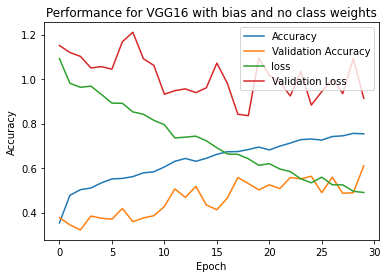

In [24]:
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title("Performance for VGG16 with bias and no class weights")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [26]:
test_loss, test_score = model_1.evaluate(test_set, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

23/23 [==============================] - 52s 2s/step - loss: 0.9137 - accuracy: 0.6099
Loss on test set:  0.9137312769889832
Accuracy on test set:  0.609929084777832
